# Separate runs by HKLE due to size limits

# Positions rounded to 1,000

# GPMP are 150bp. TCGA are 101bp.

In [1]:
tcgadata="TCGA/focused.1000.T.csv.gz"

In [2]:
gpmpdata="GPMP/focused.1000.T.csv.gz"

In [3]:
hkle='SVA_F'

['HERVK113', 'SVA_A', 'SVA_B', 'SVA_C', 'SVA_D', 'SVA_E', 'SVA_F']

Number of insertions detected needed to call insertion present

In [4]:
threshold=3

In [5]:
import numpy as np
np.__version__

'1.21.0'

In [6]:
import pandas as pd
pd.__version__

'1.2.4'

In [7]:
import matplotlib
matplotlib.__version__

'3.4.2'

In [8]:
import matplotlib.pyplot as plt

In [9]:
# Adjust plot size
#options(repr.plot.width=16, repr.plot.height=6)

# For some reason, if this is in the same cell as the import command, it doesn't work.
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [10]:
import scipy
scipy.__version__

'1.7.0'

In [11]:
from scipy import stats

In [12]:
import seaborn as sns
sns.__version__

'0.11.1'

In [13]:
from datetime import datetime

In [14]:
import sklearn
sklearn.__version__

'0.24.2'

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [16]:
default_max_columns=pd.get_option('display.max_columns')

In [17]:
default_max_rows=pd.get_option('display.max_rows')

In [18]:
default_precision=pd.get_option('display.precision')

In [19]:
pd.set_option('display.precision', 2)

In [20]:
#default_threshold=np.get_printoptions()['threshold']

In [21]:
#np.set_printoptions(threshold=10000000)

# Read Metadata 1

In [22]:
mt1=pd.read_csv("TCGA/metadata.cart.TCGA.GBM-LGG.WGS.bam.2020-07-17.csv",header=None,
 names=['subject','sequencing','days_to_death','gender1','disease_type','center_name','Unknown'])
mt1['sequencing']=mt1['sequencing'].str[0:20]

In [23]:
mt1.shape

(278, 7)

In [24]:
mt1 #.head()

,subject,sequencing,days_to_death,gender1,disease_type,center_name,Unknown
0,02-2483,02-2483-01A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
1,02-2483,02-2483-10A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
2,02-2485,02-2485-01A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
3,02-2485,02-2485-10A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
4,06-0125,06-0125-01A-01D-1490,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
...,...,...,...,...,...,...,...
273,TQ-A7RV,TQ-A7RV-02A-11D-A36O,NaN,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9382/3
274,TQ-A7RV,TQ-A7RV-10A-01D-A34A,NaN,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9382/3
275,TQ-A8XE,TQ-A8XE-01A-11D-A36O,954.0,female,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9450/3
276,TQ-A8XE,TQ-A8XE-02A-11D-A36O,954.0,female,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9450/3


In [25]:
list(mt1)

['subject',
 'sequencing',
 'days_to_death',
 'gender1',
 'disease_type',
 'center_name',
 'Unknown']

# Read Metadata 2

In [26]:
mt2=pd.read_csv("TCGA/TCGA.Glioma.metadata.tsv",sep="\t")

In [27]:
mt2.shape

(1114, 18)

In [28]:
mt2.head()

,case_submitter_id,project_id,primary_diagnosis,race,ethnicity,gender,RE_names,IDH,x1p19q,TERT,IDH_1p19q_status,WHO_groups,Triple_group,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status
0,TCGA-02-0001,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,44.0,11.76,1.0
1,TCGA-02-0003,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,50.0,4.73,1.0
2,TCGA-02-0004,TCGA-GBM,Glioblastoma,white,not hispanic or latino,male,NaN,WT,NaN,NaN,IDH-WT:1p19q-NA,NaN,IDH-WT:1p19q-NA:TERT-NA,MD Anderson Cancer Center,NaN,59.0,11.33,1.0
3,TCGA-02-0006,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,56.0,18.33,1.0
4,TCGA-02-0007,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,NaN,WT,non-codel,NaN,IDH-WT:1p19q-non-codel,glioblastoma:IDH-WT:1p19q-non-codel,IDH-WT:1p19q-non-codel:TERT-NA,MD Anderson Cancer Center,Unmethylated,40.0,23.16,1.0


In [29]:
list(mt2)

['case_submitter_id',
 'project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status']

In [30]:
mt2['subject']=mt2['case_submitter_id'].astype(str).str[5:12]

In [31]:
#mt2[['subject','case_submitter_id']].head()

In [32]:
mt2.drop('case_submitter_id',axis='columns',inplace=True)
mt2.rename(columns={"gender": "gender2"},inplace=True)

In [33]:
list(mt2)

['project_id',
 'primary_diagnosis',
 'race',
 'ethnicity',
 'gender2',
 'RE_names',
 'IDH',
 'x1p19q',
 'TERT',
 'IDH_1p19q_status',
 'WHO_groups',
 'Triple_group',
 'Tissue_sample_location',
 'MGMT',
 'Age',
 'Survival_months',
 'Vital_status',
 'subject']

# Merge Metadata

In [34]:
meta=mt2.merge(mt1,on='subject',suffixes=["_mt2","_mt1"],how='inner')
#meta=mt2.merge(mt1,on='sequencing',suffixes=["_mt2","_mt1"],how='inner')
#meta.drop('subject',axis='columns',inplace=True)
meta

,project_id,primary_diagnosis,race,ethnicity,gender2,RE_names,IDH,x1p19q,TERT,IDH_1p19q_status,...,Age,Survival_months,Vital_status,subject,sequencing,days_to_death,gender1,disease_type,center_name,Unknown
0,TCGA-GBM,Glioblastoma,asian,not hispanic or latino,male,02-2483-01A-01R-1849-01+1,Mutant,non-codel,WT,IDH-Mutant:1p19q-non-codel,...,43.0,15.31,0.0,02-2483,02-2483-01A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
1,TCGA-GBM,Glioblastoma,asian,not hispanic or latino,male,02-2483-01A-01R-1849-01+1,Mutant,non-codel,WT,IDH-Mutant:1p19q-non-codel,...,43.0,15.31,0.0,02-2483,02-2483-10A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
2,TCGA-GBM,Glioblastoma,black or african american,not hispanic or latino,male,02-2485-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,53.0,15.44,0.0,02-2485,02-2485-01A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
3,TCGA-GBM,Glioblastoma,black or african american,not hispanic or latino,male,02-2485-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,53.0,15.44,0.0,02-2485,02-2485-10A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
4,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0125-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,63.0,47.57,1.0,06-0125,06-0125-01A-01D-1490,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
273,TCGA-LGG,"Astrocytoma, NOS",white,hispanic or latino,male,TQ-A7RV-01A-21R-A34F-07+1,Mutant,non-codel,WT,IDH-Mutant:1p19q-non-codel,...,NaN,NaN,NaN,TQ-A7RV,TQ-A7RV-02A-11D-A36O,NaN,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9382/3
274,TCGA-LGG,"Astrocytoma, NOS",white,hispanic or latino,male,TQ-A7RV-01A-21R-A34F-07+1,Mutant,non-codel,WT,IDH-Mutant:1p19q-non-codel,...,NaN,NaN,NaN,TQ-A7RV,TQ-A7RV-10A-01D-A34A,NaN,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9382/3
275,TCGA-LGG,"Oligodendroglioma, NOS",white,hispanic or latino,female,TQ-A8XE-01A-11R-A36H-07+1,Mutant,non-codel,WT,IDH-Mutant:1p19q-non-codel,...,NaN,NaN,NaN,TQ-A8XE,TQ-A8XE-01A-11D-A36O,954.0,female,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9450/3
276,TCGA-LGG,"Oligodendroglioma, NOS",white,hispanic or latino,female,TQ-A8XE-01A-11R-A36H-07+1,Mutant,non-codel,WT,IDH-Mutant:1p19q-non-codel,...,NaN,NaN,NaN,TQ-A8XE,TQ-A8XE-02A-11D-A36O,954.0,female,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9450/3


In [35]:
del mt1
del mt2

In [36]:
meta.head()

,project_id,primary_diagnosis,race,ethnicity,gender2,RE_names,IDH,x1p19q,TERT,IDH_1p19q_status,...,Age,Survival_months,Vital_status,subject,sequencing,days_to_death,gender1,disease_type,center_name,Unknown
0,TCGA-GBM,Glioblastoma,asian,not hispanic or latino,male,02-2483-01A-01R-1849-01+1,Mutant,non-codel,WT,IDH-Mutant:1p19q-non-codel,...,43.0,15.31,0.0,02-2483,02-2483-01A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
1,TCGA-GBM,Glioblastoma,asian,not hispanic or latino,male,02-2483-01A-01R-1849-01+1,Mutant,non-codel,WT,IDH-Mutant:1p19q-non-codel,...,43.0,15.31,0.0,02-2483,02-2483-10A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
2,TCGA-GBM,Glioblastoma,black or african american,not hispanic or latino,male,02-2485-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,53.0,15.44,0.0,02-2485,02-2485-01A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
3,TCGA-GBM,Glioblastoma,black or african american,not hispanic or latino,male,02-2485-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,53.0,15.44,0.0,02-2485,02-2485-10A-01D-1494,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
4,TCGA-GBM,Glioblastoma,white,not hispanic or latino,female,06-0125-01A-01R-1849-01+1,WT,non-codel,Mutant,IDH-WT:1p19q-non-codel,...,63.0,47.57,1.0,06-0125,06-0125-01A-01D-1490,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3


In [37]:
meta.drop(meta[(meta['subject']=='CS-6186') & (meta['center_name']=='Harvard Medical School')].index,inplace=True)

In [38]:
meta.drop(meta[(meta['subject']=='DU-5872') & (meta['center_name']=='Harvard Medical School')].index,inplace=True)

In [39]:
meta.drop('subject',axis='columns',inplace=True)

In [40]:
meta.columns

Index(['project_id', 'primary_diagnosis', 'race', 'ethnicity', 'gender2',
       'RE_names', 'IDH', 'x1p19q', 'TERT', 'IDH_1p19q_status', 'WHO_groups',
       'Triple_group', 'Tissue_sample_location', 'MGMT', 'Age',
       'Survival_months', 'Vital_status', 'sequencing', 'days_to_death',
       'gender1', 'disease_type', 'center_name', 'Unknown'],
      dtype='object')

In [41]:
meta['primary_diagnosis'].value_counts()

Glioblastoma                     78
Oligodendroglioma, NOS           72
Astrocytoma, anaplastic          48
Mixed glioma                     36
Oligodendroglioma, anaplastic    20
Astrocytoma, NOS                 20
Name: primary_diagnosis, dtype: int64

In [42]:
meta['TERT'].value_counts()

Mutant    146
WT        123
Name: TERT, dtype: int64

In [43]:
meta['IDH'].value_counts()

Mutant    163
WT        108
Name: IDH, dtype: int64

In [44]:
meta['x1p19q'].value_counts()

non-codel    226
codel         48
Name: x1p19q, dtype: int64

In [45]:
meta['disease_type'].value_counts()

Brain Lower Grade Glioma    196
Glioblastoma Multiforme      78
Name: disease_type, dtype: int64

In [46]:
meta['gender1'].value_counts()

male      154
female    120
Name: gender1, dtype: int64

In [47]:
meta['race'].value_counts()

white                        250
black or african american     15
not reported                   7
asian                          2
Name: race, dtype: int64

In [48]:
meta['ethnicity'].value_counts()

not hispanic or latino    235
not reported               23
hispanic or latino         16
Name: ethnicity, dtype: int64

In [49]:
meta['IDH_1p19q_status'].value_counts()

IDH-Mutant:1p19q-non-codel    115
IDH-WT:1p19q-non-codel        108
IDH-Mutant:1p19q-codel         48
IDH-NA:1p19q-non-codel          3
Name: IDH_1p19q_status, dtype: int64

In [50]:
meta['WHO_groups'].value_counts()

glioblastoma:IDH-WT:1p19q-non-codel             64
oligodendroglioma:IDH-Mutant:1p19q-codel        48
astrocytoma:IDH-Mutant:1p19q-non-codel          37
oligodendroglioma:IDH-Mutant:1p19q-non-codel    29
oligoastrocytoma:IDH-Mutant:1p19q-non-codel     26
astrocytoma:IDH-WT:1p19q-non-codel              26
glioblastoma:IDH-Mutant:1p19q-non-codel         11
oligodendroglioma:IDH-WT:1p19q-non-codel        10
oligoastrocytoma:IDH-WT:1p19q-non-codel          8
Name: WHO_groups, dtype: int64

In [51]:
meta['Triple_group'].value_counts()

IDH-Mutant:1p19q-non-codel:TERT-WT        111
IDH-WT:1p19q-non-codel:TERT-Mutant         95
IDH-Mutant:1p19q-codel:TERT-Mutant         46
IDH-WT:1p19q-non-codel:TERT-WT             10
IDH-NA:1p19q-non-codel:TERT-Mutant          3
IDH-WT:1p19q-non-codel:TERT-NA              3
IDH-Mutant:1p19q-codel:TERT-WT              2
IDH-Mutant:1p19q-non-codel:TERT-NA          2
IDH-Mutant:1p19q-non-codel:TERT-Mutant      2
Name: Triple_group, dtype: int64

In [52]:
meta['MGMT'].value_counts()

Methylated      191
Unmethylated     57
Name: MGMT, dtype: int64

In [53]:
meta['center_name'].value_counts()

Broad Institute of MIT and Harvard    174
Harvard Medical School                100
Name: center_name, dtype: int64

## We need a multi-level index to merge with df later so adding an empty index level

not anymore. I flatten before merging.

In [54]:
#meta.columns=[meta.columns,[''] * len(meta.columns)]

In [55]:
meta.columns

Index(['project_id', 'primary_diagnosis', 'race', 'ethnicity', 'gender2',
       'RE_names', 'IDH', 'x1p19q', 'TERT', 'IDH_1p19q_status', 'WHO_groups',
       'Triple_group', 'Tissue_sample_location', 'MGMT', 'Age',
       'Survival_months', 'Vital_status', 'sequencing', 'days_to_death',
       'gender1', 'disease_type', 'center_name', 'Unknown'],
      dtype='object')

# Read raw TCGA data and cleanup

In [56]:
tcga_df=pd.read_csv(tcgadata,header=[0,1],index_col=[0,1,2,3])
tcga_df.columns= [' '.join(col).strip() for col in tcga_df.columns.values]
tcga_df #.head()

chr1 1102000  chr1 1308000  \
sample               pup    hkle     mapq                               
02-2483-01A-01D-1494 paired HERVK113 Q20              0             0   
                            SVA_A    Q20              0             0   
                            SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   
...                                                 ...           ...   
TQ-A8XE-10A-01D-A367 paired SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   
                            SVA_E    Q20              0             0   
                            SVA_F    Q20              0             0   

                                           chr1 1409000  chr1 1410000  \
sample               pup    hkle     mapq                               
02-2483-01A-01D-1494 paired HERVK113 Q20              4             1   
                            SVA_A    Q20              0             0   
                            SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   
...                                                 ...           ...   
TQ-A8XE-10A-01D-A367 paired SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   
                            SVA_E    Q20              0             0   
                            SVA_F    Q20              0             0   

                                           chr1 1580000  chr1 1581000  \
sample               pup    hkle     mapq                               
02-2483-01A-01D-1494 paired HERVK113 Q20              4             0   
                            SVA_A    Q20              0             0   
                            SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   
...                                                 ...           ...   
TQ-A8XE-10A-01D-A367 paired SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   
                            SVA_E    Q20              0             0   
                            SVA_F    Q20              0             0   

                                           chr1 2211000  chr1 3129000  \
sample               pup    hkle     mapq                               
02-2483-01A-01D-1494 paired HERVK113 Q20              0             0   
                            SVA_A    Q20              0             0   
                            SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   
...                                                 ...           ...   
TQ-A8XE-10A-01D-A367 paired SVA_B    Q20              0             0   
                            SVA_C    Q20              0             0   
                            SVA_D    Q20              0             0   
                            SVA_E    Q20              0             0   
                            SVA_F    Q20              0             0   

                                           chr1 3315000  chr1 3321000  ...  \
sample               pup    hkle     mapq                              ...   
02-2483-01A-01D-1494 paired HERVK113 Q20              0             0  ...   
         

In [57]:
tcga_df.reset_index(inplace=True)
tcga_df.rename(columns={"sample": "sequencing"},inplace=True)
tcga_df.head()

,sequencing,pup,hkle,mapq,chr1 1102000,chr1 1308000,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,...,chrY 15075000,chrY 15774000,chrY 17181000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20553000,chrY 20976000,chrY 21047000,chrY 21217000
0,02-2483-01A-01D-1494,paired,HERVK113,Q20,0,0,4,1,4,0,...,0,0,0,0,2,0,0,0,0,0
1,02-2483-01A-01D-1494,paired,SVA_A,Q20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,02-2483-01A-01D-1494,paired,SVA_B,Q20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,02-2483-01A-01D-1494,paired,SVA_C,Q20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,02-2483-01A-01D-1494,paired,SVA_D,Q20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [58]:
tcga_df['sample']=tcga_df['sequencing'].str[0:11]
tcga_df['subject']=tcga_df['sample'].str[0:7]
tcga_df['subject']

0       02-2483
1       02-2483
2       02-2483
3       02-2483
4       02-2483
         ...   
1024    TQ-A8XE
1025    TQ-A8XE
1026    TQ-A8XE
1027    TQ-A8XE
1028    TQ-A8XE
Name: subject, Length: 1029, dtype: object

In [59]:
tcga_df.columns

Index(['sequencing', 'pup', 'hkle', 'mapq', 'chr1 1102000', 'chr1 1308000',
       'chr1 1409000', 'chr1 1410000', 'chr1 1580000', 'chr1 1581000',
       ...
       'chrY 17181000', 'chrY 19536000', 'chrY 19699000', 'chrY 19700000',
       'chrY 20553000', 'chrY 20976000', 'chrY 21047000', 'chrY 21217000',
       'sample', 'subject'],
      dtype='object', length=12556)

In [60]:
tcga_df=tcga_df[tcga_df['hkle']==hkle]
tcga_df.head()

,sequencing,pup,hkle,mapq,chr1 1102000,chr1 1308000,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,...,chrY 17181000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20553000,chrY 20976000,chrY 21047000,chrY 21217000,sample,subject
6,02-2483-01A-01D-1494,paired,SVA_F,Q20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,02-2483-01A,02-2483
13,02-2483-10A-01D-1494,paired,SVA_F,Q20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,02-2483-10A,02-2483
20,02-2485-01A-01D-1494,paired,SVA_F,Q20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,02-2485-01A,02-2485
27,02-2485-10A-01D-1494,paired,SVA_F,Q20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,02-2485-10A,02-2485
34,06-0125-01A-01D-1490,paired,SVA_F,Q20,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,06-0125-01A,06-0125


In [61]:
tcga_df.set_index(['subject','sample','sequencing','pup','hkle','mapq'],inplace=True)
tcga_df.head()

chr1 1102000  \
subject sample      sequencing           pup    hkle  mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired SVA_F Q20              0   
        02-2483-10A 02-2483-10A-01D-1494 paired SVA_F Q20              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired SVA_F Q20              0   
        02-2485-10A 02-2485-10A-01D-1494 paired SVA_F Q20              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired SVA_F Q20              0   

                                                            chr1 1308000  \
subject sample      sequencing           pup    hkle  mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired SVA_F Q20              0   
        02-2483-10A 02-2483-10A-01D-1494 paired SVA_F Q20              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired SVA_F Q20              0   
        02-2485-10A 02-2485-10A-01D-1494 paired SVA_F Q20              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired SVA_F Q20              0   

                                                            chr1 1409000  \
subject sample      sequencing           pup    hkle  mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired SVA_F Q20              0   
        02-2483-10A 02-2483-10A-01D-1494 paired SVA_F Q20              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired SVA_F Q20              0   
        02-2485-10A 02-2485-10A-01D-1494 paired SVA_F Q20              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired SVA_F Q20              0   

                                                            chr1 1410000  \
subject sample      sequencing           pup    hkle  mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired SVA_F Q20              0   
        02-2483-10A 02-2483-10A-01D-1494 paired SVA_F Q20              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired SVA_F Q20              0   
        02-2485-10A 02-2485-10A-01D-1494 paired SVA_F Q20              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired SVA_F Q20              0   

                                                            chr1 1580000  \
subject sample      sequencing           pup    hkle  mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired SVA_F Q20              0   
        02-2483-10A 02-2483-10A-01D-1494 paired SVA_F Q20              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired SVA_F Q20              0   
        02-2485-10A 02-2485-10A-01D-1494 paired SVA_F Q20              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired SVA_F Q20              0   

                                                            chr1 1581000  \
subject sample      sequencing           pup    hkle  mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired SVA_F Q20              0   
        02-2483-10A 02-2483-10A-01D-1494 paired SVA_F Q20              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired SVA_F Q20              0   
        02-2485-10A 02-2485-10A-01D-1494 paired SVA_F Q20              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired SVA_F Q20              0   

                                                            chr1 2211000  \
subject sample      sequencing           pup    hkle  mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired SVA_F Q20              0   
        02-2483-10A 02-2483-10A-01D-1494 paired SVA_F Q20              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494 paired SVA_F Q20              0   
        02-2485-10A 02-2485-10A-01D-1494 paired SVA_F Q20              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490 paired SVA_F Q20              0   

                                                            chr1 3129000  \
subject sample      sequencing           pup    hkle  mapq                 
02-2483 02-2483-01A 02-2483-01A-01D-1494 paired SVA_F Q20              0   
        02-2483-10A 02-2483-10A-01D-1494 paired SVA_F Q20              0   
02-2485 02-2485-01A 02-24

In [62]:
tcga_df.shape

(147, 12550)

## Remove "hkle", "pup" and "q" as they are useless in this dataset.

In [63]:
tcga_df=tcga_df.droplevel('pup',axis='index').droplevel('mapq',axis='index').droplevel('hkle',axis='index')

In [64]:
tcga_df #.head()

chr1 1102000  chr1 1308000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0   
        02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W             0             0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A             0             0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A             0             0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O             0             0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367             0             0   

                                          chr1 1409000  chr1 1410000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0   
        02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W             0             0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A             0             0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A             0             0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O             0             0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367             0             0   

                                          chr1 1580000  chr1 1581000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0   
        02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W             0             0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A             0             0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A             0             0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O             0             0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367             0             0   

                                          chr1 2211000  chr1 3129000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0   
        02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W             0             0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A             0             0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A             0             0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O             0             0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367             0             0   

                                          chr1 3315000  chr1 3321000  ...  \
subject sample      sequencing                                        ...   
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0  ...   
        02-2483-10A 02-2483-10A-01D-1494             0         

In [65]:
tcga_df.shape

(147, 12550)

## Drop recurrent tumor (-02?)

## Drop solid normal (-11?) (I've seen a couple)

## Drop solitary tumor / normal ( not sure how to do this programmatically )

* FG-5963-01A
* CS-5390-10A

In [66]:
tcga_df.loc[tcga_df.index.get_level_values('sample') == 'FG-5963-01A'].index

MultiIndex([], names=['subject', 'sample', 'sequencing'])

In [67]:
tcga_df.drop(tcga_df.loc[tcga_df.index.get_level_values('sample') == 'FG-5963-01A'].index,axis='index',inplace=True)

In [68]:
tcga_df.loc[tcga_df.index.get_level_values('sample') == 'FG-5963-01A'].index

MultiIndex([], names=['subject', 'sample', 'sequencing'])

In [69]:
tcga_df.loc[tcga_df.index.get_level_values('sample') == "CS-5390-10A"].index

MultiIndex([('CS-5390', 'CS-5390-10A', 'CS-5390-10A-01D-1468')],
           names=['subject', 'sample', 'sequencing'])

In [70]:
tcga_df.drop(tcga_df.loc[tcga_df.index.get_level_values('sample') == "CS-5390-10A"].index,axis='index',inplace=True)

In [71]:
tcga_df.loc[tcga_df.index.get_level_values('sample') == "CS-5390-10A"].index

MultiIndex([], names=['subject', 'sample', 'sequencing'])

# Match earlier HERVK113 notebook counts
* CS-5390-10A - 553
* FG-5963-01A - 68
* CS-6186-01A - 1100
* CS-6186-10A - 950
* DU-5872-01A - 1108
* DU-5872-10A - 776
* 02-2483-01A - 568
* 02-2483-10A - 557
* 02-2485-01A - 587
* 02-2485-10A - 498
* 06-0125-01A - 734

## Keep only Broad and drop Harvard Medical School

### Harvard's samples were really low coverage?

# NORMALIZE INSERTION POINTS BY ( * 1,000,000,000 / READ COUNT )

In [72]:
#tcga_counts=pd.read_csv("TCGA/TCGA_raw_counts.csv")
tcga_counts=pd.read_csv('TCGA/sequencing_paired_read_counts.csv',header=None,names=['sequencing','count'])
#rc['sample']=rc['sequencing'].str[0:11]
tcga_counts.head()

#tcga_counts.rename(columns={"subject": "sample"},inplace=True)
#tcga_counts.head()

,sequencing,count
0,02-2483-01A-01D-1494,566024474
1,02-2483-10A-01D-1494,579304076
2,02-2485-01A-01D-1494,575060540
3,02-2485-10A-01D-1494,478851061
4,06-0125-01A-01D-1490,1066268796


In [73]:
tcga_df.reset_index(inplace=True)
#tcga_df.columns= [' '.join(col).strip() for col in tcga_df.columns.values]
#tcga_df=tcga_df.merge(tcga_counts,on='sample')
tcga_df=tcga_df.merge(tcga_counts,on='sequencing')
tcga_df.set_index(['subject','sample','sequencing'],inplace=True)
tcga_df.head()

chr1 1102000  chr1 1308000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0   
        02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0   

                                          chr1 1409000  chr1 1410000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0   
        02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0   

                                          chr1 1580000  chr1 1581000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0   
        02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0   

                                          chr1 2211000  chr1 3129000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0   
        02-2483-10A 02-2483-10A-01D-1494             0             0   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0   
        02-2485-10A 02-2485-10A-01D-1494             0             0   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0   

                                          chr1 3315000  chr1 3321000  ...  \
subject sample      sequencing                                        ...   
02-2483 02-2483-01A 02-2483-01A-01D-1494             0             0  ...   
        02-2483-10A 02-2483-10A-01D-1494             0             0  ...   
02-2485 02-2485-01A 02-2485-01A-01D-1494             0             0  ...   
        02-2485-10A 02-2485-10A-01D-1494             0             0  ...   
06-0125 06-0125-01A 06-0125-01A-01D-1490             0             0  ...   

                                          chrY 15774000  chrY 17181000  \
subject sample      sequencing                                           
02-2483 02-2483-01A 02-2483-01A-01D-1494              0              0   
        02-2483-10A 02-2483-10A-01D-1494              0              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494              0              0   
        02-2485-10A 02-2485-10A-01D-1494              0              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490              0              0   

                                          chrY 19536000  chrY 19699000  \
subject sample      sequencing                                           
02-2483 02-2483-01A 02-2483-01A-01D-1494              0              0   
        02-2483-10A 02-2483-10A-01D-1494              0              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494              0              0   
        02-2485-10A 02-2485-10A-01D-1494              0              0   
06-0125 06-0125-01A 06-0125-01A-01D-1490              0              0   

                                          chrY 19700000  chrY 20553000  \
subject sample      sequencing                                           
02-2483 02-2483-01A 02-2483-01A-01D-1494              0              0   
        02-2483-10A 02-2483-10A-01D-1494              0              0   
02-2485 02-2485-01A 02-2485-01A-01D-1494              0              0   
        02-2485-10A 02-2485-10A-01D-1494              0              0   


In [74]:
tcga_df[tcga_df.columns[tcga_df.columns.str.contains("^chr")]]=(
    1e9*tcga_df[tcga_df.columns[tcga_df.columns.str.contains("^chr")]].values)/tcga_df[['count']].values


In [75]:
tcga_df.drop('count',axis='columns',inplace=True)
tcga_df

chr1 1102000  chr1 1308000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494           0.0           0.0   
        02-2483-10A 02-2483-10A-01D-1494           0.0           0.0   
02-2485 02-2485-01A 02-2485-01A-01D-1494           0.0           0.0   
        02-2485-10A 02-2485-10A-01D-1494           0.0           0.0   
06-0125 06-0125-01A 06-0125-01A-01D-1490           0.0           0.0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W           0.0           0.0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A           0.0           0.0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A           0.0           0.0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O           0.0           0.0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367           0.0           0.0   

                                          chr1 1409000  chr1 1410000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494           0.0           0.0   
        02-2483-10A 02-2483-10A-01D-1494           0.0           0.0   
02-2485 02-2485-01A 02-2485-01A-01D-1494           0.0           0.0   
        02-2485-10A 02-2485-10A-01D-1494           0.0           0.0   
06-0125 06-0125-01A 06-0125-01A-01D-1490           0.0           0.0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W           0.0           0.0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A           0.0           0.0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A           0.0           0.0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O           0.0           0.0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367           0.0           0.0   

                                          chr1 1580000  chr1 1581000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494           0.0           0.0   
        02-2483-10A 02-2483-10A-01D-1494           0.0           0.0   
02-2485 02-2485-01A 02-2485-01A-01D-1494           0.0           0.0   
        02-2485-10A 02-2485-10A-01D-1494           0.0           0.0   
06-0125 06-0125-01A 06-0125-01A-01D-1490           0.0           0.0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W           0.0           0.0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A           0.0           0.0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A           0.0           0.0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O           0.0           0.0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367           0.0           0.0   

                                          chr1 2211000  chr1 3129000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494           0.0           0.0   
        02-2483-10A 02-2483-10A-01D-1494           0.0           0.0   
02-2485 02-2485-01A 02-2485-01A-01D-1494           0.0           0.0   
        02-2485-10A 02-2485-10A-01D-1494           0.0           0.0   
06-0125 06-0125-01A 06-0125-01A-01D-1490           0.0           0.0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W           0.0           0.0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A           0.0           0.0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A           0.0           0.0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O           0.0           0.0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367           0.0           0.0   

                                          chr1 3315000  chr1 3321000  ...  \
subject sample      sequencing                                        ...   
02-2483 02-2483-01A 02-2483-01A-01D-1494           0.0           0.0  ...   
        02-2483-10A 02-2483-10A-01D-1494           0.0         

In [76]:
tcga_df.drop(tcga_df.columns[tcga_df.sum(axis='index')==0],axis='columns',inplace=True)
tcga_df

chr1 3315000  chr1 3321000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494           0.0           0.0   
        02-2483-10A 02-2483-10A-01D-1494           0.0           0.0   
02-2485 02-2485-01A 02-2485-01A-01D-1494           0.0           0.0   
        02-2485-10A 02-2485-10A-01D-1494           0.0           0.0   
06-0125 06-0125-01A 06-0125-01A-01D-1490           0.0           0.0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W           0.0           0.0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A           0.0           0.0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A           0.0           0.0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O           0.0           0.0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367           0.0           0.0   

                                          chr1 3767000  chr1 4763000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494           0.0           0.0   
        02-2483-10A 02-2483-10A-01D-1494           0.0           0.0   
02-2485 02-2485-01A 02-2485-01A-01D-1494           0.0           0.0   
        02-2485-10A 02-2485-10A-01D-1494           0.0           0.0   
06-0125 06-0125-01A 06-0125-01A-01D-1490           0.0           0.0   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W           0.0           0.0   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A           0.0           0.0   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A           0.0           0.0   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O           0.0           0.0   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367           0.0           0.0   

                                          chr1 5112000  chr1 6304000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494           0.0          1.77   
        02-2483-10A 02-2483-10A-01D-1494           0.0          0.00   
02-2485 02-2485-01A 02-2485-01A-01D-1494           0.0          0.00   
        02-2485-10A 02-2485-10A-01D-1494           0.0          0.00   
06-0125 06-0125-01A 06-0125-01A-01D-1490           0.0          1.88   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W           0.0          0.00   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A           0.0          0.00   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A           0.0          0.00   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O           0.0          0.00   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367           0.0          0.00   

                                          chr1 6714000  chr1 6716000  \
subject sample      sequencing                                         
02-2483 02-2483-01A 02-2483-01A-01D-1494           0.0          3.53   
        02-2483-10A 02-2483-10A-01D-1494           0.0          3.45   
02-2485 02-2485-01A 02-2485-01A-01D-1494           0.0          1.74   
        02-2485-10A 02-2485-10A-01D-1494           0.0          0.00   
06-0125 06-0125-01A 06-0125-01A-01D-1490           0.0          1.88   
...                                                ...           ...   
TQ-A7RK TQ-A7RK-10A TQ-A7RK-10A-01D-A33W           0.0          0.00   
TQ-A7RV TQ-A7RV-01A TQ-A7RV-01A-21D-A34A           0.0          3.19   
        TQ-A7RV-10A TQ-A7RV-10A-01D-A34A           0.0          0.00   
TQ-A8XE TQ-A8XE-01A TQ-A8XE-01A-11D-A36O           0.0          0.00   
        TQ-A8XE-10A TQ-A8XE-10A-01D-A367           0.0          2.69   

                                          chr1 7600000  chr1 7602000  ...  \
subject sample      sequencing                                        ...   
02-2483 02-2483-01A 02-2483-01A-01D-1494          1.77          0.00  ...   
        02-2483-10A 02-2483-10A-01D-1494          0.00         

# New technique. Separate the tumor and normal counts.
### Remove the sample column
### DO NOT RESHAPE

In [77]:
n=tcga_df.copy()    # NORMAL
#t=tcga_df.copy()    # TUMOR

In [78]:
n.drop(n.loc[n.index.get_level_values('sample').str.contains("-01.$")].index,axis='index',inplace=True)
#t.drop(t.loc[t.index.get_level_values('sample').str.contains("-10.$")].index,axis='index',inplace=True)

In [79]:
#n=n.droplevel('sample',axis='index').droplevel('sequencing',axis='index')
#t=t.droplevel('sample',axis='index')

In [80]:
n

,,,chr1 3315000,chr1 3321000,chr1 3767000,chr1 4763000,chr1 5112000,chr1 6304000,chr1 6714000,chr1 6716000,chr1 7600000,chr1 7602000,...,chrY 4294000,chrY 4296000,chrY 8917000,chrY 12352000,chrY 12452000,chrY 12878000,chrY 12879000,chrY 19536000,chrY 21047000,chrY 21217000
subject,sample,sequencing,,,,,,,,,,,,,,,,,,,,,
02-2483,02-2483-10A,02-2483-10A-01D-1494,0.0,0.0,0.0,0.0,0.0,0.00,0.0,3.45,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
02-2485,02-2485-10A,02-2485-10A-01D-1494,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,4.18,0.00,...,4.18,0.00,2.09,2.09,0.0,0.0,0.0,0.0,0.00,0.0
06-0125,06-0125-10A,06-0125-10A-01D-1490,0.0,0.0,0.0,0.0,0.0,1.44,0.0,2.88,1.44,0.00,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
06-0157,06-0157-10A,06-0157-10A-01D-1491,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,1.78,0.00,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
06-0171,06-0171-10A,06-0171-10A-01D-A33C,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.39,1.39,0.00,...,0.00,1.39,1.39,0.00,0.0,0.0,0.0,0.0,1.39,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IK-7675,IK-7675-10A,IK-7675-10A-01D-2086,0.0,0.0,0.0,0.0,0.0,0.00,0.0,1.87,0.00,3.74,...,3.74,0.00,1.87,0.00,0.0,0.0,0.0,0.0,0.00,0.0
TM-A7CF,TM-A7CF-10A,TM-A7CF-10A-01D-A329,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0
TQ-A7RK,TQ-A7RK-10A,TQ-A7RK-10A-01D-A33W,0.0,0.0,0.0,0.0,0.0,0.00,0.0,0.00,0.00,2.68,...,5.36,0.00,0.00,0.00,0.0,0.0,0.0,0.0,0.00,0.0


In [81]:
#t.head()

In [82]:
#n_index=n.index
#t_index=t.index

### Compare the indexes. An empty array shows that the indexes are the same. Yay.

In [83]:
#n_index[n_index != t_index]

In [84]:
#ngtet=(n>=threshold)
#tgtet=(t>=threshold)
#
#compdf=((((ngtet)^(tgtet))&(tgtet)).replace([False,True],[0,1]) - 
#        (((ngtet)^(tgtet))&(ngtet)).replace([False,True],[0,1]))

# Tumor only. Could have filtered earlier but here is good too.

In [85]:
#compdf=(t>=threshold).replace([False,True],[0,1])

# Normal only. Could have filtered earlier but here is good too.

In [86]:
compdf=(n>=threshold).replace([False,True],[0,1])

In [87]:
compdf

,,,chr1 3315000,chr1 3321000,chr1 3767000,chr1 4763000,chr1 5112000,chr1 6304000,chr1 6714000,chr1 6716000,chr1 7600000,chr1 7602000,...,chrY 4294000,chrY 4296000,chrY 8917000,chrY 12352000,chrY 12452000,chrY 12878000,chrY 12879000,chrY 19536000,chrY 21047000,chrY 21217000
subject,sample,sequencing,,,,,,,,,,,,,,,,,,,,,
02-2483,02-2483-10A,02-2483-10A-01D-1494,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
02-2485,02-2485-10A,02-2485-10A-01D-1494,0,0,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
06-0125,06-0125-10A,06-0125-10A-01D-1490,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0157,06-0157-10A,06-0157-10A-01D-1491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
06-0171,06-0171-10A,06-0171-10A-01D-A33C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IK-7675,IK-7675-10A,IK-7675-10A-01D-2086,0,0,0,0,0,0,0,0,0,1,...,1,0,0,0,0,0,0,0,0,0
TM-A7CF,TM-A7CF-10A,TM-A7CF-10A-01D-A329,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
TQ-A7RK,TQ-A7RK-10A,TQ-A7RK-10A-01D-A33W,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,0,0


In [88]:
compdf.shape

(73, 4261)

### Keep only positions with any sample with something other than 0

In [89]:
compdf=compdf.loc[:, (compdf != 0).any(axis=0)]

In [90]:
compdf.shape

(73, 2450)

In [91]:
compdf.head()

,,,chr1 3315000,chr1 6304000,chr1 6716000,chr1 7600000,chr1 7602000,chr1 7952000,chr1 8912000,chr1 10029000,chr1 11249000,chr1 11305000,...,chrX 145437000,chrX 146050000,chrX 147991000,chrX 149420000,chrX 149421000,chrX 151598000,chrY 4294000,chrY 4296000,chrY 8917000,chrY 12878000
subject,sample,sequencing,,,,,,,,,,,,,,,,,,,,,
02-2483,02-2483-10A,02-2483-10A-01D-1494,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
02-2485,02-2485-10A,02-2485-10A-01D-1494,0,0,0,1,0,0,0,0,0,1,...,0,0,0,0,1,1,1,0,0,0
06-0125,06-0125-10A,06-0125-10A-01D-1490,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
06-0157,06-0157-10A,06-0157-10A-01D-1491,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
06-0171,06-0171-10A,06-0171-10A-01D-A33C,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


### Get the chromosome columns for analysis after merging with the metadata

In [92]:
#chromosome_columns=compdf.columns[compdf.columns.get_level_values('chromosome').str.contains("^chr")]
#chromosome_columns

### Merge with the metadata for later grouping

In [93]:
compdf.reset_index(inplace=True)
compdf

,subject,sample,sequencing,chr1 3315000,chr1 6304000,chr1 6716000,chr1 7600000,chr1 7602000,chr1 7952000,chr1 8912000,...,chrX 145437000,chrX 146050000,chrX 147991000,chrX 149420000,chrX 149421000,chrX 151598000,chrY 4294000,chrY 4296000,chrY 8917000,chrY 12878000
0,02-2483,02-2483-10A,02-2483-10A-01D-1494,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,02-2485,02-2485-10A,02-2485-10A-01D-1494,0,0,0,1,0,0,0,...,0,0,0,0,1,1,1,0,0,0
2,06-0125,06-0125-10A,06-0125-10A-01D-1490,0,0,0,0,0,0,0,...,0,0,1,0,1,0,0,0,0,0
3,06-0157,06-0157-10A,06-0157-10A-01D-1491,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
4,06-0171,06-0171-10A,06-0171-10A-01D-A33C,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,IK-7675,IK-7675-10A,IK-7675-10A-01D-2086,0,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
69,TM-A7CF,TM-A7CF-10A,TM-A7CF-10A-01D-A329,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
70,TQ-A7RK,TQ-A7RK-10A,TQ-A7RK-10A-01D-A33W,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0
71,TQ-A7RV,TQ-A7RV-10A,TQ-A7RV-10A-01D-A34A,0,0,0,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [94]:
compdf['sequencing']

0     02-2483-10A-01D-1494
1     02-2485-10A-01D-1494
2     06-0125-10A-01D-1490
3     06-0157-10A-01D-1491
4     06-0171-10A-01D-A33C
              ...         
68    IK-7675-10A-01D-2086
69    TM-A7CF-10A-01D-A329
70    TQ-A7RK-10A-01D-A33W
71    TQ-A7RV-10A-01D-A34A
72    TQ-A8XE-10A-01D-A367
Name: sequencing, Length: 73, dtype: object

In [95]:
meta['sequencing']

0      02-2483-01A-01D-1494
1      02-2483-10A-01D-1494
2      02-2485-01A-01D-1494
3      02-2485-10A-01D-1494
4      06-0125-01A-01D-1490
               ...         
273    TQ-A7RV-02A-11D-A36O
274    TQ-A7RV-10A-01D-A34A
275    TQ-A8XE-01A-11D-A36O
276    TQ-A8XE-02A-11D-A36O
277    TQ-A8XE-10A-01D-A367
Name: sequencing, Length: 274, dtype: object

In [96]:
#compdf=compdf.merge(meta,on='subject')
compdf=compdf.merge(meta,on='sequencing')
compdf

,subject,sample,sequencing,chr1 3315000,chr1 6304000,chr1 6716000,chr1 7600000,chr1 7602000,chr1 7952000,chr1 8912000,...,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status,days_to_death,gender1,disease_type,center_name,Unknown
0,02-2483,02-2483-10A,02-2483-10A-01D-1494,0,0,1,0,0,0,0,...,MD Anderson Cancer Center,Methylated,43.0,15.31,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
1,02-2485,02-2485-10A,02-2485-10A-01D-1494,0,0,0,1,0,0,0,...,MD Anderson Cancer Center,Unmethylated,53.0,15.44,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
2,06-0125,06-0125-10A,06-0125-10A-01D-1490,0,0,0,0,0,0,0,...,Henry Ford Hospital,Methylated,63.0,47.57,1.0,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
3,06-0157,06-0157-10A,06-0157-10A-01D-1491,0,0,0,0,0,0,0,...,Henry Ford Hospital,NaN,63.0,3.19,1.0,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
4,06-0171,06-0171-10A,06-0171-10A-01D-A33C,0,0,0,0,0,0,0,...,Henry Ford Hospital,NaN,65.0,13.11,1.0,399.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
68,IK-7675,IK-7675-10A,IK-7675-10A-01D-2086,0,0,0,0,1,0,0,...,Christiana Healthcare,Methylated,43.0,18.99,1.0,578.0,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9450/3
69,TM-A7CF,TM-A7CF-10A,TM-A7CF-10A-01D-A329,0,0,0,0,0,0,0,...,The University of New South Wales,Methylated,41.0,48.36,0.0,NaN,female,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9400/3
70,TQ-A7RK,TQ-A7RK-10A,TQ-A7RK-10A-01D-A33W,0,0,0,0,0,1,0,...,University of Sao Paulo,Methylated,NaN,NaN,NaN,NaN,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9450/3
71,TQ-A7RV,TQ-A7RV-10A,TQ-A7RV-10A-01D-A34A,0,0,0,0,0,1,0,...,University of Sao Paulo,Methylated,NaN,NaN,NaN,NaN,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9382/3


In [97]:
compdf.set_index(['subject','sample','sequencing'],inplace=True)
compdf

,,,chr1 3315000,chr1 6304000,chr1 6716000,chr1 7600000,chr1 7602000,chr1 7952000,chr1 8912000,chr1 10029000,chr1 11249000,chr1 11305000,...,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status,days_to_death,gender1,disease_type,center_name,Unknown
subject,sample,sequencing,,,,,,,,,,,,,,,,,,,,,
02-2483,02-2483-10A,02-2483-10A-01D-1494,0,0,1,0,0,0,0,0,0,1,...,MD Anderson Cancer Center,Methylated,43.0,15.31,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
02-2485,02-2485-10A,02-2485-10A-01D-1494,0,0,0,1,0,0,0,0,0,1,...,MD Anderson Cancer Center,Unmethylated,53.0,15.44,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
06-0125,06-0125-10A,06-0125-10A-01D-1490,0,0,0,0,0,0,0,0,0,0,...,Henry Ford Hospital,Methylated,63.0,47.57,1.0,1448.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
06-0157,06-0157-10A,06-0157-10A-01D-1491,0,0,0,0,0,0,0,0,0,0,...,Henry Ford Hospital,NaN,63.0,3.19,1.0,97.0,female,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
06-0171,06-0171-10A,06-0171-10A-01D-A33C,0,0,0,0,0,0,0,0,0,0,...,Henry Ford Hospital,NaN,65.0,13.11,1.0,399.0,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IK-7675,IK-7675-10A,IK-7675-10A-01D-2086,0,0,0,0,1,0,0,0,0,0,...,Christiana Healthcare,Methylated,43.0,18.99,1.0,578.0,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9450/3
TM-A7CF,TM-A7CF-10A,TM-A7CF-10A-01D-A329,0,0,0,0,0,0,0,0,0,0,...,The University of New South Wales,Methylated,41.0,48.36,0.0,NaN,female,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9400/3
TQ-A7RK,TQ-A7RK-10A,TQ-A7RK-10A-01D-A33W,0,0,0,0,0,1,0,0,0,0,...,University of Sao Paulo,Methylated,NaN,NaN,NaN,NaN,male,Brain Lower Grade Glioma,Broad Institute of MIT and Harvard,9450/3


In [98]:
#list(compdf)


In [99]:
def ttests_boxplots_and_heatmaps(localdf,columns,group_column,box_p=0.05,heat_p=0.15):
    select_p_values=[]
    groups=localdf[group_column].unique().tolist()
    print("T-Testing")
    for col in columns:
        if ( col not in localdf.columns ):
            continue
        for group in groups:
            others = groups.copy()
            others.remove(group)
            for other in others:
                t,p = stats.ttest_ind(
                    localdf[localdf[group_column]==group][col],
                    localdf[localdf[group_column]==other][col])
                #if(p<0.1):
                #    print(col,group,other,t,p)
                if(( p > 0 ) and ( p < heat_p )):
                    select_p_values.append([abs(t),p,col])

    pdf = pd.DataFrame(select_p_values, columns=['t','p','col'])                        
    pdf=pdf.drop_duplicates().sort_values('p')
    print("Boxplotting")
    for index, row in pdf.iterrows():
        if(( row['p'] > 0 ) and ( row['p'] < box_p )):
            print(" p : "+str(row['p'])+"  ( t : "+str(row['t'])+" ) :  "+str(row['col']))
            
            localdf.boxplot(column=row['col'],by=[group_column])
            plt.title(str(row['col']))
            plt.xticks(rotation=75,ha='right')
            plt.show()                            

    print("Clustermapping")

    selected=['subject',group_column]
    selected=np.append(selected,pdf['col'])
    selected=np.unique(selected)
    print(selected)
    
    #['Lab kit' 'NR_029609.1' 'trimmer' 'diag' 'idh' 'sample' 'subject']
    #['IDH_1p19q_status' 'chrY 7711000' 'subject']
    if len(selected) > 3: #7:
        tmp=localdf[selected].copy()
        tmp.set_index(['subject',group_column],inplace=True)

        #tmp-=tmp.min() # This may almost always be 0 now.
#        tmp/=tmp.max() # given that there should be no NAs now, coule let clustermap do this
        # ...
        #standard_scale int or None, optional
        #Either 0 (rows) or 1 (columns).
        #Whether or not to standardize that dimension, meaning for each row or column,
        #subtract the minimum and divide each by its maximum.
        # how would that deal with 0s or empty cells

        tmp=tmp.fillna(0) # Somehow, some scaled values become NaN so keep this

        tmp.reset_index(inplace=True)

        tmp=tmp.sort_values([group_column])
        tmp.set_index(['subject'],inplace=True)

        diagnoses=tmp.pop(group_column)
        tmp=tmp.T

        network_pal = sns.cubehelix_palette(len(diagnoses.unique()),
                            light=.9, dark=.1, reverse=True,
                            start=1, rot=-2)
        #print(network_pal)
        network_pal
        #print('lut')
        network_lut = dict(zip(diagnoses.unique(), network_pal))
        #print(network_lut)
        #print('labels')
        # Convert the palette to vectors that will be drawn on the side of the matrix
        network_labels = diagnoses
        #print(network_labels)
        network_colors = pd.Series(network_labels, index=tmp.columns).map(network_lut)                
        #print('colors')
        #print(network_colors)

#        print(tmp)

        g=sns.clustermap(tmp,col_cluster=False,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 1 : " + group_column)
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        #g.cax.set_position([.97, .2, .03, .45])
        g.cax.set_position([0, .15, .005, .6])
        plt.show()

        g=sns.clustermap(tmp,figsize=(15,20),cmap="Spectral",
                         col_colors=network_colors,xticklabels=True)
        g.fig.suptitle("Clustermap 2 : " + group_column)
        plt.setp(g.ax_heatmap.get_xticklabels(), rotation=75, horizontalalignment='right')

        # Draw the legend bar for the classes                 
        for label in network_labels.unique():
            g.ax_col_dendrogram.bar(0, 0, color=network_lut[label],
                                    label=label, linewidth=0)
        g.ax_col_dendrogram.legend(loc="center", ncol=4)

        # Adjust the postion of the main colorbar for the heatmap
        # [dist from left,dist from bottom?,width?,height?]
        g.cax.set_position([0, .15, .005, .6])
        plt.show()  
        


        pcadf=localdf[selected].copy()

        #pcadf=tmp[(tmp["Lab kit"]==labkit) & (tmp["trimmer"]==trimmer) & tmp['diag'].isin(diags)].copy()
        #pcadf=pcadf.drop('trimmer',axis='columns')
        #pcadf=pcadf.drop('Lab kit',axis='columns')
        pcadf.set_index(['subject',group_column],inplace=True)
        elements=pcadf.columns
        pcadf.reset_index(inplace=True)
        scaler = StandardScaler()
        scaler.fit(pcadf[elements])
        scaled_data = scaler.transform(pcadf[elements])
        #scaled_data[0]
        
        #ValueError: n_components=8 must be between 0 and min(n_samples, n_features)=2 with svd_solver='full'
        n=min([len(pcadf),len(pcadf.columns)-2,8])
        pca = PCA(n_components=n)
        
        pca.fit(scaled_data)
        x_pca = pca.transform(scaled_data)
        
        # for color
        groups=pcadf[group_column].unique().tolist()
        pcadf['group_index']=pcadf[group_column].apply(lambda x: groups.index(x))
        
        fig = plt.figure(figsize = (18,8))
        ax = fig.add_subplot(1,1,1) 
        ax.set_xlabel('Principal Component 1', fontsize = 15)
        ax.set_ylabel('Principal Component 2', fontsize = 15)
        ax.set_title(''+str(n)+' component PCA '+group_column, fontsize = 20)

        colors = ['r','g','b','c','m','y','k']
        for target, color in zip(groups,colors):
            indicesToKeep = pcadf[group_column] == target
            ax.scatter(x_pca[indicesToKeep, 0], x_pca[indicesToKeep, 1], c = color, s = 50)
        ax.legend(groups)
        ax.grid()
        #plt.title(group_column)
        plt.show()

    else:
        print("Not enough data to produce cluster maps")
        

In [100]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210622 13:45:38'

### Flatten the multi-level column names

In [101]:
#compdf.columns= [' '.join(col).strip() for col in compdf.columns.values]
#compdf #.head()

### Reset Index

In [102]:
compdf.reset_index(inplace=True)
compdf.head(2)

,subject,sample,sequencing,chr1 3315000,chr1 6304000,chr1 6716000,chr1 7600000,chr1 7602000,chr1 7952000,chr1 8912000,...,Tissue_sample_location,MGMT,Age,Survival_months,Vital_status,days_to_death,gender1,disease_type,center_name,Unknown
0,02-2483,02-2483-10A,02-2483-10A-01D-1494,0,0,1,0,0,0,0,...,MD Anderson Cancer Center,Methylated,43.0,15.31,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3
1,02-2485,02-2485-10A,02-2485-10A-01D-1494,0,0,0,1,0,0,0,...,MD Anderson Cancer Center,Unmethylated,53.0,15.44,0.0,NaN,male,Glioblastoma Multiforme,Broad Institute of MIT and Harvard,9440/3


In [103]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210622 13:45:38'

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 108676000' 'chr1 111234000' 'chr1 111529000' 'chr1 111800000'
 'chr1 11249000' 'chr1 112641000' 'chr1 112774000' 'chr1 11305000'
 'chr1 114803000' 'chr1 117428000' 'chr1 13330000' 'chr1 147061000'
 'chr1 147062000' 'chr1 147234000' 'chr1 150727000' 'chr1 150780000'
 'chr1 151601000' 'chr1 151650000' 'chr1 151768000' 'chr1 152144000'
 'chr1 152195000' 'chr1 155701000' 'chr1 160936000' 'chr1 161280000'
 'chr1 167030000' 'chr1 168208000' 'chr1 168838000' 'chr1 170419000'
 'chr1 173614000' 'chr1 179039000' 'chr1 182508000' 'chr1 197405000'
 'chr1 208658000' 'chr1 21024000' 'chr1 212780000' 'chr1 213150000'
 'chr1 213153000' 'chr1 21386000' 'chr1 21389000' 'chr1 219872000'
 'chr1 22159000' 'chr1 227132000' 'chr1 229931000' 'chr1 231127000'
 'chr1 234266000' 'chr1 235310000' 'chr1 236374000' 'chr1 237126000'
 'chr1 23854000' 'chr1 23986000' 'chr1 246363000' 'chr1 247221000'
 'chr1 24801000' 'chr1 248676000' 'chr1 248677000' 'chr1 26802

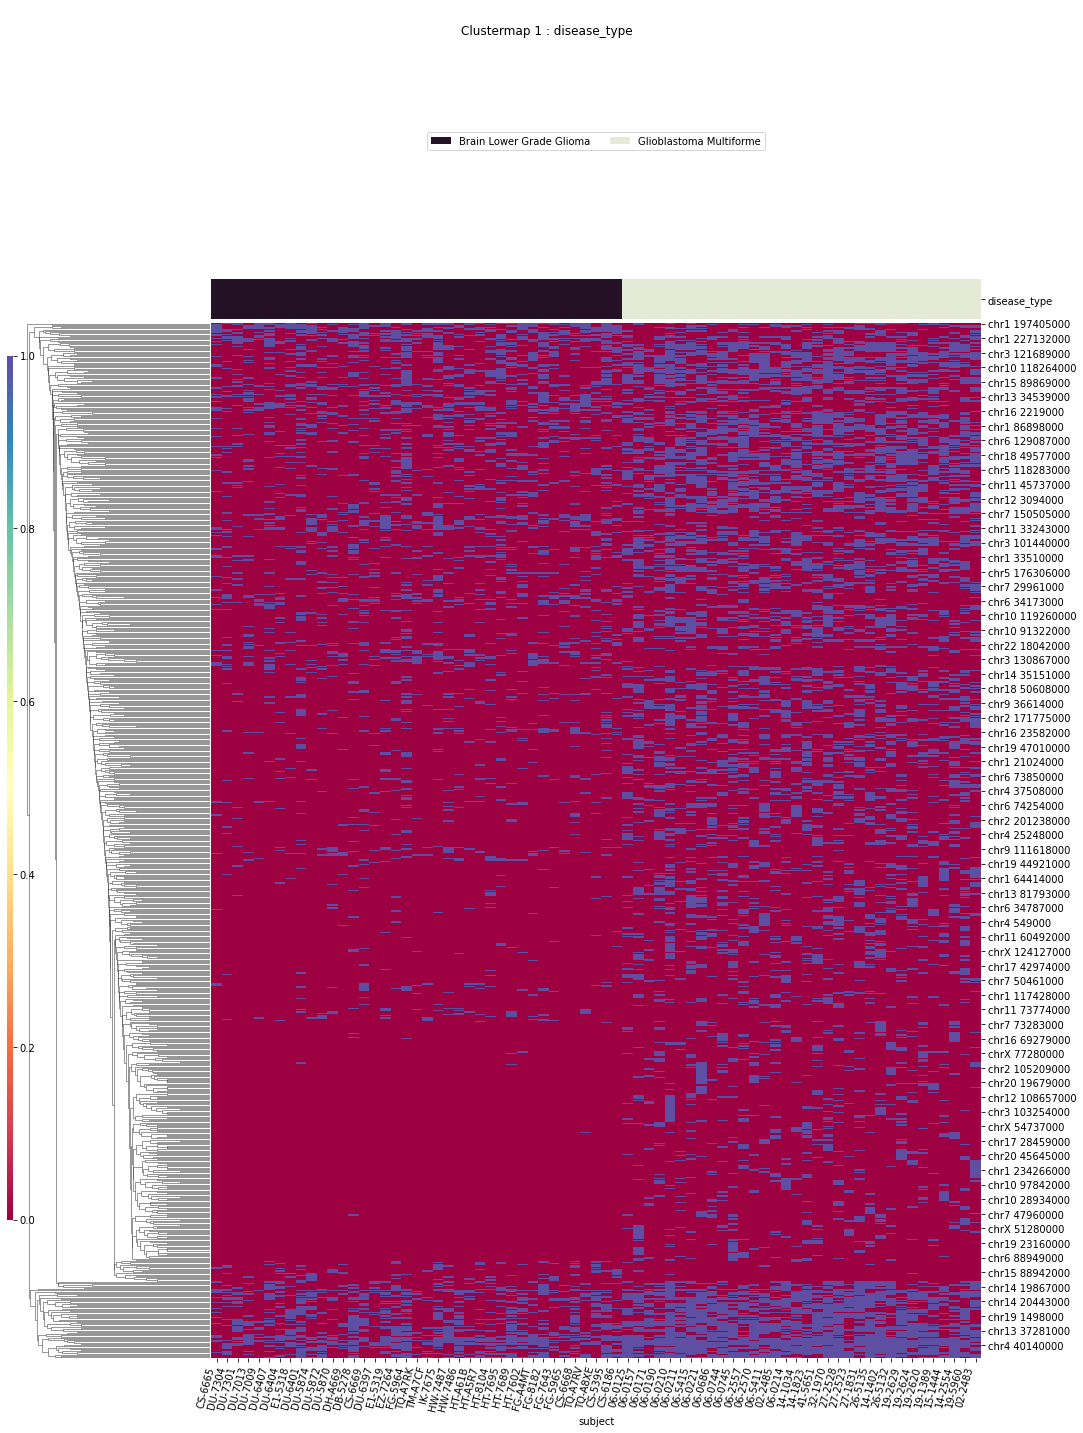

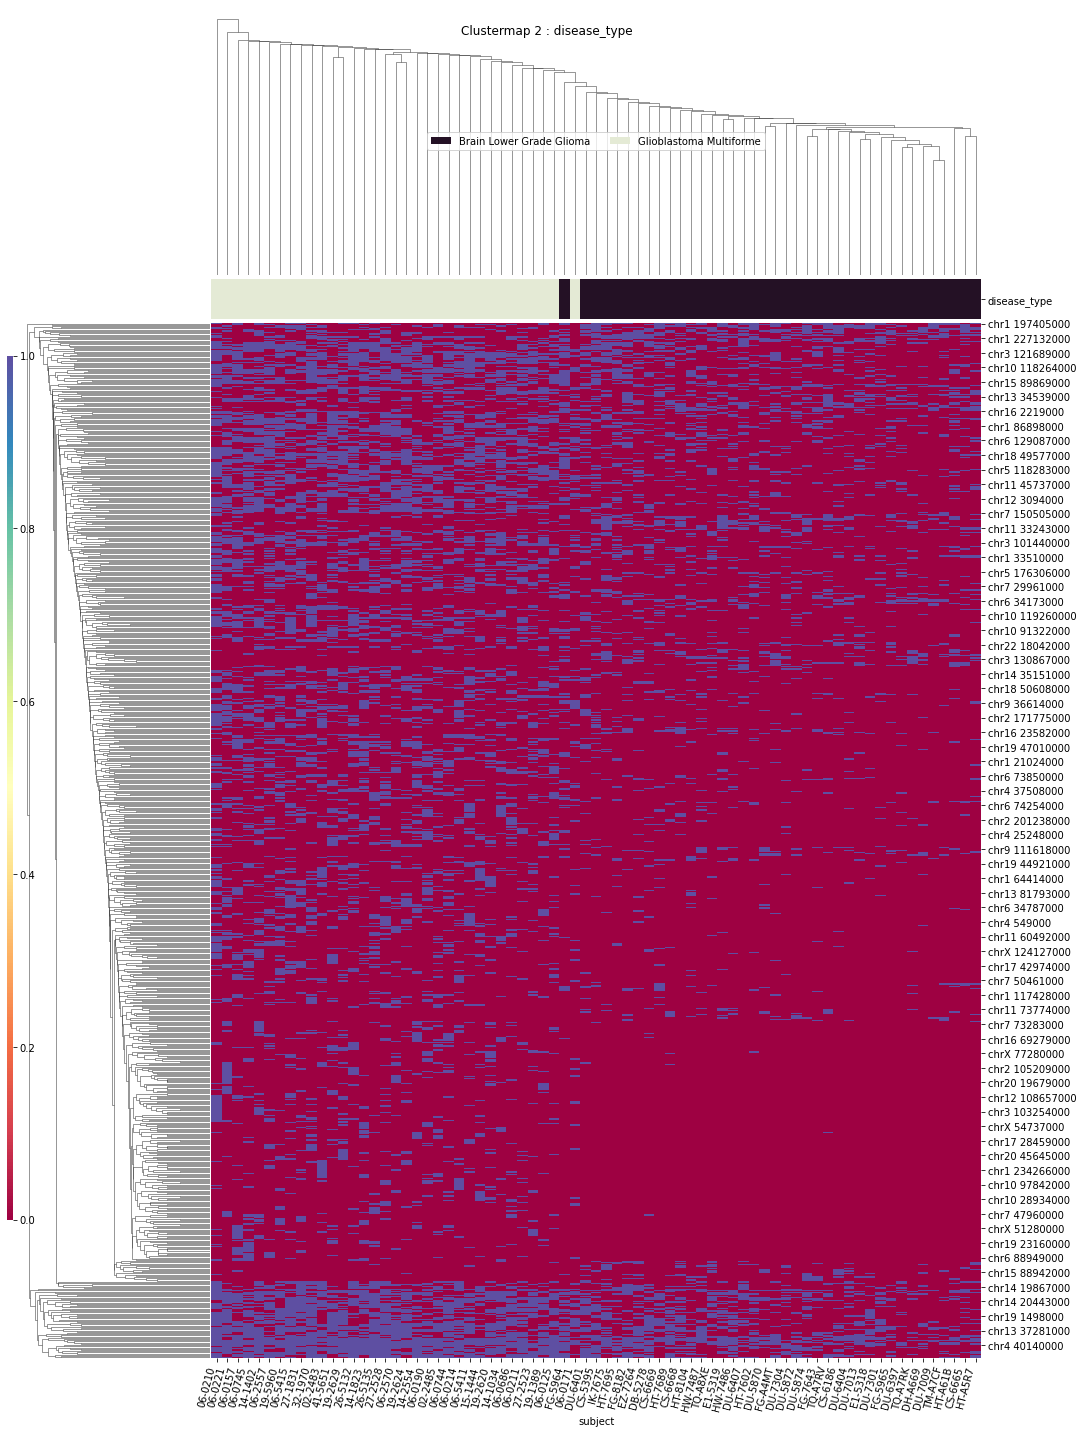

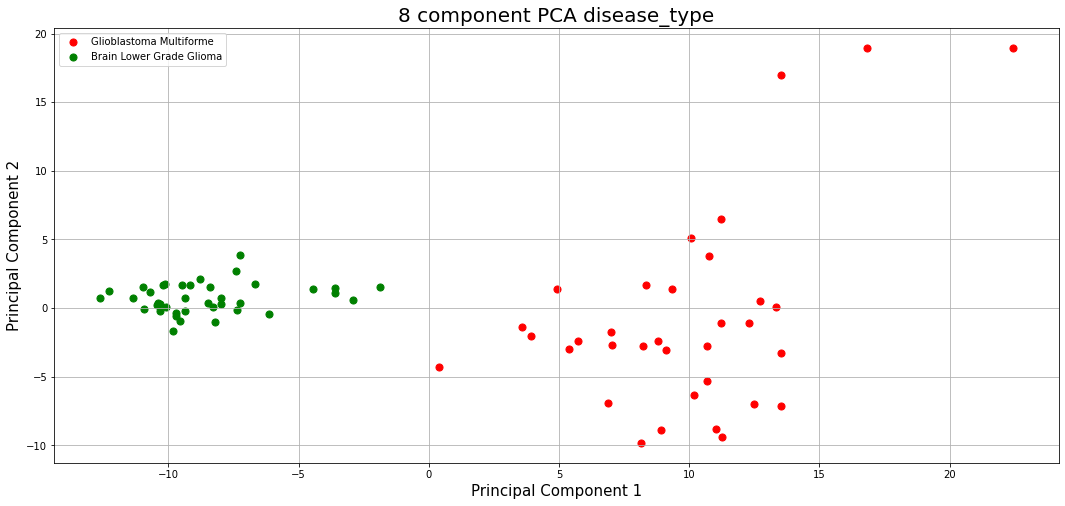

In [104]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(compdf,
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-10,heat_p=0.1)
    

In [105]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210622 13:45:52'

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 108676000' 'chr1 111800000' 'chr1 11249000' 'chr1 13330000'
 'chr1 147061000' 'chr1 147062000' 'chr1 151650000' 'chr1 152144000'
 'chr1 173614000' 'chr1 197405000' 'chr1 208658000' 'chr1 21024000'
 'chr1 212780000' 'chr1 213150000' 'chr1 21389000' 'chr1 219872000'
 'chr1 22159000' 'chr1 227132000' 'chr1 231127000' 'chr1 235310000'
 'chr1 237126000' 'chr1 23854000' 'chr1 246363000' 'chr1 24801000'
 'chr1 248676000' 'chr1 26802000' 'chr1 27065000' 'chr1 39999000'
 'chr1 45082000' 'chr1 45498000' 'chr1 52869000' 'chr1 54234000'
 'chr1 65630000' 'chr1 7952000' 'chr1 96469000' 'chr10 100094000'
 'chr10 118264000' 'chr10 119260000' 'chr10 125969000' 'chr10 17628000'
 'chr10 21431000' 'chr10 24658000' 'chr10 42848000' 'chr10 43423000'
 'chr10 68280000' 'chr10 69992000' 'chr10 70686000' 'chr10 91322000'
 'chr10 92673000' 'chr10 9274000' 'chr10 92976000' 'chr10 99892000'
 'chr11 104195000' 'chr11 125864000' 'chr11 17049000' 'chr11 1705100

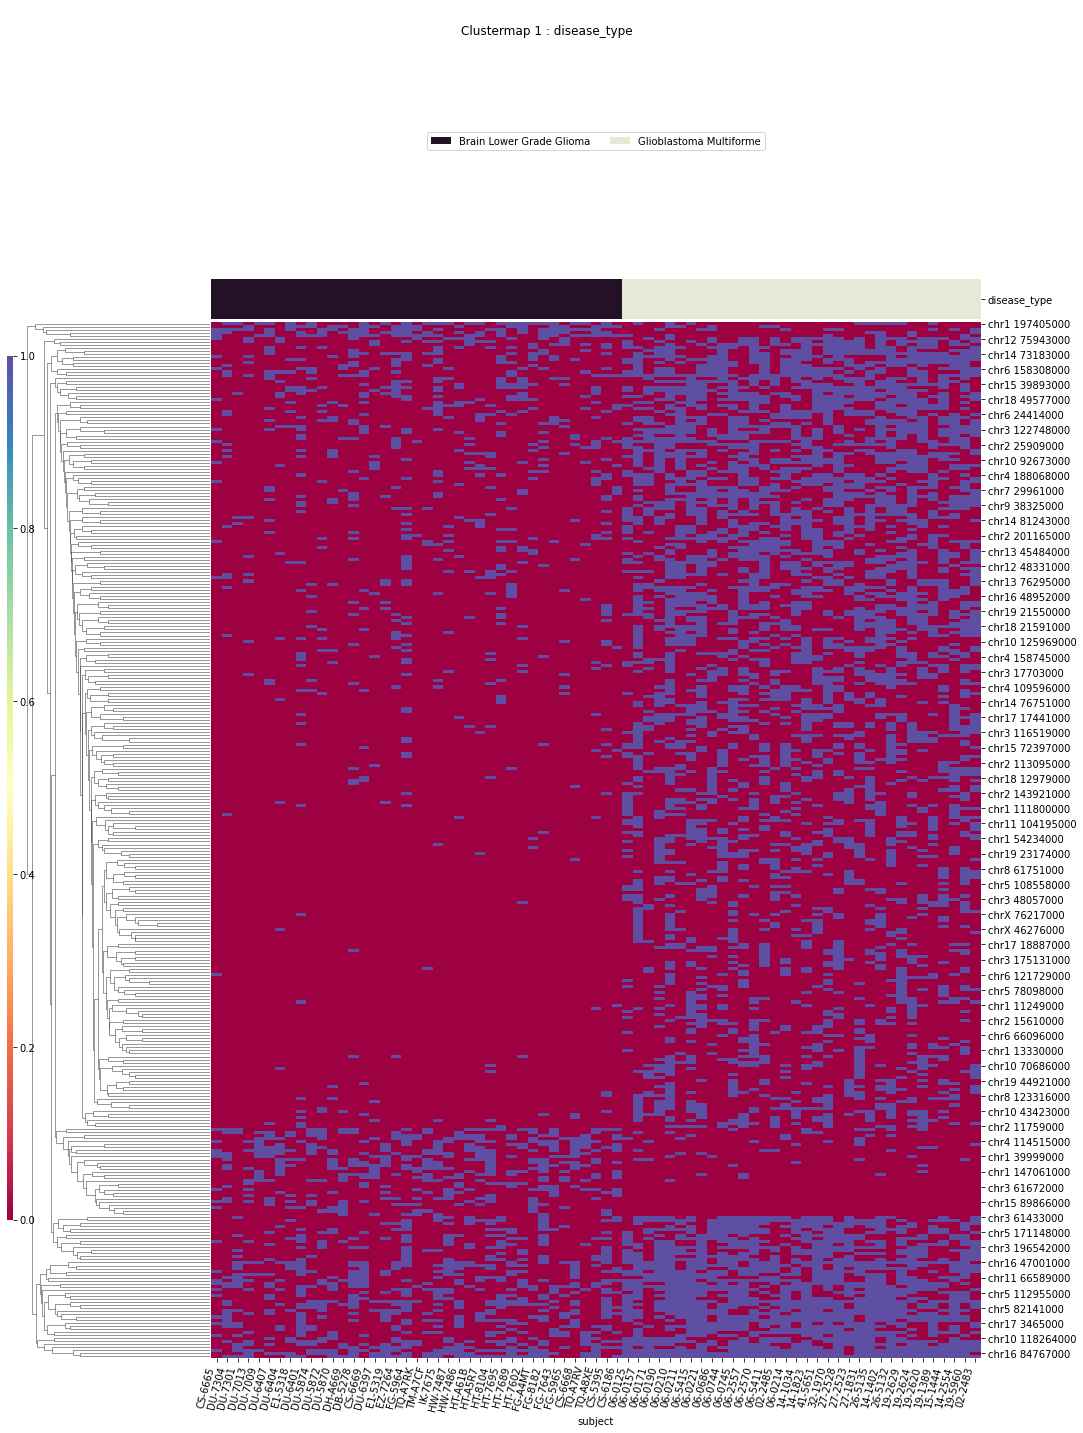

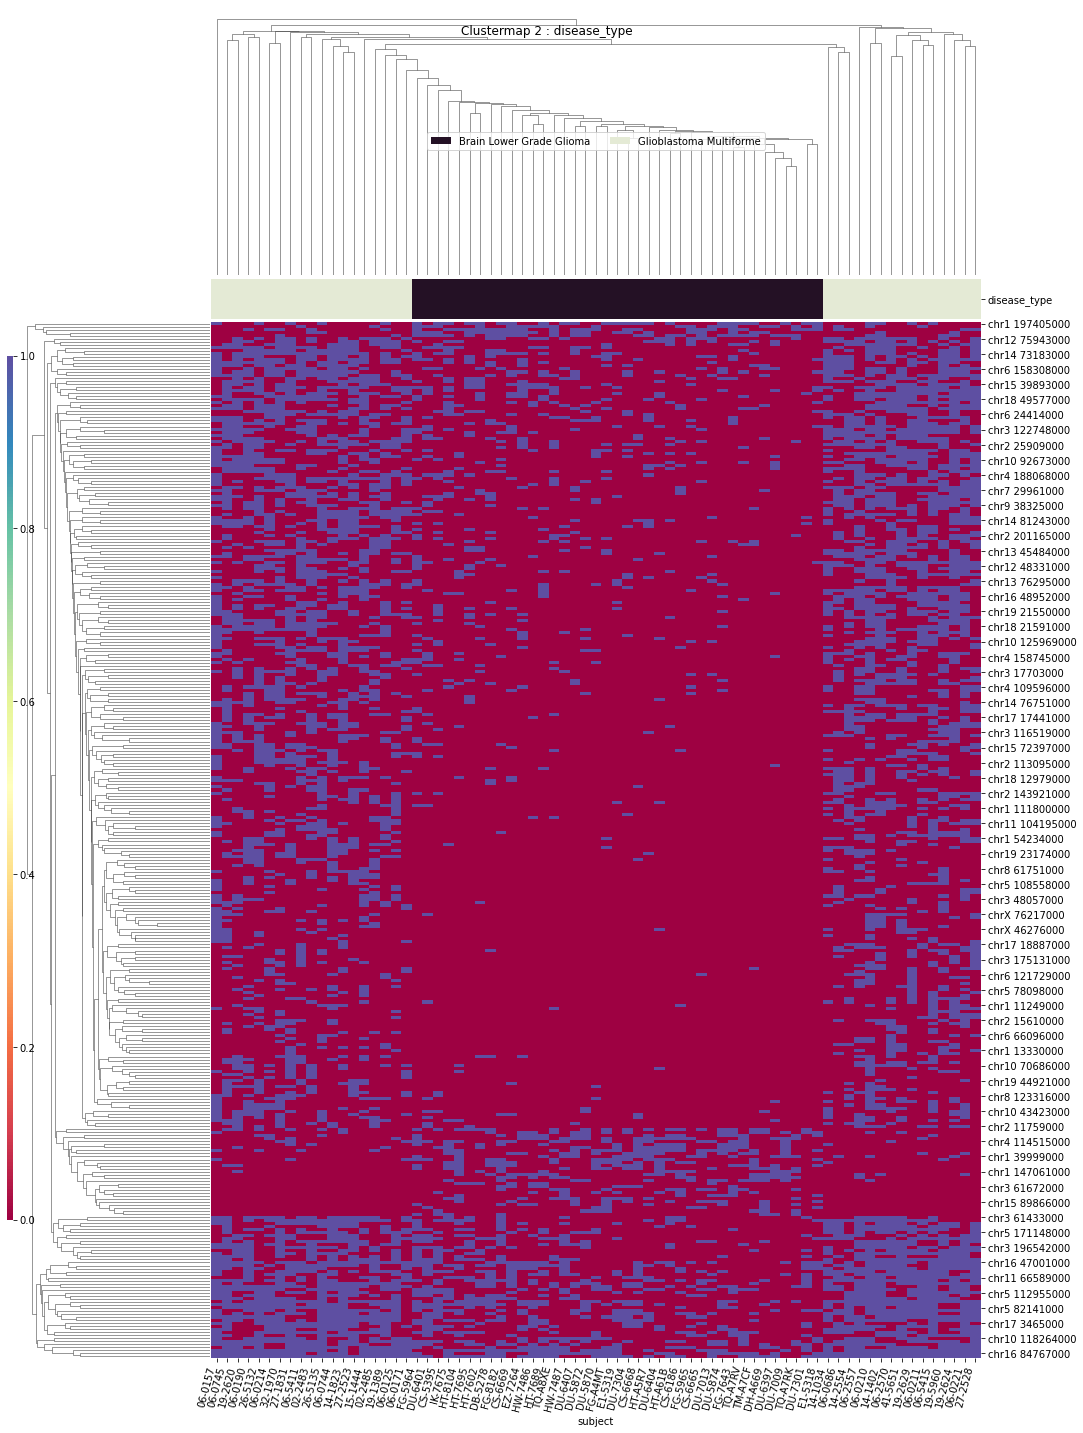

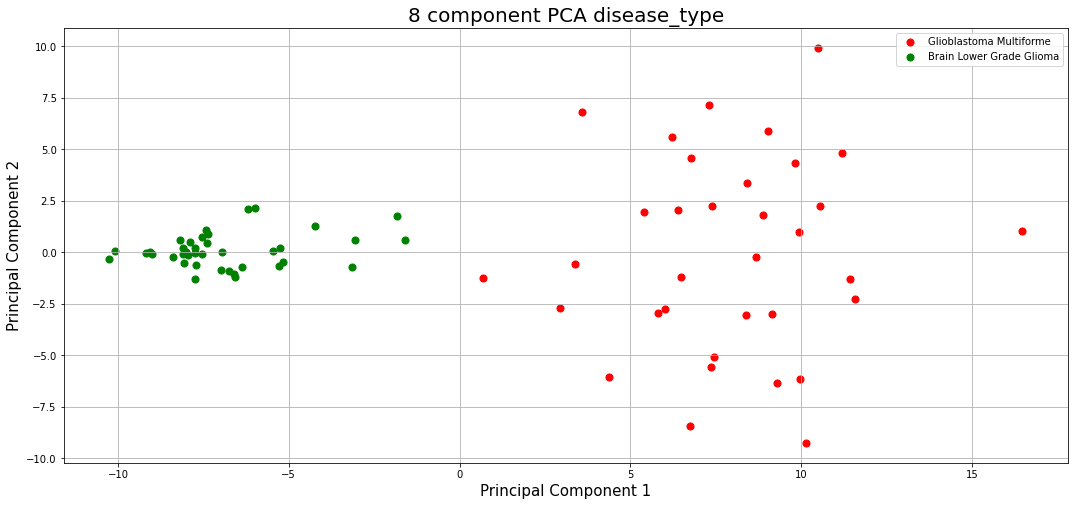

In [106]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(compdf,
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.01)
    

In [107]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210622 13:46:06'

disease_type
T-Testing
Boxplotting
Clustermapping
['chr1 108676000' 'chr1 111800000' 'chr1 147062000' 'chr1 151650000'
 'chr1 152144000' 'chr1 173614000' 'chr1 213150000' 'chr1 21389000'
 'chr1 231127000' 'chr1 246363000' 'chr1 24801000' 'chr1 26802000'
 'chr1 45498000' 'chr1 54234000' 'chr1 65630000' 'chr1 96469000'
 'chr10 100094000' 'chr10 24658000' 'chr10 42848000' 'chr10 69992000'
 'chr10 70686000' 'chr10 91322000' 'chr10 92673000' 'chr10 9274000'
 'chr10 99892000' 'chr11 104195000' 'chr11 125864000' 'chr11 17049000'
 'chr11 28429000' 'chr11 45737000' 'chr11 56144000' 'chr11 60452000'
 'chr11 60492000' 'chr11 60816000' 'chr11 70294000' 'chr11 72501000'
 'chr11 73775000' 'chr11 75876000' 'chr12 100293000' 'chr12 103644000'
 'chr12 104322000' 'chr12 111508000' 'chr12 119359000' 'chr12 3094000'
 'chr12 37813000' 'chr12 43686000' 'chr12 48331000' 'chr12 48499000'
 'chr12 63687000' 'chr12 73853000' 'chr12 7589000' 'chr13 100618000'
 'chr13 100761000' 'chr13 34182000' 'chr13 45484000' '

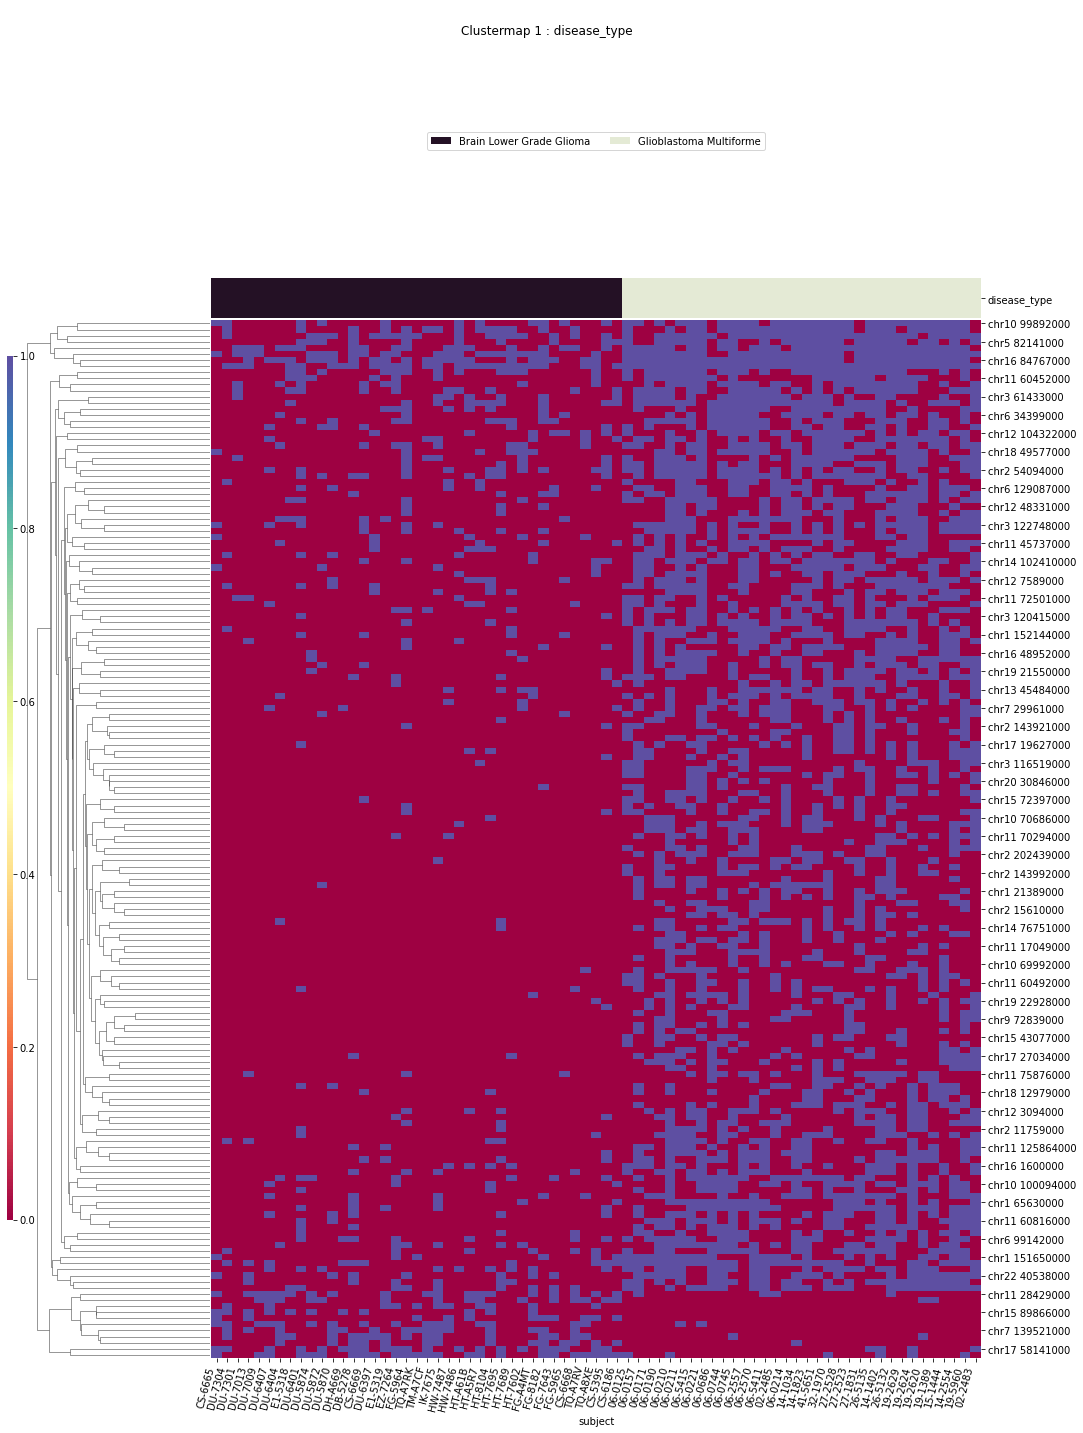

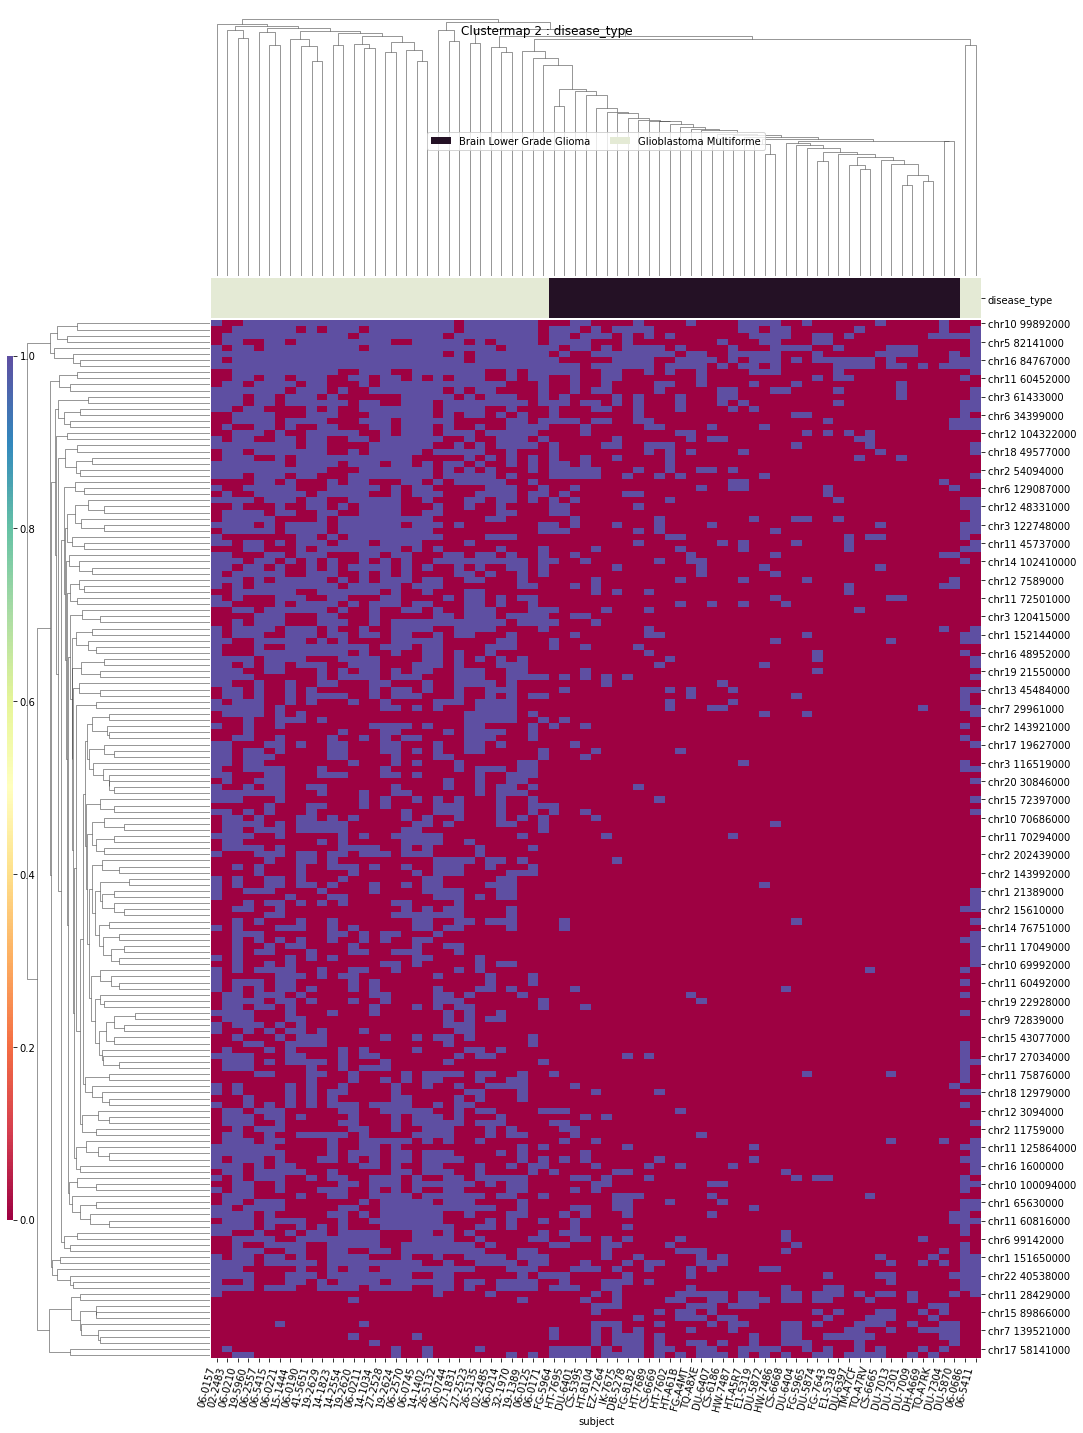

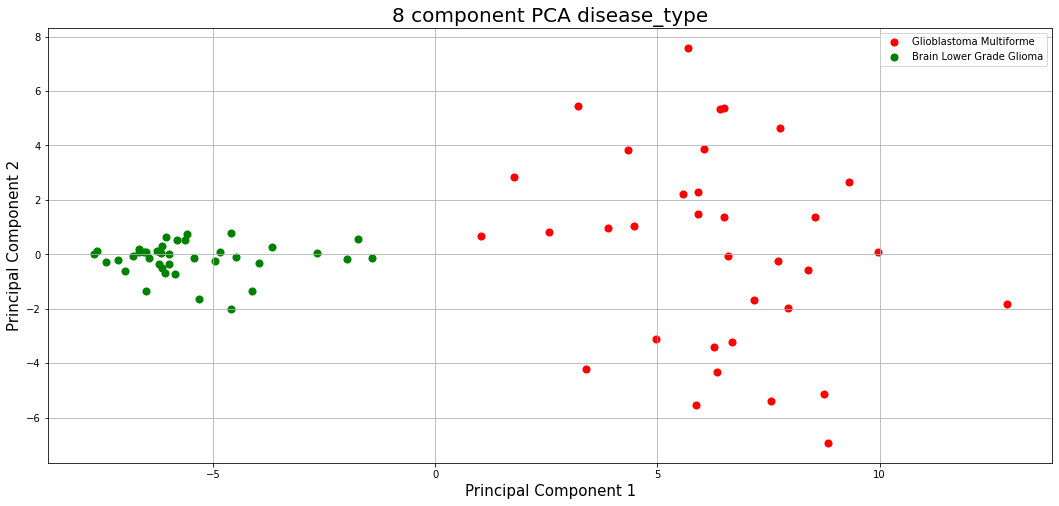

In [108]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(compdf,
        compdf.columns[compdf.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.001)
    

In [109]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210622 13:46:20'

# Load the GPMP data

In [110]:
gpmp_df=pd.read_csv(gpmpdata,header=[0,1],index_col=[0,1,2,3])
gpmp_df

chromosome                              chr1                                  \
position                             1409000 1410000 1580000 1581000 5573000   
sample          pup    hkle     mapq                                           
SF12149_S1L1_N  paired HERVK113 Q20        4       3       1       0       0   
                       SVA_A    Q20        0       0       0       0       0   
                       SVA_B    Q20        0       0       0       0       0   
                       SVA_C    Q20        0       0       0       0       0   
                       SVA_D    Q20        0       0       0       0       0   
...                                      ...     ...     ...     ...     ...   
SF12656_S11L4_N paired SVA_B    Q20        0       1       0       0       0   
                       SVA_C    Q20        0       0       0       0       0   
                       SVA_D    Q20        0       0       0       0       0   
                       SVA_E    Q20        0       0       0       0       0   
                       SVA_F    Q20        0       0       0       0       0   

chromosome                                                                    \
position                             6304000 6306000 6714000 6716000 7600000   
sample          pup    hkle     mapq                                           
SF12149_S1L1_N  paired HERVK113 Q20        0       0       0       0       0   
                       SVA_A    Q20        3       1       2       2       0   
                       SVA_B    Q20        1       1       2       1       0   
                       SVA_C    Q20        2       1       2       1       0   
                       SVA_D    Q20        2       1       2       1       0   
...                                      ...     ...     ...     ...     ...   
SF12656_S11L4_N paired SVA_B    Q20        2       0       1       1       2   
                       SVA_C    Q20        3       0       1       1       3   
                       SVA_D    Q20        3       0       1       1       3   
                       SVA_E    Q20        3       0       1       1       3   
                       SVA_F    Q20        3       0       0       0       0   

chromosome                            ...     chrY                             \
position                              ... 12879000 13103000 13104000 15774000   
sample          pup    hkle     mapq  ...                                       
SF12149_S1L1_N  paired HERVK113 Q20   ...        0        0        1        0   
                       SVA_A    Q20   ...        0        0        0        0   
                       SVA_B    Q20   ...        0        0        0        0   
                       SVA_C    Q20   ...        0        0        0        0   
                       SVA_D    Q20   ...        0        0        0        0   
...                                   ...      ...      ...      ...      ...   
SF12656_S11L4_N paired SVA_B    Q20   ...        0        0        0        0   
                       SVA_C    Q20   ...        0        0        0        0   
                       SVA_D    Q20   ...        0        0        0        0   
                       SVA_E    Q20   ...        0        0        0        0   
                       SVA_F    Q20   ...        0        0        0        0   

chromosome                                                                \
position                             19535000 19536000 19699000 19700000   
sample          pup    hkle     mapq                                       
SF12149_S1L1_N  paired HERVK113 Q20         0        0        2        2   
                       SVA_A    Q20         0        2        0        0   
                       SVA_B    Q20         0        2        0        0   
                       SVA_C    Q20         0        2        0        0   
                       SVA_D    Q20         0        2        0        0   
...            

In [111]:
gpmp_df.reset_index(inplace=True)
gpmp_df

chromosome           sample     pup      hkle mapq    chr1                  \
position                                           1409000 1410000 1580000   
0            SF12149_S1L1_N  paired  HERVK113  Q20       4       3       1   
1            SF12149_S1L1_N  paired     SVA_A  Q20       0       0       0   
2            SF12149_S1L1_N  paired     SVA_B  Q20       0       0       0   
3            SF12149_S1L1_N  paired     SVA_C  Q20       0       0       0   
4            SF12149_S1L1_N  paired     SVA_D  Q20       0       0       0   
..                      ...     ...       ...  ...     ...     ...     ...   
93          SF12656_S11L4_N  paired     SVA_B  Q20       0       1       0   
94          SF12656_S11L4_N  paired     SVA_C  Q20       0       0       0   
95          SF12656_S11L4_N  paired     SVA_D  Q20       0       0       0   
96          SF12656_S11L4_N  paired     SVA_E  Q20       0       0       0   
97          SF12656_S11L4_N  paired     SVA_F  Q20       0       0       0   

chromosome                          ...     chrY                             \
position   1581000 5573000 6304000  ... 12879000 13103000 13104000 15774000   
0                0       0       0  ...        0        0        1        0   
1                0       0       3  ...        0        0        0        0   
2                0       0       1  ...        0        0        0        0   
3                0       0       2  ...        0        0        0        0   
4                0       0       2  ...        0        0        0        0   
..             ...     ...     ...  ...      ...      ...      ...      ...   
93               0       0       2  ...        0        0        0        0   
94               0       0       3  ...        0        0        0        0   
95               0       0       3  ...        0        0        0        0   
96               0       0       3  ...        0        0        0        0   
97               0       0       3  ...        0        0        0        0   

chromosome                                                        
position   19535000 19536000 19699000 19700000 20553000 20976000  
0                 0        0        2        2        0        0  
1                 0        2        0        0        1        0  
2                 0        2        0        0        1        0  
3                 0        2        0        0        1        0  
4                 0        2        0        0        1        0  
..              ...      ...      ...      ...      ...      ...  
93                0        0        0        0        0        0  
94                0        0        0        0        0        0  
95                0        0        0        0        0        0  
96                0        0        0        0        0        0  
97                0        0        0        0        0        0  

[98 rows x 5384 columns]

In [112]:
gpmp_df=gpmp_df[gpmp_df['hkle']==hkle]
gpmp_df

chromosome           sample     pup   hkle mapq    chr1                  \
position                                        1409000 1410000 1580000   
6            SF12149_S1L1_N  paired  SVA_F  Q20       0       0       0   
13           SF12210_S2L1_N  paired  SVA_F  Q20       0       0       0   
20           SF12255_S7L2_N  paired  SVA_F  Q20       0       0       0   
27           SF12271_S8L2_N  paired  SVA_F  Q20       0       0       0   
34           SF12288_S1L1_N  paired  SVA_F  Q20       0       0       0   
41           SF12333_S2L1_N  paired  SVA_F  Q20       0       0       0   
48           SF12407_S1L1_N  paired  SVA_F  Q20       0       0       0   
55           SF12430_S2L1_N  paired  SVA_F  Q20       0       0       0   
62           SF12460_S8L3_N  paired  SVA_F  Q20       0       0       0   
69           SF12480_S7L3_N  paired  SVA_F  Q20       0       0       0   
76           SF12495_S9L3_N  paired  SVA_F  Q20       0       0       0   
83           SF12577_S6L2_N  paired  SVA_F  Q20       0       0       0   
90          SF12634_S10L4_N  paired  SVA_F  Q20       0       0       0   
97          SF12656_S11L4_N  paired  SVA_F  Q20       0       0       0   

chromosome                          ...     chrY                             \
position   1581000 5573000 6304000  ... 12879000 13103000 13104000 15774000   
6                0       0       1  ...        0        0        0        0   
13               0       0       1  ...        0        0        0        0   
20               0       0       2  ...        0        0        0        0   
27               0       0       2  ...        0        0        0        0   
34               0       0       2  ...        0        0        0        0   
41               0       0       7  ...        0        0        0        0   
48               0       0       5  ...        0        0        0        0   
55               0       0       2  ...        0        0        0        0   
62               0       0       1  ...        0        0        0        0   
69               0       0       1  ...        0        0        0        0   
76               0       0       3  ...        0        0        0        0   
83               0       0       1  ...        0        0        0        0   
90               0       0       7  ...        0        0        0        0   
97               0       0       3  ...        0        0        0        0   

chromosome                                                        
position   19535000 19536000 19699000 19700000 20553000 20976000  
6                 0        0        0        0        0        0  
13                0        0        0        0        0        0  
20                0        0        0        0        0        0  
27                0        0        0        0        0        0  
34                0        0        0        0        0        0  
41                0        0        0        0        0        0  
48                0        0        0        0        0        0  
55                0        0        0        0        0        0  
62                0        0        0        0        0        0  
69                0        0        0        0        0        0  
76                0        0        0        0        0        0  
83                0        0        0        0        0        0  
90                0        1        0        0        0        0  
97                0        0        0        0        0        0  

[14 rows x 5384 columns]

In [113]:
gpmp_df['subject']=gpmp_df['sample'].str[0:7]
gpmp_df['subject']

<ipython-input-113-9c38aa8e9611>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpmp_df['subject']=gpmp_df['sample'].str[0:7]


6     SF12149
13    SF12210
20    SF12255
27    SF12271
34    SF12288
41    SF12333
48    SF12407
55    SF12430
62    SF12460
69    SF12480
76    SF12495
83    SF12577
90    SF12634
97    SF12656
Name: subject, dtype: object

In [114]:
gpmp_df.set_index(['subject','sample','pup','hkle','mapq'],inplace=True)
gpmp_df #.head()

chromosome                                   chr1                          \
position                                  1409000 1410000 1580000 1581000   
subject sample          pup    hkle  mapq                                   
SF12149 SF12149_S1L1_N  paired SVA_F Q20        0       0       0       0   
SF12210 SF12210_S2L1_N  paired SVA_F Q20        0       0       0       0   
SF12255 SF12255_S7L2_N  paired SVA_F Q20        0       0       0       0   
SF12271 SF12271_S8L2_N  paired SVA_F Q20        0       0       0       0   
SF12288 SF12288_S1L1_N  paired SVA_F Q20        0       0       0       0   
SF12333 SF12333_S2L1_N  paired SVA_F Q20        0       0       0       0   
SF12407 SF12407_S1L1_N  paired SVA_F Q20        0       0       0       0   
SF12430 SF12430_S2L1_N  paired SVA_F Q20        0       0       0       0   
SF12460 SF12460_S8L3_N  paired SVA_F Q20        0       0       0       0   
SF12480 SF12480_S7L3_N  paired SVA_F Q20        0       0       0       0   
SF12495 SF12495_S9L3_N  paired SVA_F Q20        0       0       0       0   
SF12577 SF12577_S6L2_N  paired SVA_F Q20        0       0       0       0   
SF12634 SF12634_S10L4_N paired SVA_F Q20        0       0       0       0   
SF12656 SF12656_S11L4_N paired SVA_F Q20        0       0       0       0   

chromosome                                                                 \
position                                  5573000 6304000 6306000 6714000   
subject sample          pup    hkle  mapq                                   
SF12149 SF12149_S1L1_N  paired SVA_F Q20        0       1       0       0   
SF12210 SF12210_S2L1_N  paired SVA_F Q20        0       1       0       0   
SF12255 SF12255_S7L2_N  paired SVA_F Q20        0       2       0       0   
SF12271 SF12271_S8L2_N  paired SVA_F Q20        0       2       0       0   
SF12288 SF12288_S1L1_N  paired SVA_F Q20        0       2       0       0   
SF12333 SF12333_S2L1_N  paired SVA_F Q20        0       7       0       2   
SF12407 SF12407_S1L1_N  paired SVA_F Q20        0       5       0       0   
SF12430 SF12430_S2L1_N  paired SVA_F Q20        0       2       0       0   
SF12460 SF12460_S8L3_N  paired SVA_F Q20        0       1       0       0   
SF12480 SF12480_S7L3_N  paired SVA_F Q20        0       1       0       0   
SF12495 SF12495_S9L3_N  paired SVA_F Q20        0       3       0       0   
SF12577 SF12577_S6L2_N  paired SVA_F Q20        0       1       0       0   
SF12634 SF12634_S10L4_N paired SVA_F Q20        0       7       0       0   
SF12656 SF12656_S11L4_N paired SVA_F Q20        0       3       0       0   

chromosome                                                 ...     chrY  \
position                                  6716000 7600000  ... 12879000   
subject sample          pup    hkle  mapq                  ...            
SF12149 SF12149_S1L1_N  paired SVA_F Q20        1       0  ...        0   
SF12210 SF12210_S2L1_N  paired SVA_F Q20        0       0  ...        0   
SF12255 SF12255_S7L2_N  paired SVA_F Q20        0       1  ...        0   
SF12271 SF12271_S8L2_N  paired SVA_F Q20        3       1  ...        0   
SF12288 SF12288_S1L1_N  paired SVA_F Q20        0       0  ...        0   
SF12333 SF12333_S2L1_N  paired SVA_F Q20        0       0  ...        0   
SF12407 SF12407_S1L1_N  paired SVA_F Q20        0       5  ...        0   
SF12430 SF12430_S2L1_N  paired SVA_F Q20        3       1  ...        0   
SF12460 SF12460_S8L3_N  paired SVA_F Q20        1       0  ...        0   
SF12480 SF12480_S7L3_N  paired SVA_F Q20        0       0  ...        0   
SF12495 SF12495_S9L3_N  paired SVA_F Q20        0       1  ...        0   
SF12577 SF12577_S6L2_N  paired SVA_F Q20        1       0  ...        0   
SF12634 SF12634_S10L4_N paired SVA_F Q20        1       0  ...        0   
SF12656 SF12656_S11L4_N paired SVA_F Q20        0       0  ...        0   

chromosome                                                                     \
position               

# Select only the normals

In [115]:
gpmp_df = gpmp_df.loc[
    gpmp_df.loc[gpmp_df.index.get_level_values('sample').str.contains("N$")].index]


In [116]:
gpmp_df

chromosome                                   chr1                          \
position                                  1409000 1410000 1580000 1581000   
subject sample          pup    hkle  mapq                                   
SF12149 SF12149_S1L1_N  paired SVA_F Q20        0       0       0       0   
SF12210 SF12210_S2L1_N  paired SVA_F Q20        0       0       0       0   
SF12255 SF12255_S7L2_N  paired SVA_F Q20        0       0       0       0   
SF12271 SF12271_S8L2_N  paired SVA_F Q20        0       0       0       0   
SF12288 SF12288_S1L1_N  paired SVA_F Q20        0       0       0       0   
SF12333 SF12333_S2L1_N  paired SVA_F Q20        0       0       0       0   
SF12407 SF12407_S1L1_N  paired SVA_F Q20        0       0       0       0   
SF12430 SF12430_S2L1_N  paired SVA_F Q20        0       0       0       0   
SF12460 SF12460_S8L3_N  paired SVA_F Q20        0       0       0       0   
SF12480 SF12480_S7L3_N  paired SVA_F Q20        0       0       0       0   
SF12495 SF12495_S9L3_N  paired SVA_F Q20        0       0       0       0   
SF12577 SF12577_S6L2_N  paired SVA_F Q20        0       0       0       0   
SF12634 SF12634_S10L4_N paired SVA_F Q20        0       0       0       0   
SF12656 SF12656_S11L4_N paired SVA_F Q20        0       0       0       0   

chromosome                                                                 \
position                                  5573000 6304000 6306000 6714000   
subject sample          pup    hkle  mapq                                   
SF12149 SF12149_S1L1_N  paired SVA_F Q20        0       1       0       0   
SF12210 SF12210_S2L1_N  paired SVA_F Q20        0       1       0       0   
SF12255 SF12255_S7L2_N  paired SVA_F Q20        0       2       0       0   
SF12271 SF12271_S8L2_N  paired SVA_F Q20        0       2       0       0   
SF12288 SF12288_S1L1_N  paired SVA_F Q20        0       2       0       0   
SF12333 SF12333_S2L1_N  paired SVA_F Q20        0       7       0       2   
SF12407 SF12407_S1L1_N  paired SVA_F Q20        0       5       0       0   
SF12430 SF12430_S2L1_N  paired SVA_F Q20        0       2       0       0   
SF12460 SF12460_S8L3_N  paired SVA_F Q20        0       1       0       0   
SF12480 SF12480_S7L3_N  paired SVA_F Q20        0       1       0       0   
SF12495 SF12495_S9L3_N  paired SVA_F Q20        0       3       0       0   
SF12577 SF12577_S6L2_N  paired SVA_F Q20        0       1       0       0   
SF12634 SF12634_S10L4_N paired SVA_F Q20        0       7       0       0   
SF12656 SF12656_S11L4_N paired SVA_F Q20        0       3       0       0   

chromosome                                                 ...     chrY  \
position                                  6716000 7600000  ... 12879000   
subject sample          pup    hkle  mapq                  ...            
SF12149 SF12149_S1L1_N  paired SVA_F Q20        1       0  ...        0   
SF12210 SF12210_S2L1_N  paired SVA_F Q20        0       0  ...        0   
SF12255 SF12255_S7L2_N  paired SVA_F Q20        0       1  ...        0   
SF12271 SF12271_S8L2_N  paired SVA_F Q20        3       1  ...        0   
SF12288 SF12288_S1L1_N  paired SVA_F Q20        0       0  ...        0   
SF12333 SF12333_S2L1_N  paired SVA_F Q20        0       0  ...        0   
SF12407 SF12407_S1L1_N  paired SVA_F Q20        0       5  ...        0   
SF12430 SF12430_S2L1_N  paired SVA_F Q20        3       1  ...        0   
SF12460 SF12460_S8L3_N  paired SVA_F Q20        1       0  ...        0   
SF12480 SF12480_S7L3_N  paired SVA_F Q20        0       0  ...        0   
SF12495 SF12495_S9L3_N  paired SVA_F Q20        0       1  ...        0   
SF12577 SF12577_S6L2_N  paired SVA_F Q20        1       0  ...        0   
SF12634 SF12634_S10L4_N paired SVA_F Q20        1       0  ...        0   
SF12656 SF12656_S11L4_N paired SVA_F Q20        0       0  ...        0   

chromosome                                                                     \
position               

In [117]:
gpmp_df=gpmp_df.droplevel('pup',axis='index').droplevel('mapq',axis='index').droplevel('hkle',axis='index')
gpmp_df

chromosome                 chr1                                          \
position                1409000 1410000 1580000 1581000 5573000 6304000   
subject sample                                                            
SF12149 SF12149_S1L1_N        0       0       0       0       0       1   
SF12210 SF12210_S2L1_N        0       0       0       0       0       1   
SF12255 SF12255_S7L2_N        0       0       0       0       0       2   
SF12271 SF12271_S8L2_N        0       0       0       0       0       2   
SF12288 SF12288_S1L1_N        0       0       0       0       0       2   
SF12333 SF12333_S2L1_N        0       0       0       0       0       7   
SF12407 SF12407_S1L1_N        0       0       0       0       0       5   
SF12430 SF12430_S2L1_N        0       0       0       0       0       2   
SF12460 SF12460_S8L3_N        0       0       0       0       0       1   
SF12480 SF12480_S7L3_N        0       0       0       0       0       1   
SF12495 SF12495_S9L3_N        0       0       0       0       0       3   
SF12577 SF12577_S6L2_N        0       0       0       0       0       1   
SF12634 SF12634_S10L4_N       0       0       0       0       0       7   
SF12656 SF12656_S11L4_N       0       0       0       0       0       3   

chromosome                                               ...     chrY  \
position                6306000 6714000 6716000 7600000  ... 12879000   
subject sample                                           ...            
SF12149 SF12149_S1L1_N        0       0       1       0  ...        0   
SF12210 SF12210_S2L1_N        0       0       0       0  ...        0   
SF12255 SF12255_S7L2_N        0       0       0       1  ...        0   
SF12271 SF12271_S8L2_N        0       0       3       1  ...        0   
SF12288 SF12288_S1L1_N        0       0       0       0  ...        0   
SF12333 SF12333_S2L1_N        0       2       0       0  ...        0   
SF12407 SF12407_S1L1_N        0       0       0       5  ...        0   
SF12430 SF12430_S2L1_N        0       0       3       1  ...        0   
SF12460 SF12460_S8L3_N        0       0       1       0  ...        0   
SF12480 SF12480_S7L3_N        0       0       0       0  ...        0   
SF12495 SF12495_S9L3_N        0       0       0       1  ...        0   
SF12577 SF12577_S6L2_N        0       0       1       0  ...        0   
SF12634 SF12634_S10L4_N       0       0       1       0  ...        0   
SF12656 SF12656_S11L4_N       0       0       0       0  ...        0   

chromosome                                                                     \
position                13103000 13104000 15774000 19535000 19536000 19699000   
subject sample                                                                  
SF12149 SF12149_S1L1_N         0        0        0        0        0        0   
SF12210 SF12210_S2L1_N         0        0        0        0        0        0   
SF12255 SF12255_S7L2_N         0        0        0        0        0        0   
SF12271 SF12271_S8L2_N         0        0        0        0        0        0   
SF12288 SF12288_S1L1_N         0        0        0        0        0        0   
SF12333 SF12333_S2L1_N         0        0        0        0        0        0   
SF12407 SF12407_S1L1_N         0        0        0        0        0        0   
SF12430 SF12430_S2L1_N         0        0        0        0        0        0   
SF12460 SF12460_S8L3_N         0        0        0        0        0        0   
SF12480 SF12480_S7L3_N         0        0        0        0        0        0   
SF12495 SF12495_S9L3_N         0        0        0        0        0        0   
SF12577 SF12577_S6L2_N         0        0        0        0        0        0   
SF12634 SF12634_S10L4_N        0        0        0        0        1        0   
SF12656 SF12656_S11L4_N        0        0        0        0        0        0   

chromosome                                          
position                19700000 20553000 20976000 

In [118]:
gpmp_df.columns= [' '.join(col).strip() for col in gpmp_df.columns.values]
gpmp_df

,,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,chr1 5573000,chr1 6304000,chr1 6306000,chr1 6714000,chr1 6716000,chr1 7600000,...,chrY 12879000,chrY 13103000,chrY 13104000,chrY 15774000,chrY 19535000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20553000,chrY 20976000
subject,sample,,,,,,,,,,,,,,,,,,,,,
SF12149,SF12149_S1L1_N,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
SF12210,SF12210_S2L1_N,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12255,SF12255_S7L2_N,0,0,0,0,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
SF12271,SF12271_S8L2_N,0,0,0,0,0,2,0,0,3,1,...,0,0,0,0,0,0,0,0,0,0
SF12288,SF12288_S1L1_N,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12333,SF12333_S2L1_N,0,0,0,0,0,7,0,2,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12407,SF12407_S1L1_N,0,0,0,0,0,5,0,0,0,5,...,0,0,0,0,0,0,0,0,0,0
SF12430,SF12430_S2L1_N,0,0,0,0,0,2,0,0,3,1,...,0,0,0,0,0,0,0,0,0,0
SF12460,SF12460_S8L3_N,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0


# NORMALIZE INSERTION POINTS BY ( * 1,000,000,000 / READ COUNT )

In [119]:
gpmp_counts=pd.read_csv("GPMP/raw_read_counts.csv")
gpmp_counts.head()

,sample,raw pair count
0,SF12149_S1L0_E,1515318278
1,SF12149_S1L1_N,660620929
2,SF12149_S2L0_NE,1334986480
3,SF12210_S2L1_N,597544666
4,SF12210_S3L1_E,1487133148


In [120]:
gpmp_df.reset_index(inplace=True)
gpmp_df=gpmp_df.merge(gpmp_counts,on='sample')
gpmp_df.set_index(['subject','sample'],inplace=True)
gpmp_df

,,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,chr1 5573000,chr1 6304000,chr1 6306000,chr1 6714000,chr1 6716000,chr1 7600000,...,chrY 13103000,chrY 13104000,chrY 15774000,chrY 19535000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20553000,chrY 20976000,raw pair count
subject,sample,,,,,,,,,,,,,,,,,,,,,
SF12149,SF12149_S1L1_N,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,660620929
SF12210,SF12210_S2L1_N,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,597544666
SF12255,SF12255_S7L2_N,0,0,0,0,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,688035696
SF12271,SF12271_S8L2_N,0,0,0,0,0,2,0,0,3,1,...,0,0,0,0,0,0,0,0,0,751091228
SF12288,SF12288_S1L1_N,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1101793738
SF12333,SF12333_S2L1_N,0,0,0,0,0,7,0,2,0,0,...,0,0,0,0,0,0,0,0,0,1195944225
SF12407,SF12407_S1L1_N,0,0,0,0,0,5,0,0,0,5,...,0,0,0,0,0,0,0,0,0,1176493990
SF12430,SF12430_S2L1_N,0,0,0,0,0,2,0,0,3,1,...,0,0,0,0,0,0,0,0,0,1267959047
SF12460,SF12460_S8L3_N,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,960343467


In [121]:
gpmp_df=gpmp_df.droplevel('sample',axis='index')
gpmp_df

,chr1 1409000,chr1 1410000,chr1 1580000,chr1 1581000,chr1 5573000,chr1 6304000,chr1 6306000,chr1 6714000,chr1 6716000,chr1 7600000,...,chrY 13103000,chrY 13104000,chrY 15774000,chrY 19535000,chrY 19536000,chrY 19699000,chrY 19700000,chrY 20553000,chrY 20976000,raw pair count
subject,,,,,,,,,,,,,,,,,,,,,
SF12149,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,660620929
SF12210,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,597544666
SF12255,0,0,0,0,0,2,0,0,0,1,...,0,0,0,0,0,0,0,0,0,688035696
SF12271,0,0,0,0,0,2,0,0,3,1,...,0,0,0,0,0,0,0,0,0,751091228
SF12288,0,0,0,0,0,2,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1101793738
SF12333,0,0,0,0,0,7,0,2,0,0,...,0,0,0,0,0,0,0,0,0,1195944225
SF12407,0,0,0,0,0,5,0,0,0,5,...,0,0,0,0,0,0,0,0,0,1176493990
SF12430,0,0,0,0,0,2,0,0,3,1,...,0,0,0,0,0,0,0,0,0,1267959047
SF12460,0,0,0,0,0,1,0,0,1,0,...,0,0,0,0,0,0,0,0,0,960343467


In [122]:
gpmp_df.shape

(14, 5381)

In [123]:
gpmp_df=gpmp_df.loc[:, (gpmp_df != 0).any(axis=0)]

In [124]:
gpmp_df.shape

(14, 3277)

In [125]:
gpmp_df[gpmp_df.columns[gpmp_df.columns.str.contains("^chr")]]=(
    1e9*gpmp_df[gpmp_df.columns[gpmp_df.columns.str.contains("^chr")]].values)/gpmp_df[['raw pair count']].values


<ipython-input-125-5f77c92ad960>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gpmp_df[gpmp_df.columns[gpmp_df.columns.str.contains("^chr")]]=(
/Users/jake/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1738: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value[:, i].tolist(), pi)


In [126]:
gpmp_df.drop('raw pair count',axis='columns',inplace=True)
gpmp_df

/Users/jake/Library/Python/3.8/lib/python/site-packages/pandas/core/frame.py:4308: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


,chr1 6304000,chr1 6714000,chr1 6716000,chr1 7600000,chr1 7602000,chr1 7952000,chr1 8503000,chr1 8912000,chr1 10029000,chr1 11249000,...,chrX 152831000,chrX 154773000,chrX 155223000,chrY 4294000,chrY 4296000,chrY 8917000,chrY 12352000,chrY 12452000,chrY 12878000,chrY 19536000
subject,,,,,,,,,,,,,,,,,,,,,
SF12149,1.51,0.00,1.51,0.00,1.51,0.00,0.00,7.57,0.00,0.00,...,0.00,1.51,1.51,1.51,0.00,4.54,0.00,1.51,0.00,0.00
SF12210,1.67,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,1.67,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SF12255,2.91,0.00,0.00,1.45,0.00,0.00,0.00,1.45,1.45,4.36,...,0.00,1.45,0.00,1.45,0.00,0.00,0.00,1.45,0.00,0.00
SF12271,2.66,0.00,3.99,1.33,0.00,1.33,0.00,2.66,0.00,0.00,...,0.00,3.99,1.33,1.33,0.00,3.99,0.00,0.00,0.00,0.00
SF12288,1.82,0.00,0.00,0.00,0.91,0.91,1.82,1.82,2.72,0.91,...,0.00,2.72,0.00,0.00,0.00,1.82,1.82,0.00,0.00,0.00
SF12333,5.85,1.67,0.00,0.00,0.00,1.67,0.84,0.00,0.84,0.00,...,0.00,2.51,0.84,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SF12407,4.25,0.00,0.00,4.25,1.70,0.85,1.70,2.55,1.70,1.70,...,0.00,3.40,1.70,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SF12430,1.58,0.00,2.37,0.79,0.00,2.37,0.00,8.68,0.79,2.37,...,0.00,3.94,4.73,0.00,0.00,0.00,0.00,0.00,0.00,0.00
SF12460,1.04,0.00,1.04,0.00,1.04,0.00,2.08,6.25,0.00,1.04,...,0.00,2.08,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


In [127]:
gpmp_binary_df=(gpmp_df>=threshold).replace([False,True],[0,1]).copy()
gpmp_binary_df

,chr1 6304000,chr1 6714000,chr1 6716000,chr1 7600000,chr1 7602000,chr1 7952000,chr1 8503000,chr1 8912000,chr1 10029000,chr1 11249000,...,chrX 152831000,chrX 154773000,chrX 155223000,chrY 4294000,chrY 4296000,chrY 8917000,chrY 12352000,chrY 12452000,chrY 12878000,chrY 19536000
subject,,,,,,,,,,,,,,,,,,,,,
SF12149,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
SF12210,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12255,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
SF12271,0,0,1,0,0,0,0,0,0,0,...,0,1,0,0,0,1,0,0,0,0
SF12288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12333,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
SF12407,1,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
SF12430,0,0,0,0,0,0,0,1,0,0,...,0,1,1,0,0,0,0,0,0,0
SF12460,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [128]:
gpmp_binary_df.shape

(14, 3276)

In [129]:
gpmp_binary_df=gpmp_binary_df.loc[:, (gpmp_binary_df != 0).any(axis=0)]
gpmp_binary_df.shape

(14, 1867)

In [130]:
gpmp_binary_df.loc[:,'disease_type']='GBM'
gpmp_binary_df

/Users/jake/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1597: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = value
/Users/jake/Library/Python/3.8/lib/python/site-packages/pandas/core/indexing.py:1720: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_column(loc, value, pi)


,chr1 6304000,chr1 6716000,chr1 7600000,chr1 8912000,chr1 10029000,chr1 11249000,chr1 11305000,chr1 12042000,chr1 13330000,chr1 13394000,...,chrX 133483000,chrX 134285000,chrX 136999000,chrX 147991000,chrX 149421000,chrX 151598000,chrX 154773000,chrX 155223000,chrY 8917000,disease_type
subject,,,,,,,,,,,,,,,,,,,,,
SF12149,0,0,0,1,0,0,0,0,0,0,...,0,0,1,1,1,1,0,0,1,GBM
SF12210,0,0,0,0,0,0,0,0,1,1,...,0,0,1,1,0,1,0,0,0,GBM
SF12255,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBM
SF12271,0,1,0,0,0,0,0,1,0,0,...,0,0,1,0,0,0,1,0,1,GBM
SF12288,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,GBM
SF12333,1,0,0,0,0,0,0,0,1,1,...,0,1,0,0,1,0,0,0,0,GBM
SF12407,1,0,1,0,0,0,0,1,1,0,...,1,0,0,0,1,1,1,0,0,GBM
SF12430,0,0,0,1,0,0,1,0,0,1,...,0,1,1,0,1,0,1,1,0,GBM
SF12460,0,0,0,1,0,0,0,1,0,0,...,0,0,1,0,1,0,0,0,0,GBM


In [131]:
gpmp_binary_df.shape

(14, 1868)

In [132]:
both_binary_df=compdf.copy()

In [133]:
both_binary_df.drop(['Triple_group', 'Tissue_sample_location', 'MGMT', 'Age', 'Survival_months',
                     'Vital_status', 'days_to_death', 'gender1','center_name',
                     'race', 'ethnicity', 'gender2', 'RE_names', 'IDH', 'x1p19q', 'TERT',
                     'IDH_1p19q_status', 'WHO_groups',
                     'project_id','primary_diagnosis','sample','sequencing','Unknown'], axis='columns',inplace=True)

In [134]:
both_binary_df.set_index(['subject'],inplace=True)
both_binary_df #.head()

,chr1 3315000,chr1 6304000,chr1 6716000,chr1 7600000,chr1 7602000,chr1 7952000,chr1 8912000,chr1 10029000,chr1 11249000,chr1 11305000,...,chrX 146050000,chrX 147991000,chrX 149420000,chrX 149421000,chrX 151598000,chrY 4294000,chrY 4296000,chrY 8917000,chrY 12878000,disease_type
subject,,,,,,,,,,,,,,,,,,,,,
02-2483,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Glioblastoma Multiforme
02-2485,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,Glioblastoma Multiforme
06-0125,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,Glioblastoma Multiforme
06-0157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Glioblastoma Multiforme
06-0171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Glioblastoma Multiforme
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IK-7675,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Brain Lower Grade Glioma
TM-A7CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Brain Lower Grade Glioma
TQ-A7RK,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Brain Lower Grade Glioma


In [135]:
both_binary_df

,chr1 3315000,chr1 6304000,chr1 6716000,chr1 7600000,chr1 7602000,chr1 7952000,chr1 8912000,chr1 10029000,chr1 11249000,chr1 11305000,...,chrX 146050000,chrX 147991000,chrX 149420000,chrX 149421000,chrX 151598000,chrY 4294000,chrY 4296000,chrY 8917000,chrY 12878000,disease_type
subject,,,,,,,,,,,,,,,,,,,,,
02-2483,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,Glioblastoma Multiforme
02-2485,0,0,0,1,0,0,0,0,0,1,...,0,0,0,1,1,1,0,0,0,Glioblastoma Multiforme
06-0125,0,0,0,0,0,0,0,0,0,0,...,0,1,0,1,0,0,0,0,0,Glioblastoma Multiforme
06-0157,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,Glioblastoma Multiforme
06-0171,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Glioblastoma Multiforme
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
IK-7675,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Brain Lower Grade Glioma
TM-A7CF,0,0,0,0,0,0,0,0,0,0,...,0,0,0,1,0,0,0,0,0,Brain Lower Grade Glioma
TQ-A7RK,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,Brain Lower Grade Glioma


In [136]:
both_binary_df=both_binary_df.append(gpmp_binary_df)
both_binary_df

,chr1 3315000,chr1 6304000,chr1 6716000,chr1 7600000,chr1 7602000,chr1 7952000,chr1 8912000,chr1 10029000,chr1 11249000,chr1 11305000,...,chr9 129662000,chrX 41613000,chrX 70601000,chrX 72560000,chrX 72682000,chrX 75336000,chrX 109672000,chrX 123588000,chrX 154773000,chrX 155223000
subject,,,,,,,,,,,,,,,,,,,,,
02-2483,0.0,0,1,0,0.0,0.0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
02-2485,0.0,0,0,1,0.0,0.0,0,0,0,1,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06-0125,0.0,0,0,0,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06-0157,0.0,0,0,0,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
06-0171,0.0,0,0,0,0.0,0.0,0,0,0,0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SF12480,NaN,0,0,0,NaN,NaN,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SF12495,NaN,0,0,0,NaN,NaN,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SF12577,NaN,0,0,0,NaN,NaN,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [137]:
both_binary_df.fillna(0, inplace=True)
both_binary_df.reset_index(inplace=True)
both_binary_df.set_index(['subject','disease_type'],inplace=True)
both_binary_df

,,chr1 3315000,chr1 6304000,chr1 6716000,chr1 7600000,chr1 7602000,chr1 7952000,chr1 8912000,chr1 10029000,chr1 11249000,chr1 11305000,...,chr9 129662000,chrX 41613000,chrX 70601000,chrX 72560000,chrX 72682000,chrX 75336000,chrX 109672000,chrX 123588000,chrX 154773000,chrX 155223000
subject,disease_type,,,,,,,,,,,,,,,,,,,,,
02-2483,Glioblastoma Multiforme,0.0,0,1,0,0.0,0.0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
02-2485,Glioblastoma Multiforme,0.0,0,0,1,0.0,0.0,0,0,0,1,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06-0125,Glioblastoma Multiforme,0.0,0,0,0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06-0157,Glioblastoma Multiforme,0.0,0,0,0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
06-0171,Glioblastoma Multiforme,0.0,0,0,0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
SF12480,GBM,0.0,0,0,0,0.0,0.0,1,0,0,0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SF12495,GBM,0.0,0,0,0,0.0,0.0,0,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
SF12577,GBM,0.0,0,0,0,0.0,0.0,1,0,0,0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [138]:
both_binary_df = pd.DataFrame(both_binary_df, dtype=int)
both_binary_df.reset_index(inplace=True)
#both_binary_df.set_index(['subject'],inplace=True)
both_binary_df

,subject,disease_type,chr1 3315000,chr1 6304000,chr1 6716000,chr1 7600000,chr1 7602000,chr1 7952000,chr1 8912000,chr1 10029000,...,chr9 129662000,chrX 41613000,chrX 70601000,chrX 72560000,chrX 72682000,chrX 75336000,chrX 109672000,chrX 123588000,chrX 154773000,chrX 155223000
0,02-2483,Glioblastoma Multiforme,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,02-2485,Glioblastoma Multiforme,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,06-0125,Glioblastoma Multiforme,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,06-0157,Glioblastoma Multiforme,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,06-0171,Glioblastoma Multiforme,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
82,SF12480,GBM,0,0,0,0,0,0,1,0,...,1,0,0,0,0,0,0,0,0,0
83,SF12495,GBM,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
84,SF12577,GBM,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
85,SF12634,GBM,0,1,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


disease_type
T-Testing
Boxplotting
 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr11 77097000


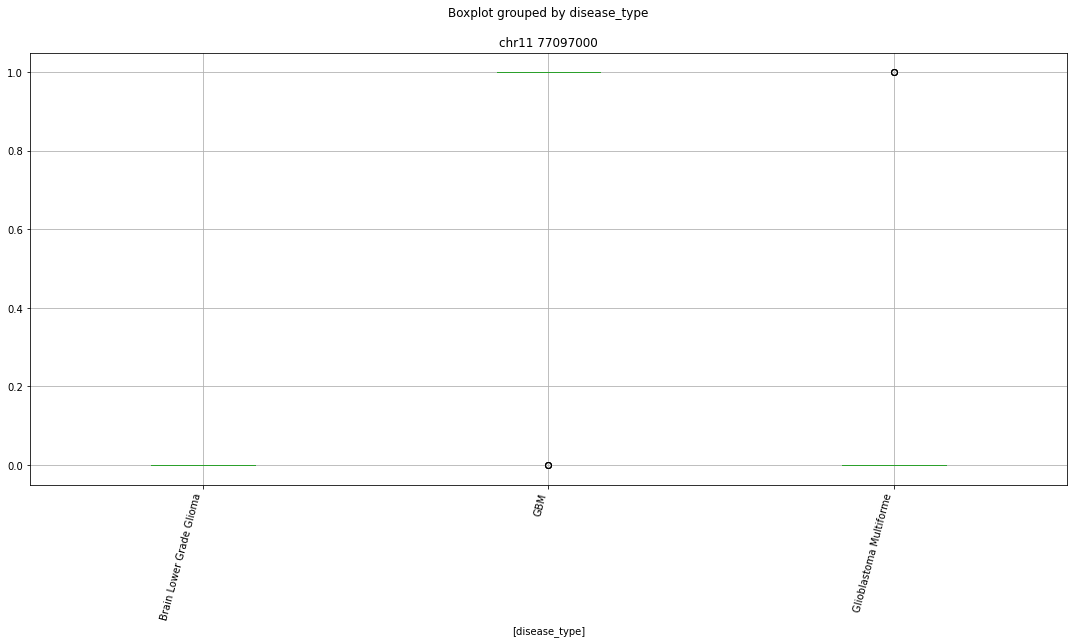

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr13 46514000


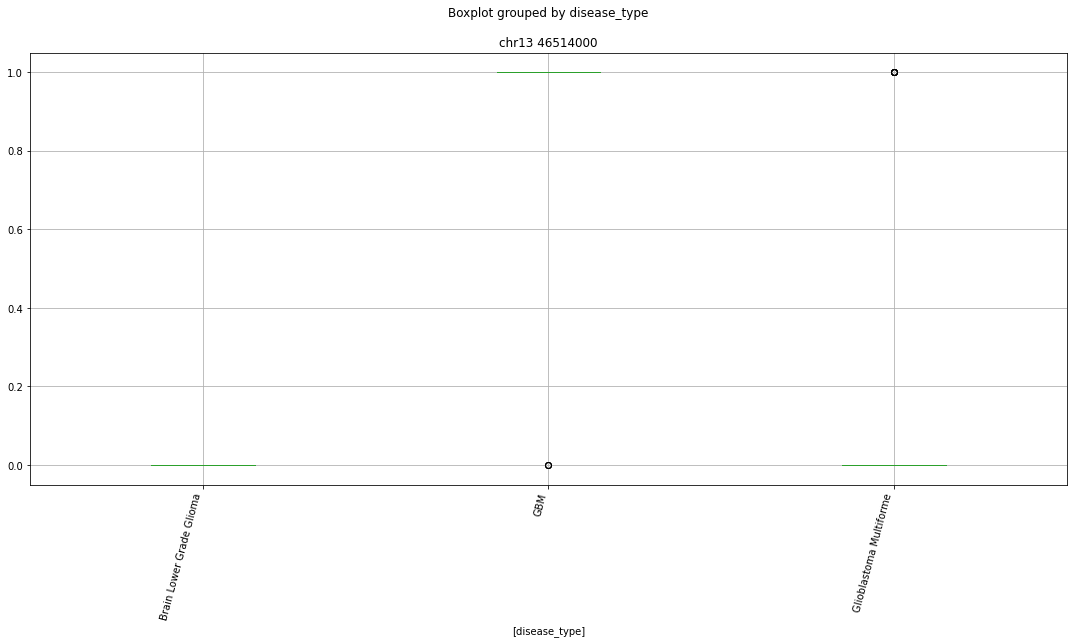

 p : 4.246227838271226e-16  ( t : 11.730463485510947 ) :  chr2 233723000


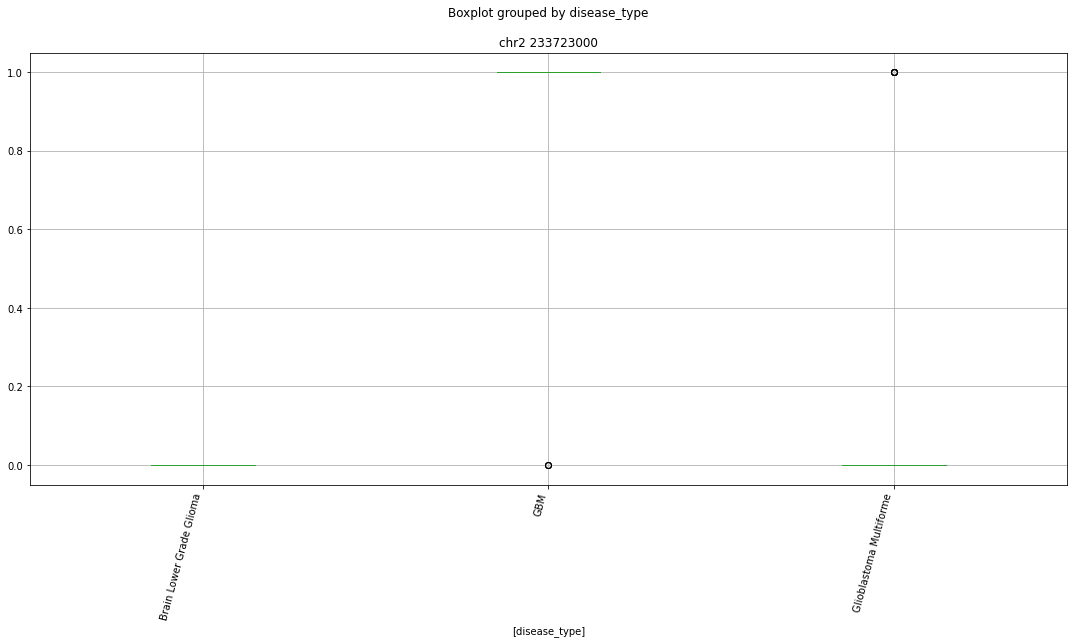

 p : 3.3711776281921387e-13  ( t : 9.719554838517347 ) :  chr17 27034000


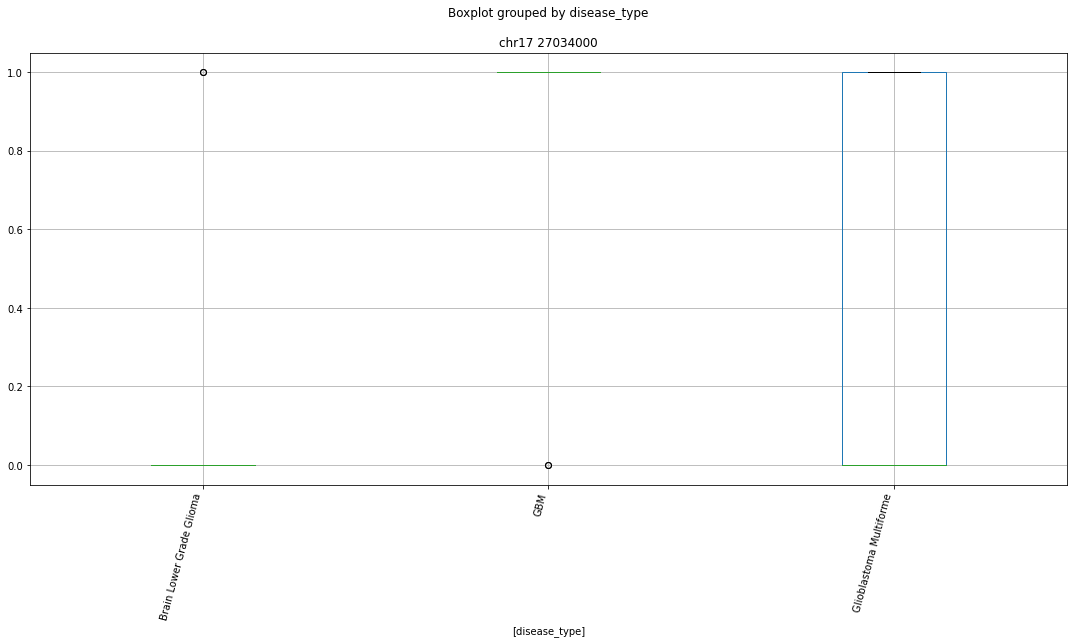

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr14 45390000


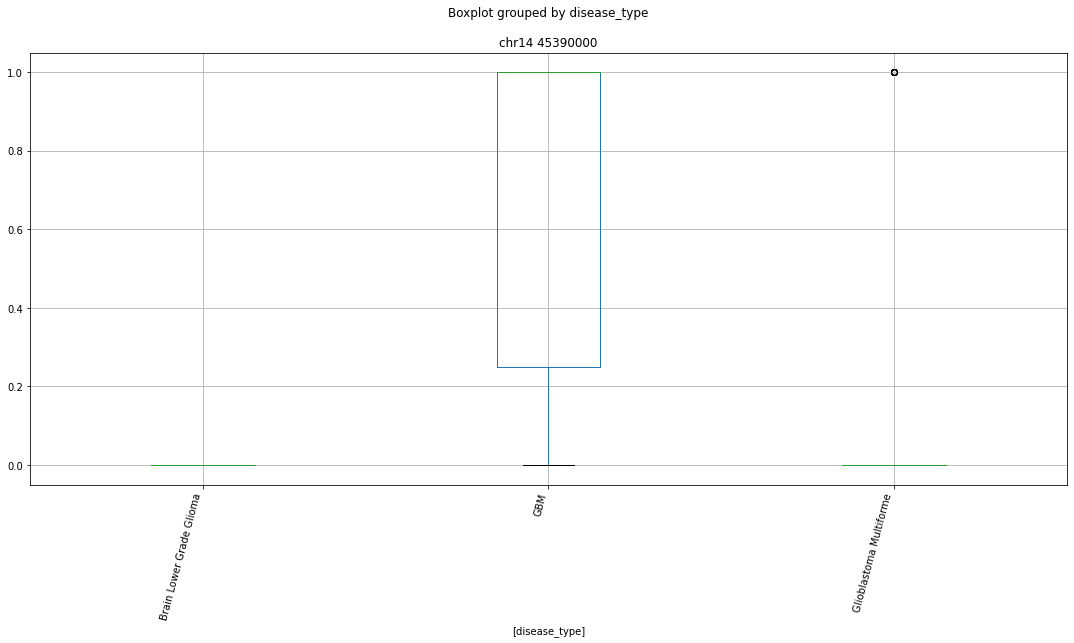

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr9 6808000


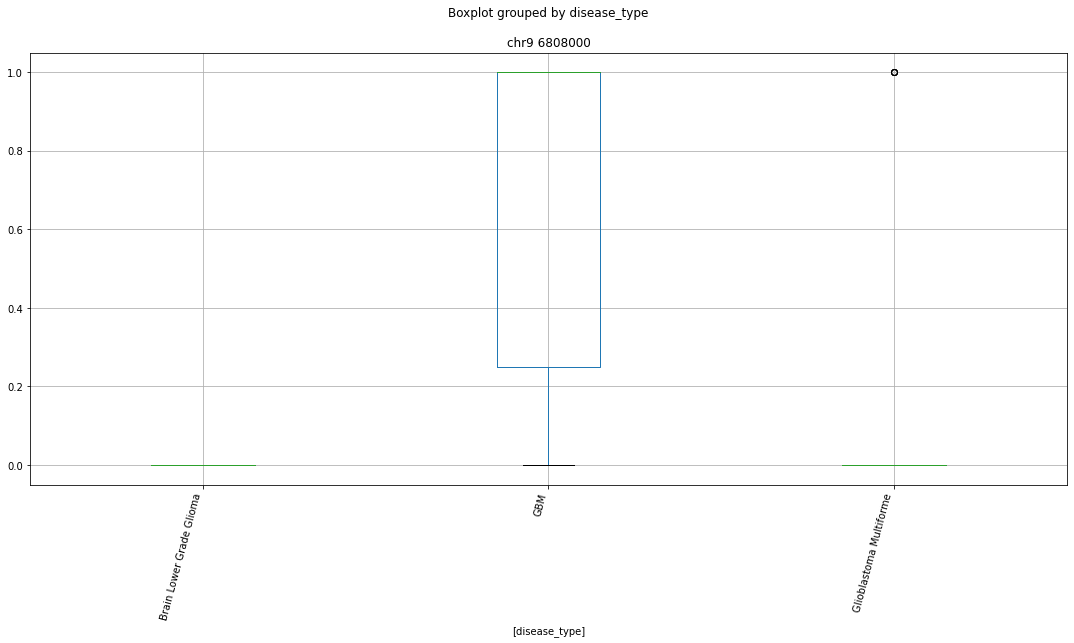

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr14 58589000


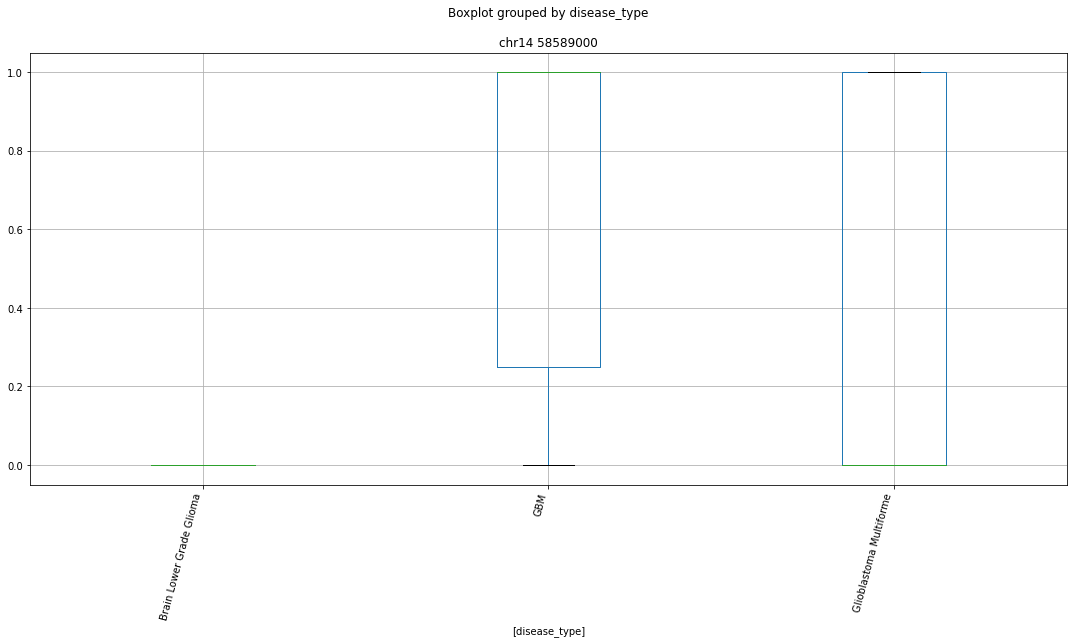

 p : 3.7826505374862424e-13  ( t : 9.686111434264069 ) :  chr5 142074000


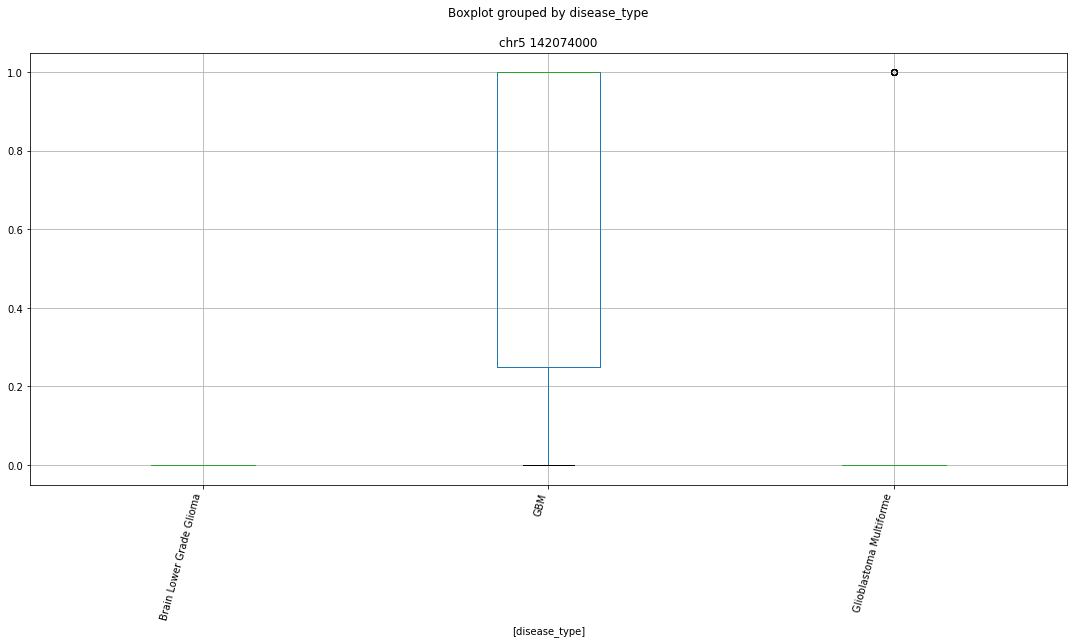

 p : 6.156397805631412e-13  ( t : 9.545065224835223 ) :  chr10 70686000


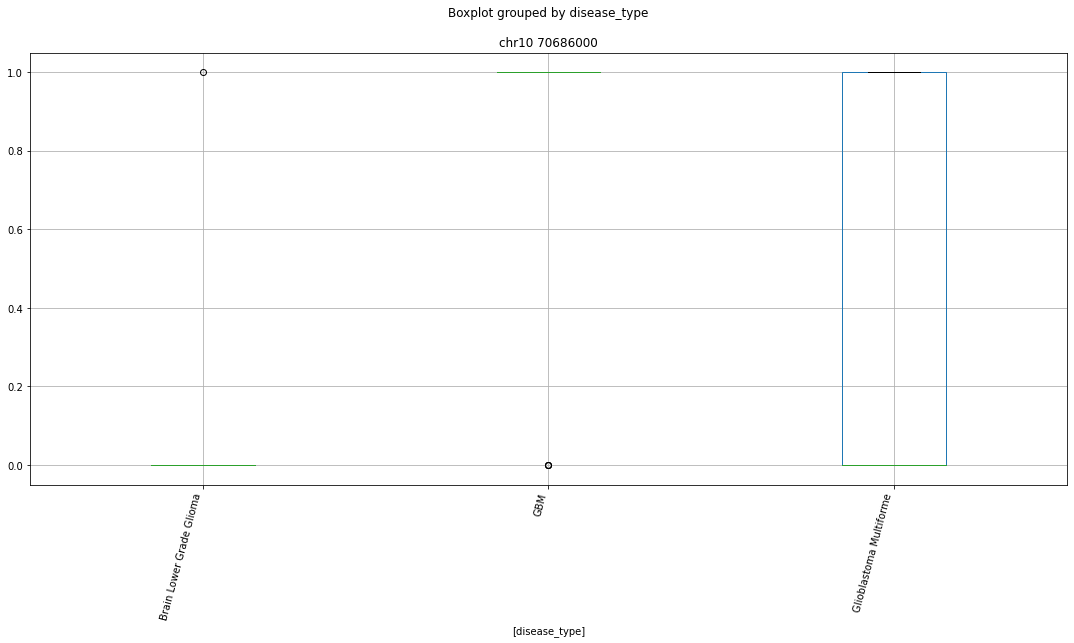

 p : 5.721020483559551e-12  ( t : 8.907157266714885 ) :  chr4 157635000


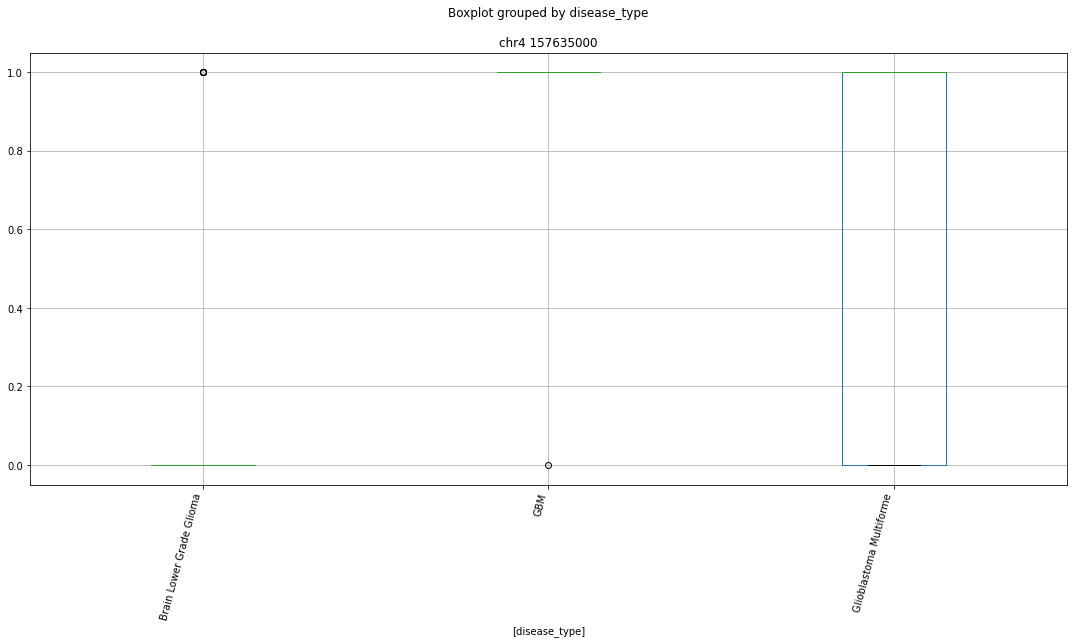

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr2 127786000


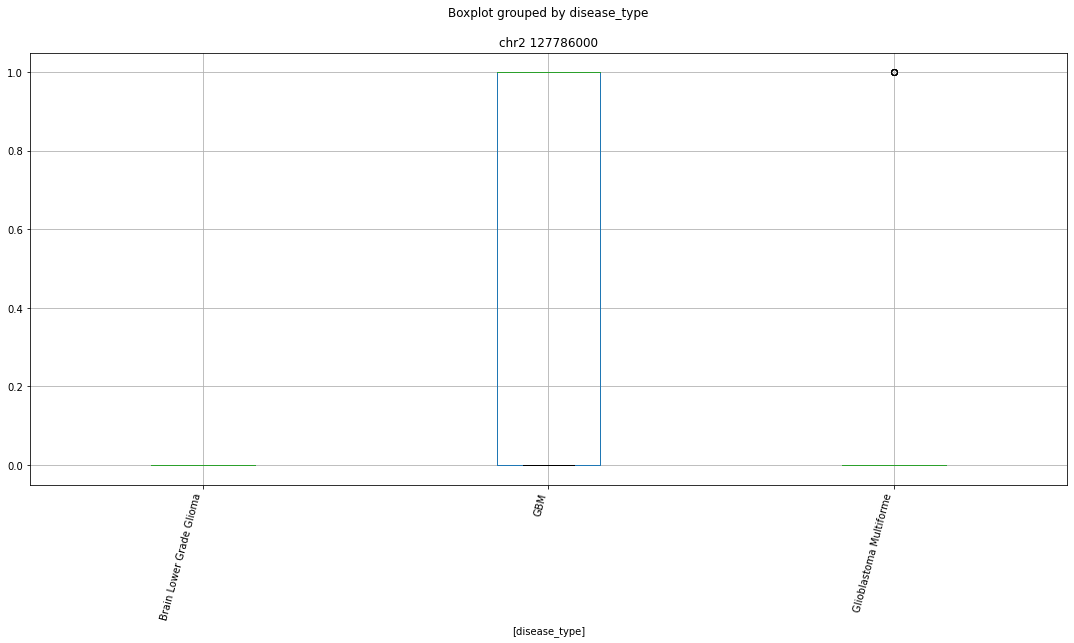

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr2 108726000


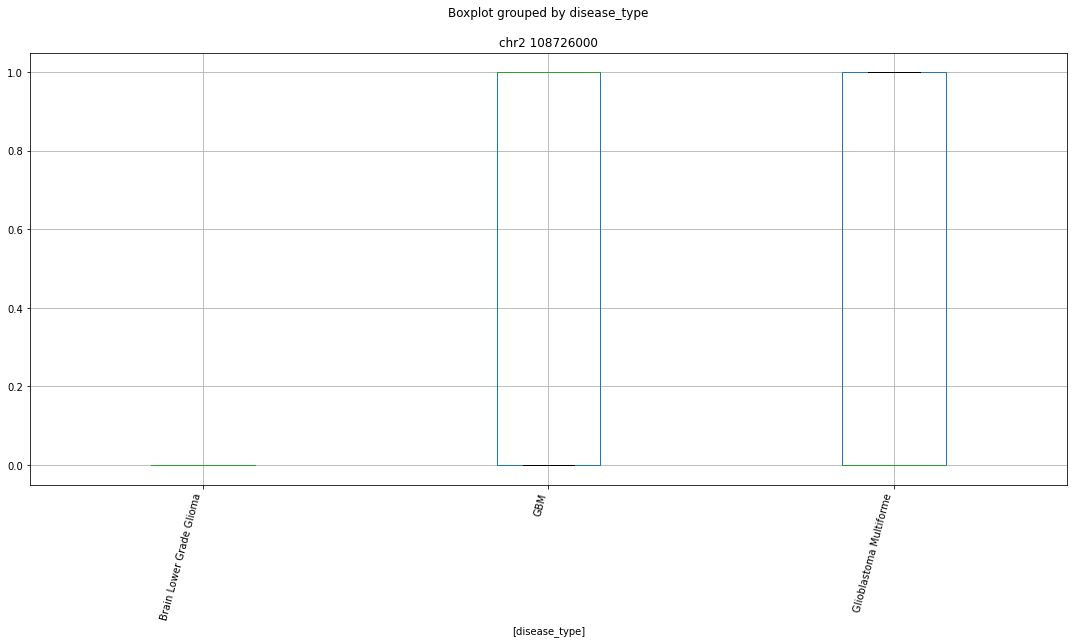

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr9 112515000


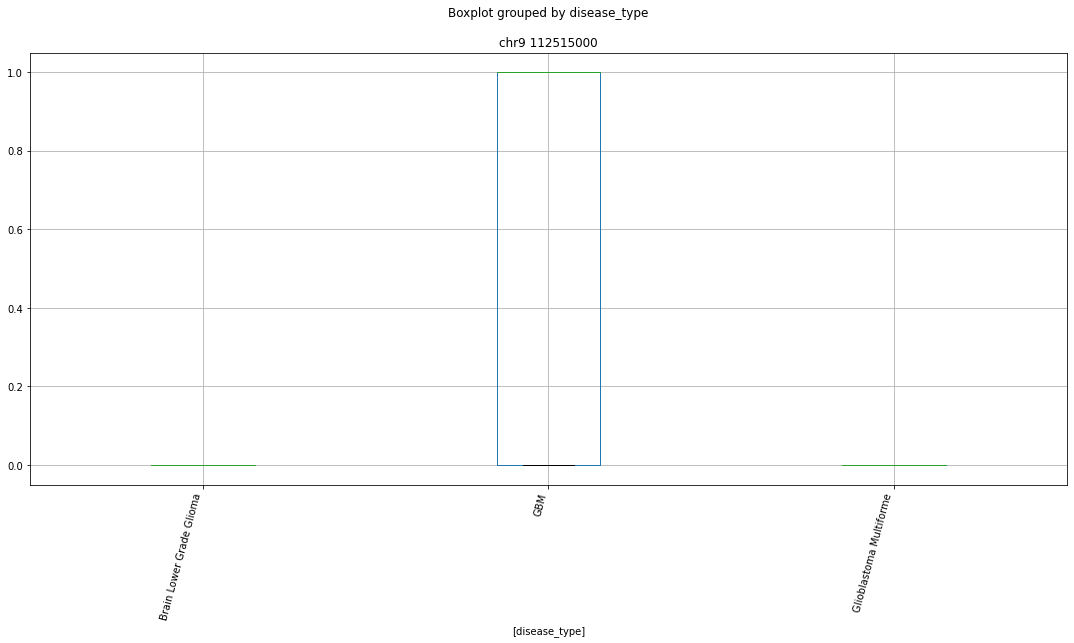

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr1 21389000


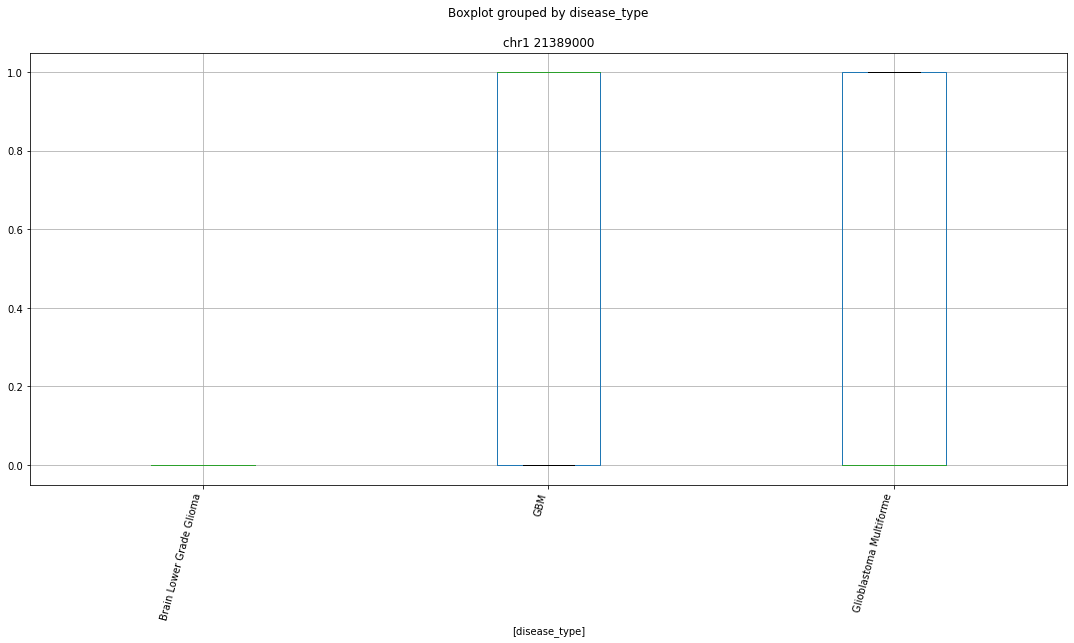

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr11 104195000


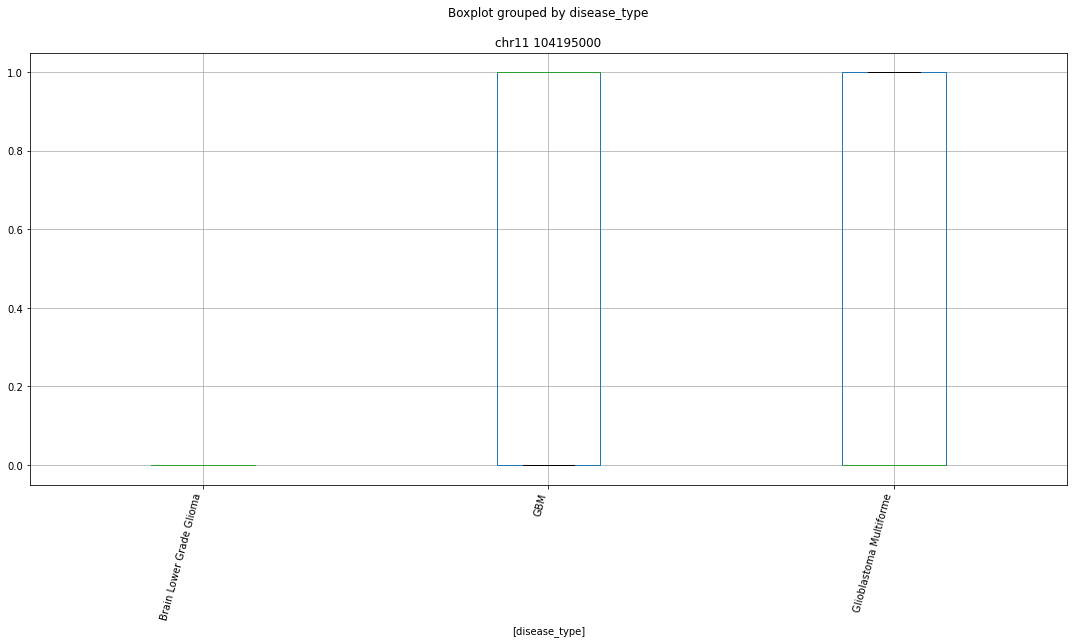

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr1 111800000


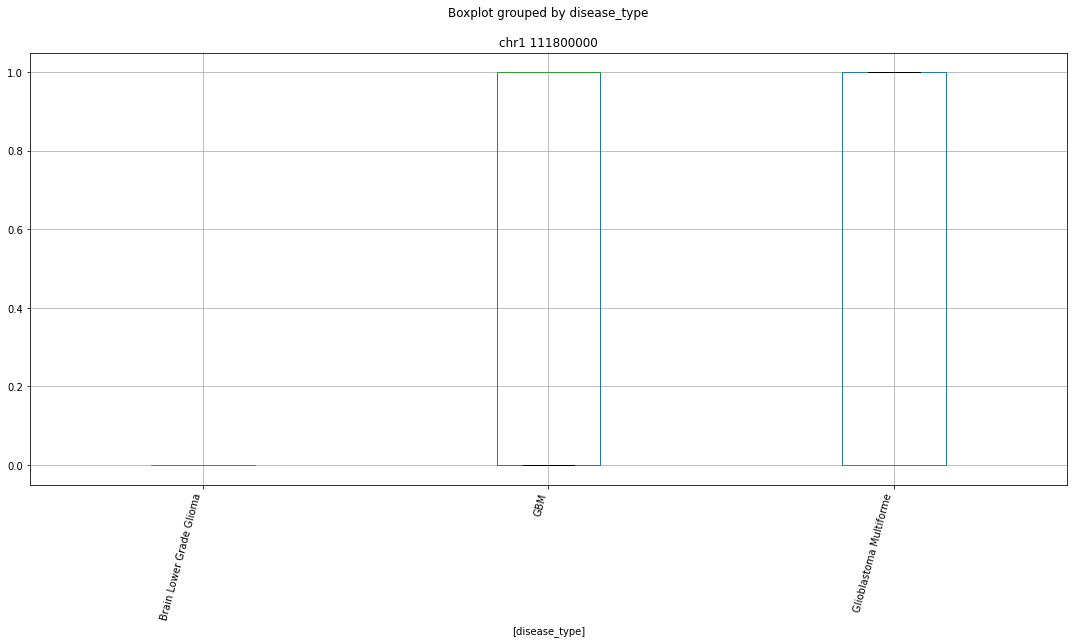

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr20 45645000


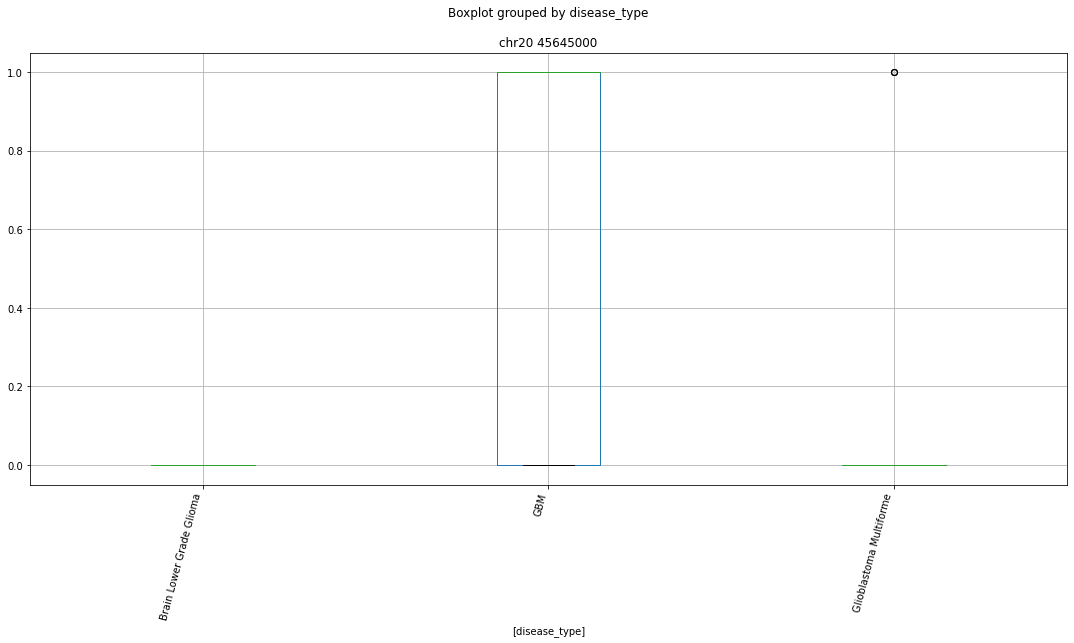

 p : 6.616621137048014e-11  ( t : 8.218938094196016 ) :  chr9 76063000


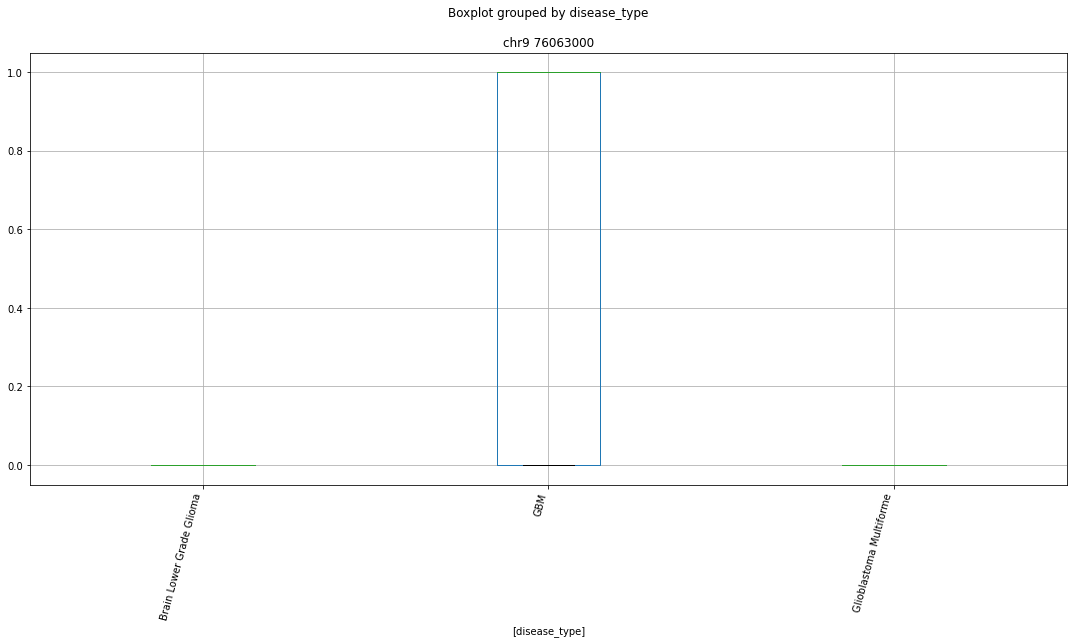

 p : 8.132074367057297e-11  ( t : 8.161442419967855 ) :  chr20 5028000


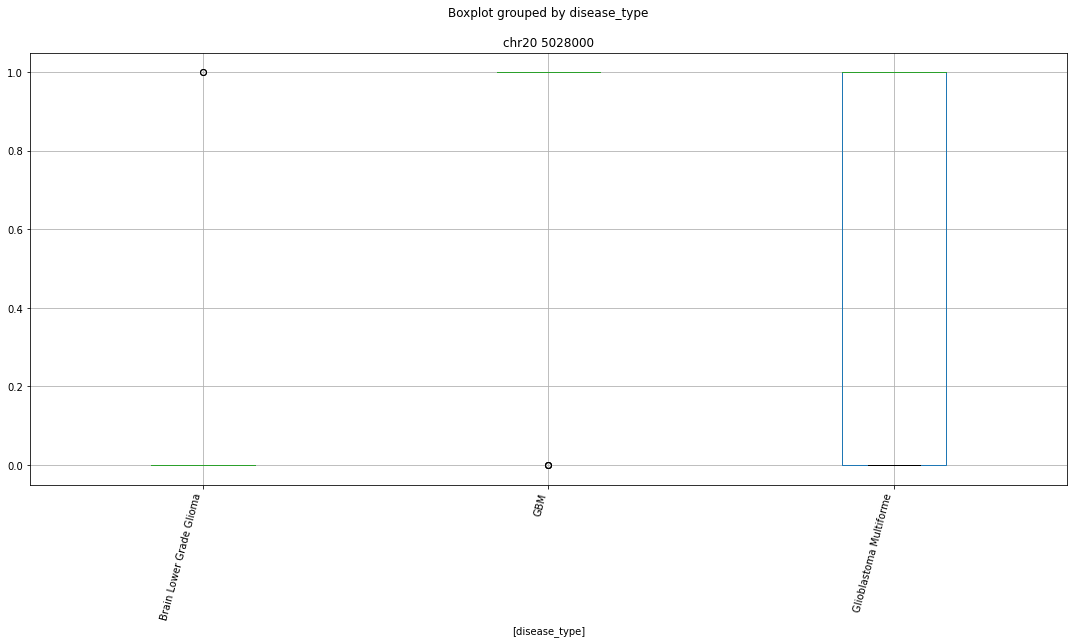

 p : 8.132074367057383e-11  ( t : 8.161442419967852 ) :  chr6 33526000


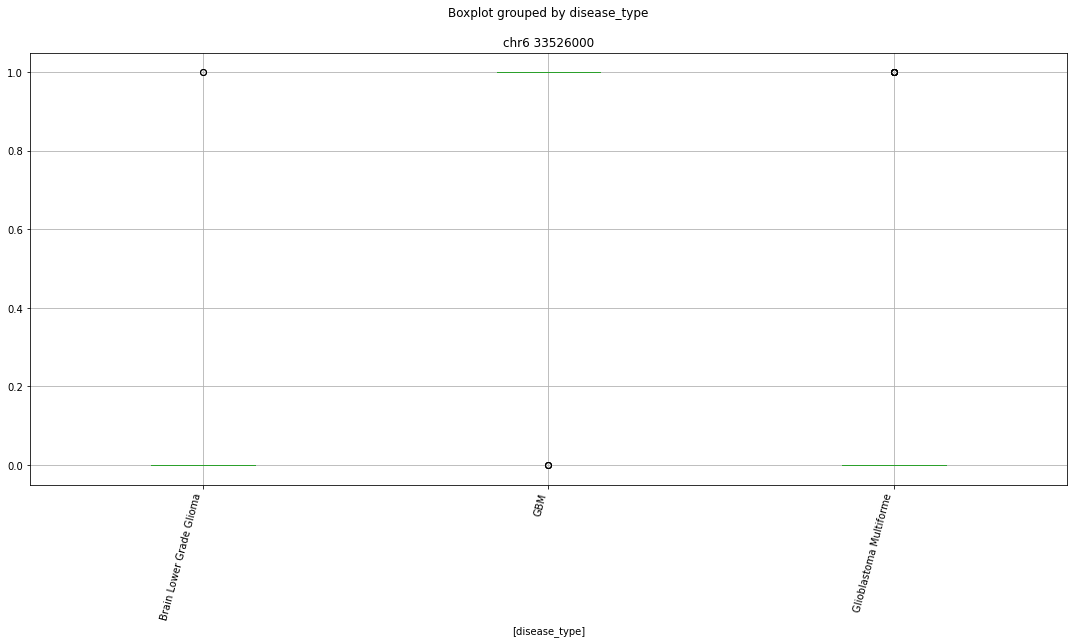

Clustermapping
['chr1 108488000' 'chr1 108676000' 'chr1 109054000' ... 'chrY 8917000'
 'disease_type' 'subject']


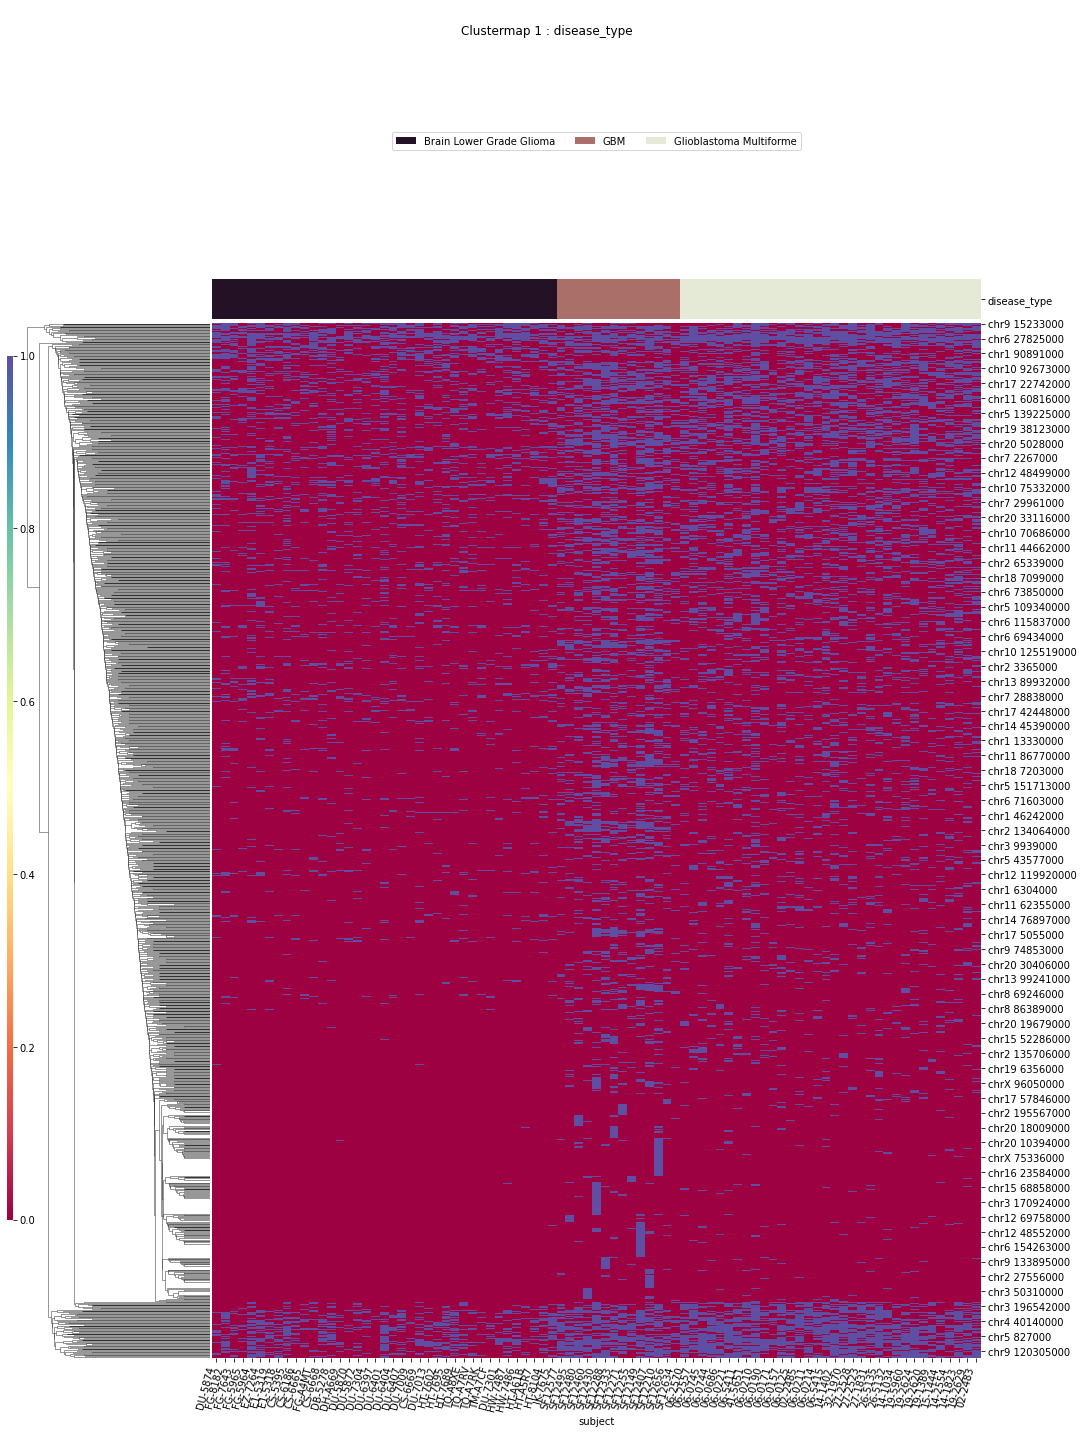

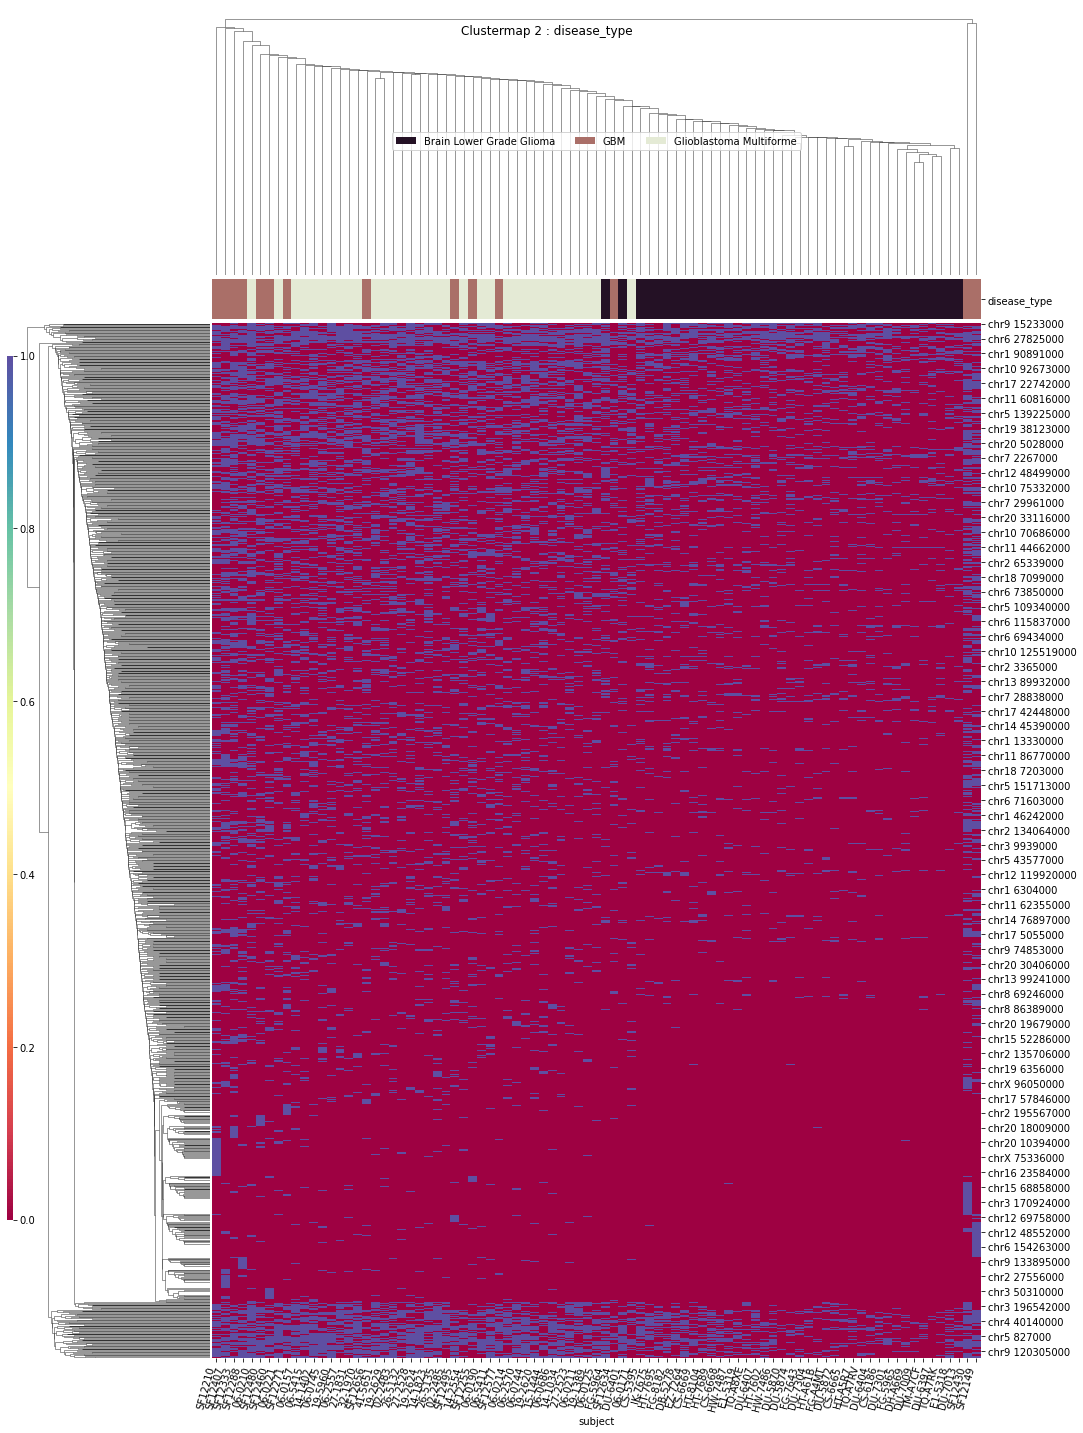

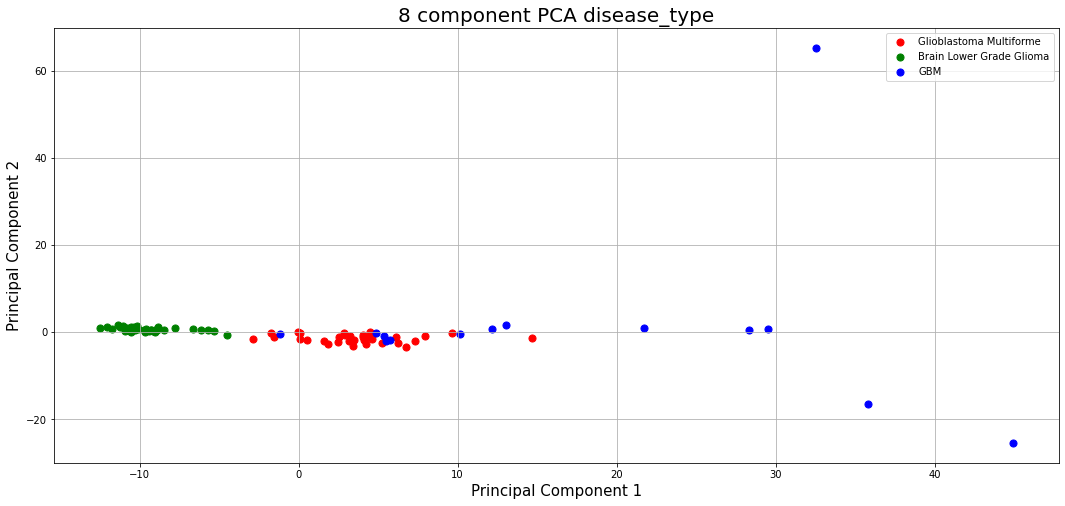

In [139]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(both_binary_df,
        both_binary_df.columns[both_binary_df.columns.str.contains("^chr")],column,box_p=1e-10,heat_p=0.1)
    

In [140]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210622 13:46:59'

disease_type
T-Testing
Boxplotting
 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr13 46514000


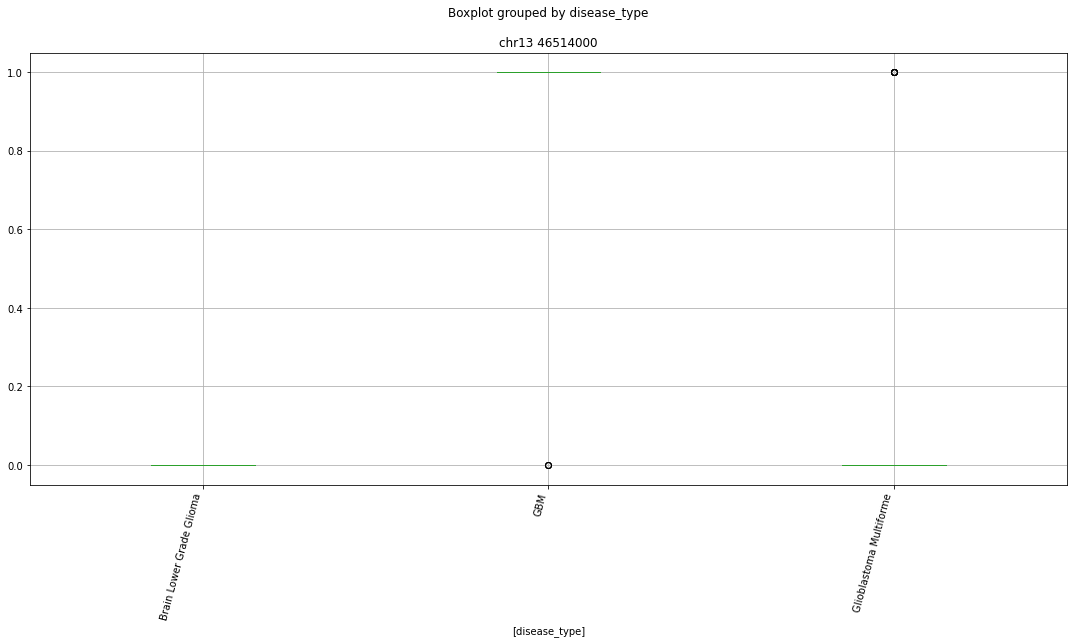

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr11 77097000


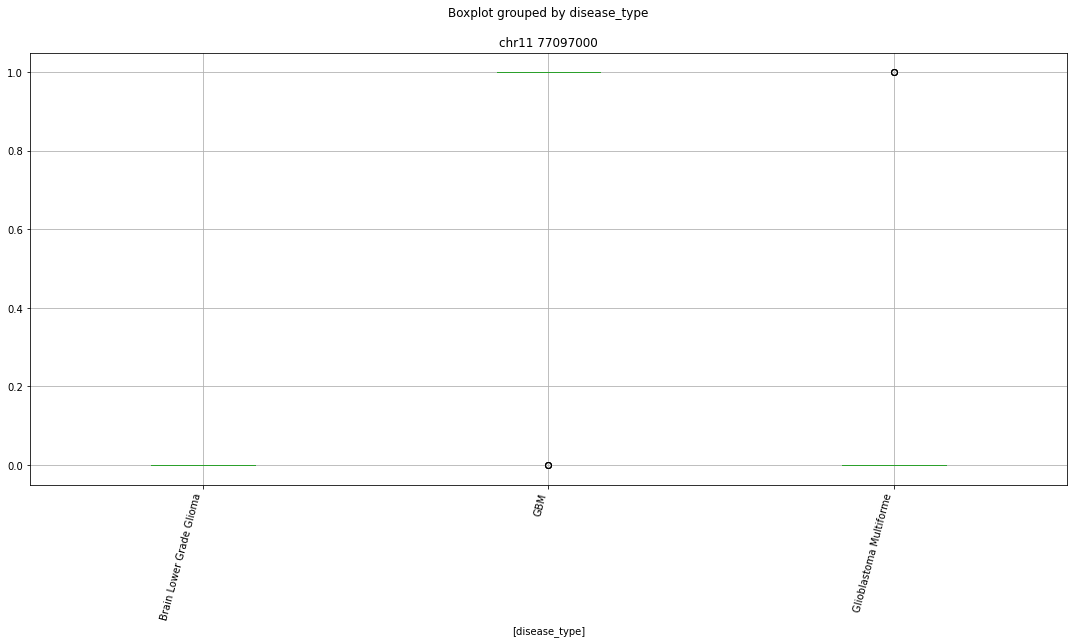

 p : 4.246227838271226e-16  ( t : 11.730463485510947 ) :  chr2 233723000


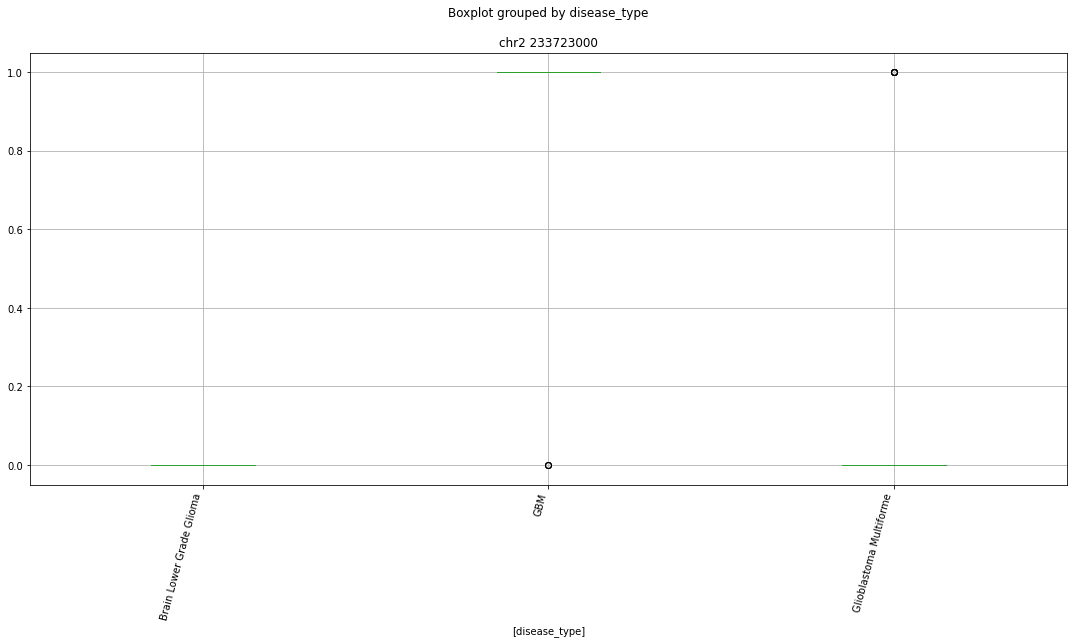

Clustermapping
['chr1 108488000' 'chr1 108676000' 'chr1 111800000' 'chr1 11249000'
 'chr1 112774000' 'chr1 114789000' 'chr1 117428000' 'chr1 13330000'
 'chr1 147061000' 'chr1 147062000' 'chr1 150727000' 'chr1 150782000'
 'chr1 150851000' 'chr1 151650000' 'chr1 151768000' 'chr1 152144000'
 'chr1 155701000' 'chr1 168208000' 'chr1 173614000' 'chr1 197405000'
 'chr1 208658000' 'chr1 209130000' 'chr1 21024000' 'chr1 212780000'
 'chr1 213150000' 'chr1 21389000' 'chr1 214868000' 'chr1 219872000'
 'chr1 22159000' 'chr1 227132000' 'chr1 231127000' 'chr1 234266000'
 'chr1 235310000' 'chr1 237126000' 'chr1 23854000' 'chr1 23986000'
 'chr1 23992000' 'chr1 241416000' 'chr1 246363000' 'chr1 247521000'
 'chr1 247522000' 'chr1 24801000' 'chr1 248676000' 'chr1 248677000'
 'chr1 26802000' 'chr1 27065000' 'chr1 27855000' 'chr1 39999000'
 'chr1 40000000' 'chr1 45082000' 'chr1 45498000' 'chr1 46242000'
 'chr1 52869000' 'chr1 54234000' 'chr1 6304000' 'chr1 65630000'
 'chr1 7952000' 'chr1 86898000' 'chr1 891

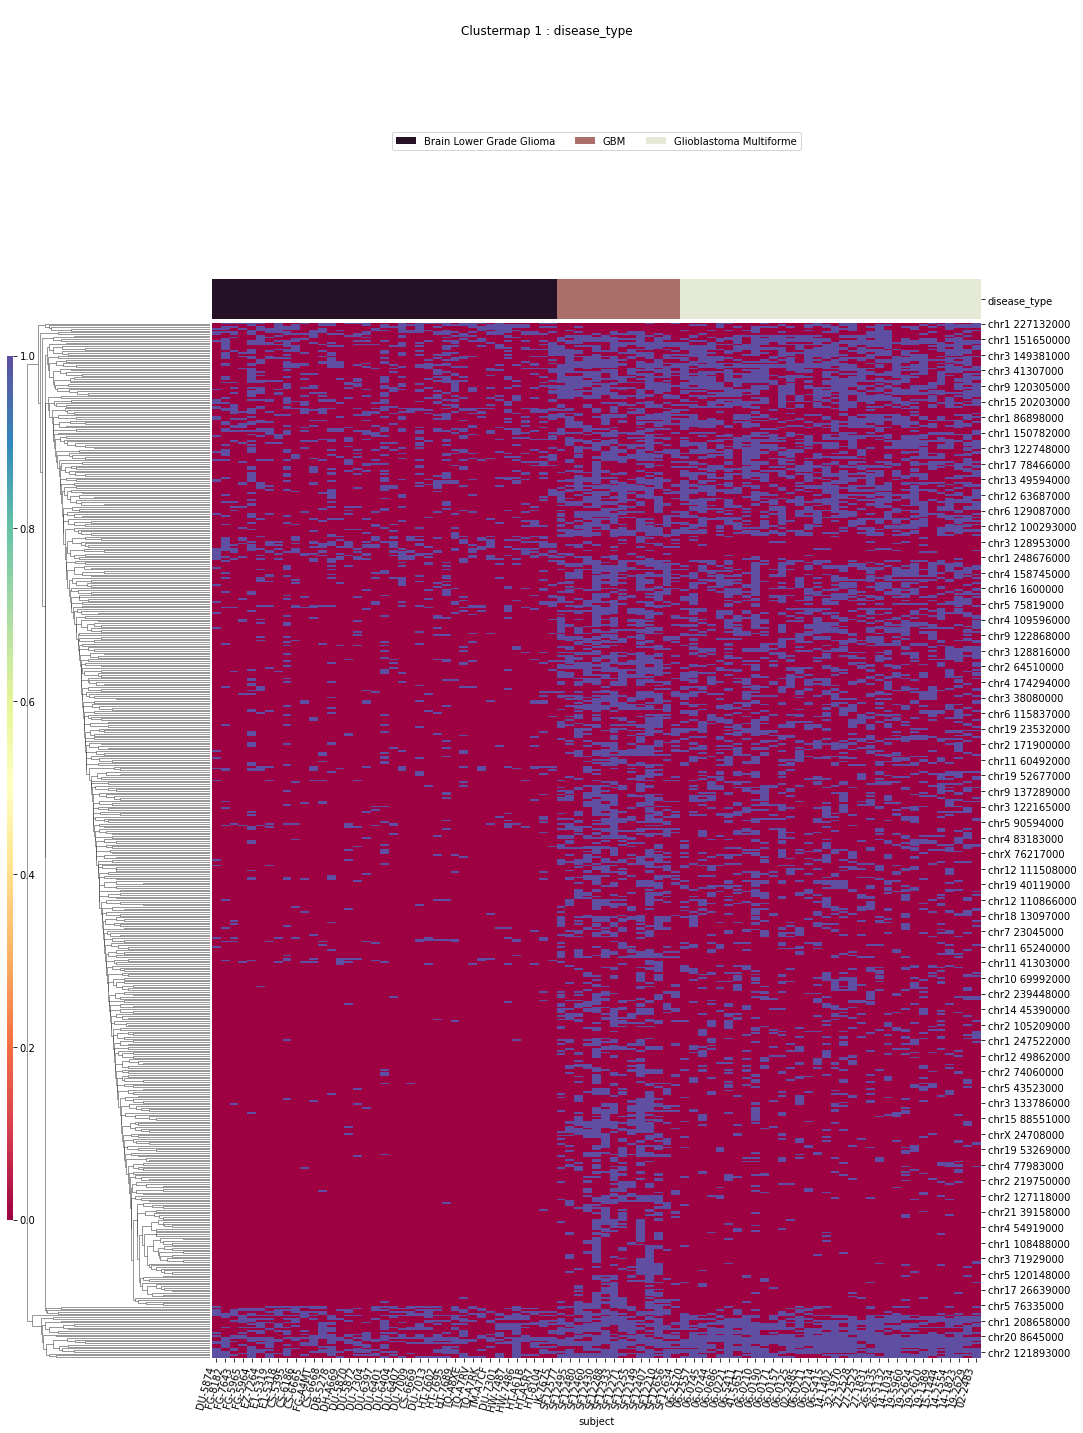

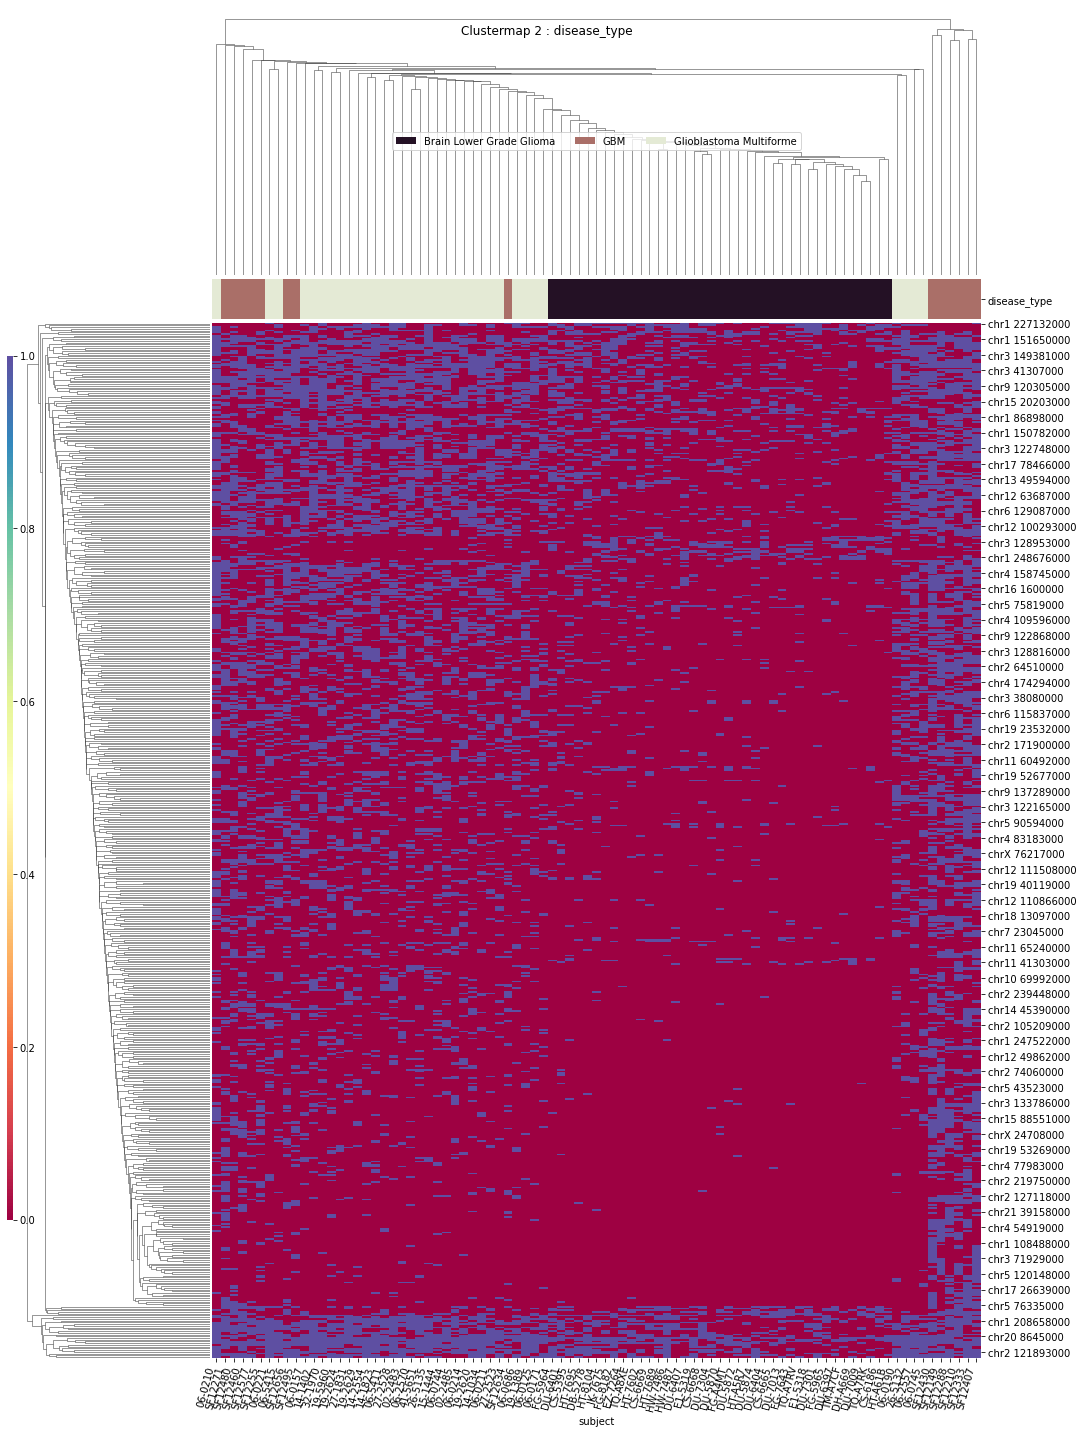

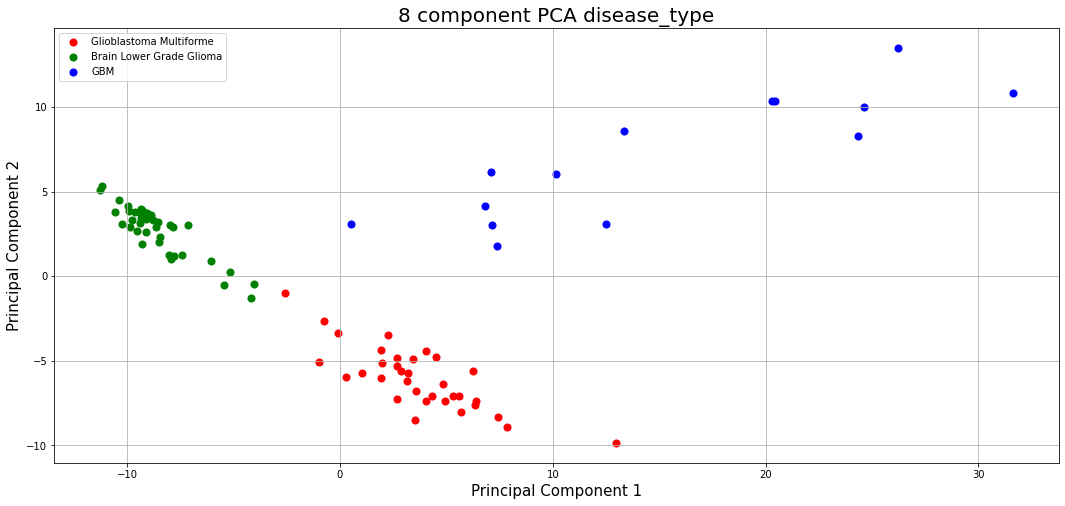

In [141]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(both_binary_df,
        both_binary_df.columns[both_binary_df.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.01)
    

In [142]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210622 13:47:34'

disease_type
T-Testing
Boxplotting
 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr11 77097000


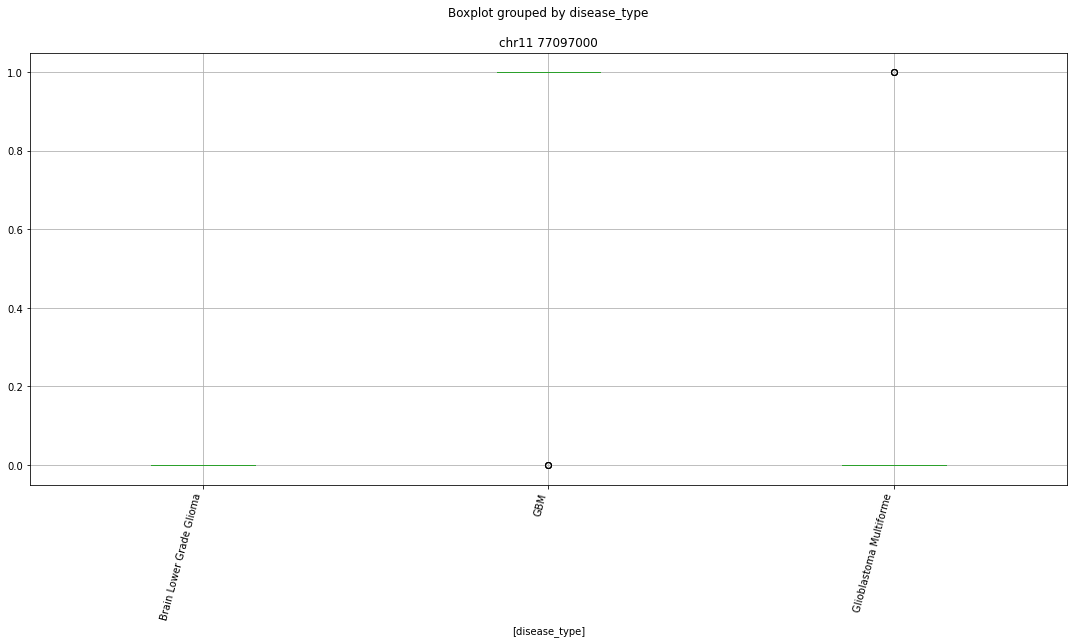

 p : 4.2462278382711956e-16  ( t : 11.730463485510949 ) :  chr13 46514000


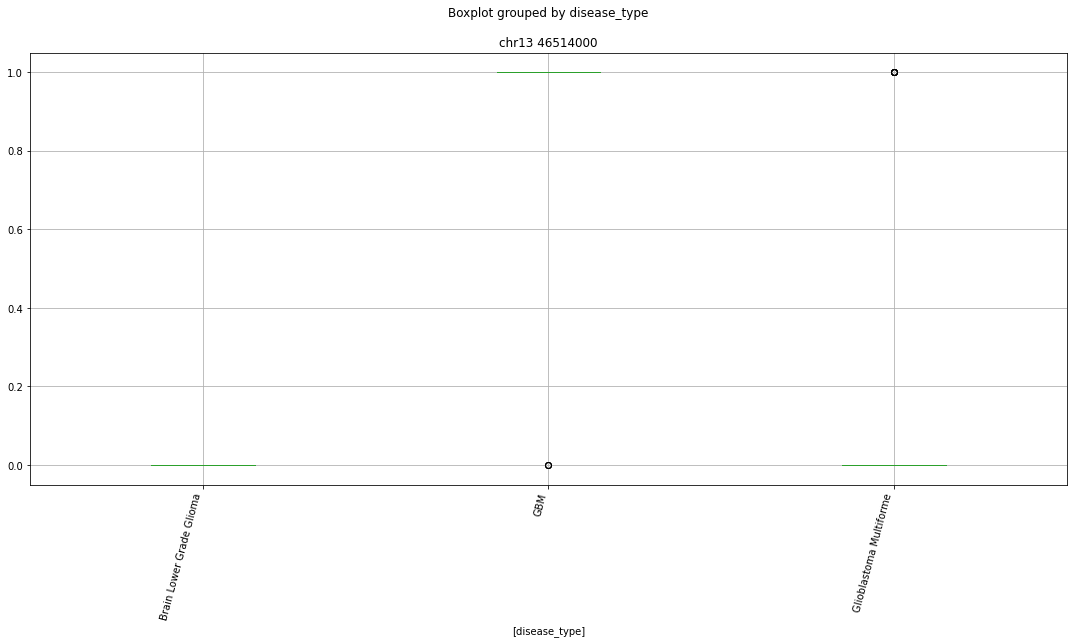

 p : 4.246227838271226e-16  ( t : 11.730463485510947 ) :  chr2 233723000


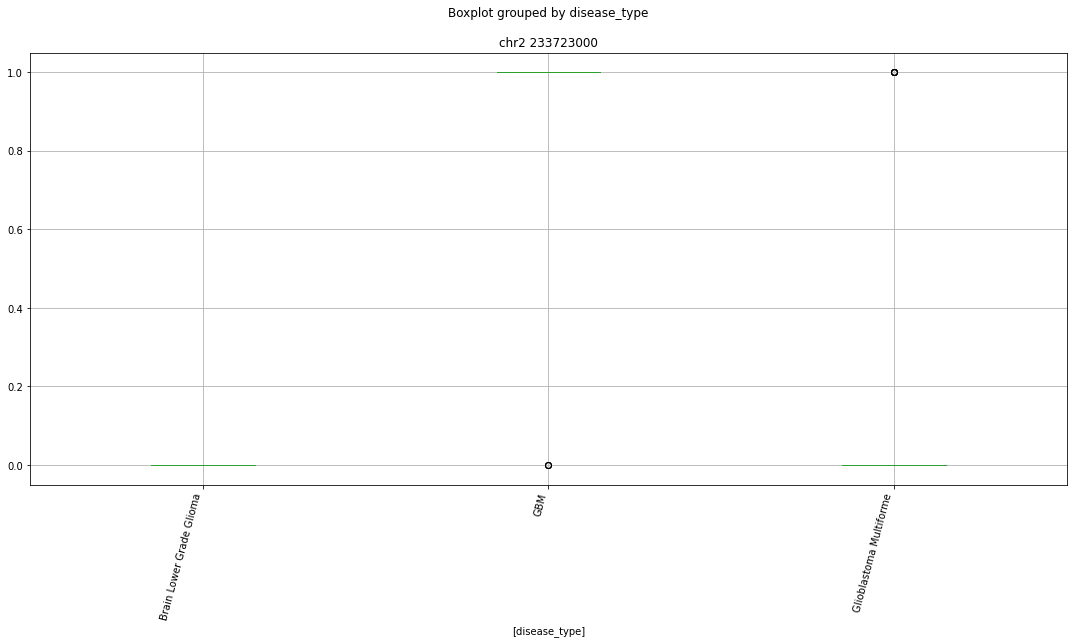

Clustermapping
['chr1 108676000' 'chr1 111800000' 'chr1 112774000' 'chr1 117428000'
 'chr1 13330000' 'chr1 147062000' 'chr1 150727000' 'chr1 150851000'
 'chr1 151650000' 'chr1 152144000' 'chr1 155701000' 'chr1 173614000'
 'chr1 21024000' 'chr1 212780000' 'chr1 213150000' 'chr1 21389000'
 'chr1 214868000' 'chr1 219872000' 'chr1 231127000' 'chr1 237126000'
 'chr1 23986000' 'chr1 23992000' 'chr1 246363000' 'chr1 247522000'
 'chr1 24801000' 'chr1 248676000' 'chr1 26802000' 'chr1 27855000'
 'chr1 40000000' 'chr1 45498000' 'chr1 46242000' 'chr1 52869000'
 'chr1 54234000' 'chr1 65630000' 'chr1 8912000' 'chr1 96469000'
 'chr10 100094000' 'chr10 103130000' 'chr10 118795000' 'chr10 17628000'
 'chr10 21431000' 'chr10 24658000' 'chr10 28934000' 'chr10 42848000'
 'chr10 69992000' 'chr10 70686000' 'chr10 75332000' 'chr10 87081000'
 'chr10 91322000' 'chr10 92673000' 'chr10 9274000' 'chr10 99892000'
 'chr11 104195000' 'chr11 118330000' 'chr11 123462000' 'chr11 124705000'
 'chr11 125864000' 'chr11 1300

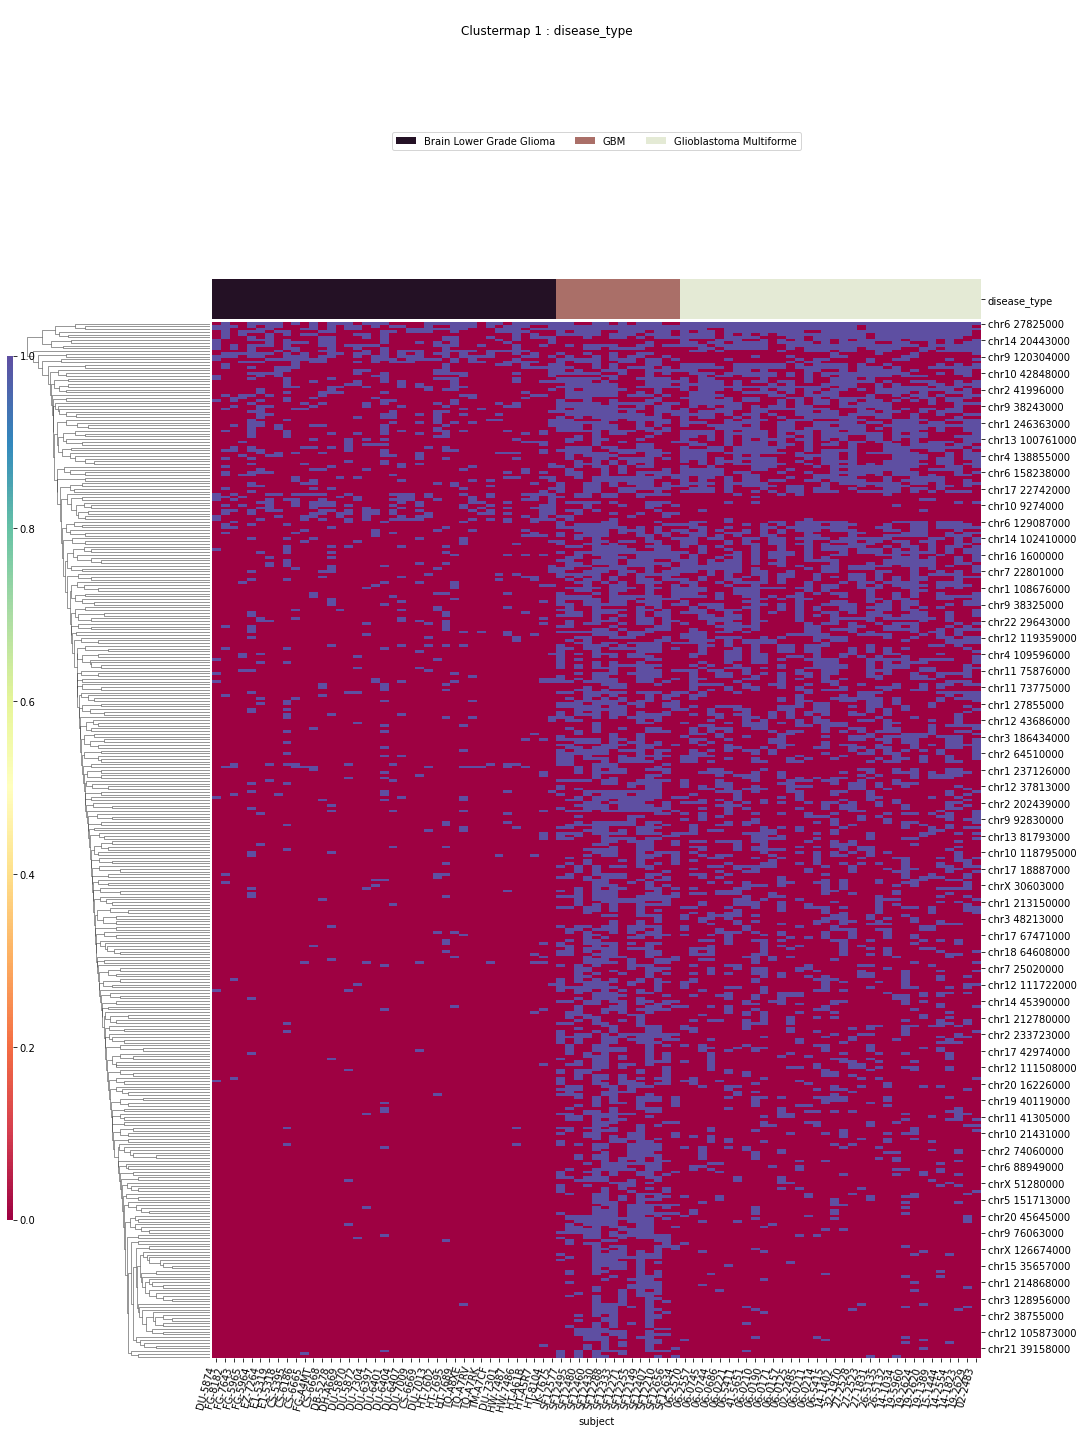

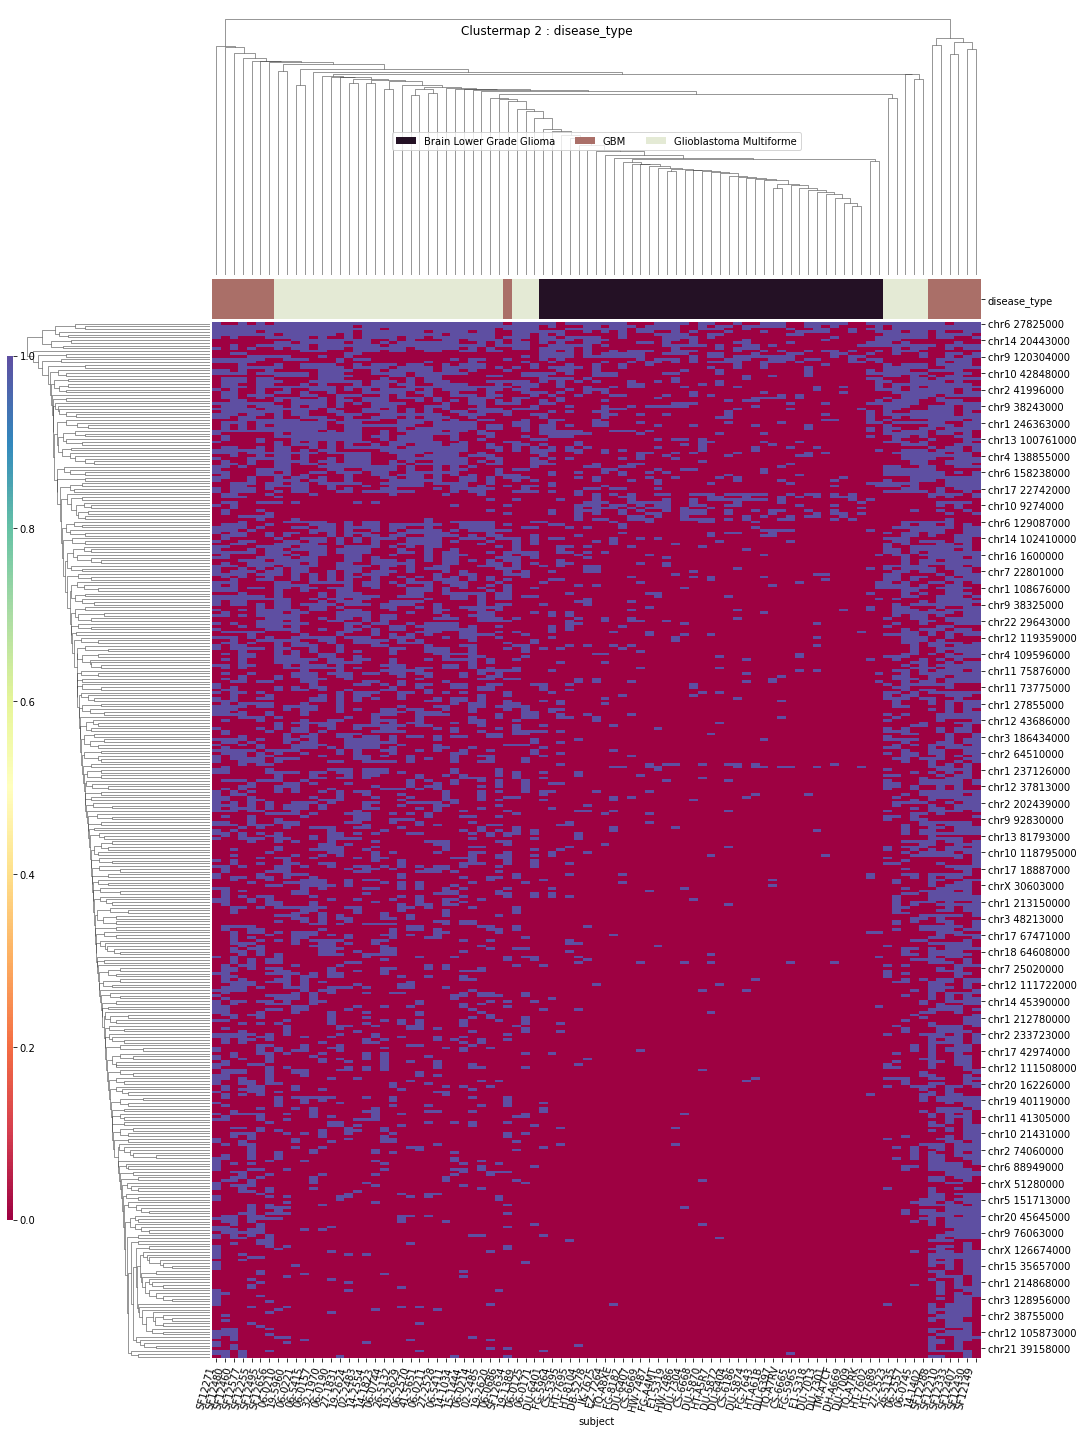

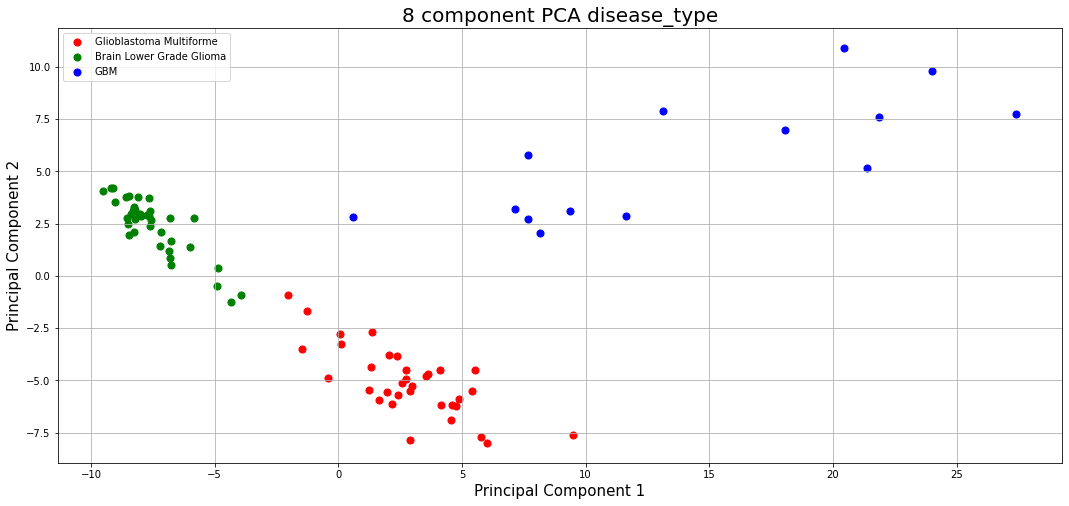

In [143]:
for column in ['disease_type']:
    print(column)
    ttests_boxplots_and_heatmaps(both_binary_df,
        both_binary_df.columns[both_binary_df.columns.str.contains("^chr")],column,box_p=1e-15,heat_p=0.001)
    

In [144]:
datetime.now().strftime("%Y%m%d %H:%M:%S")

'20210622 13:48:05'

---

In [145]:
plt.rcParams["figure.figsize"] = [18.0,8.0]

In [146]:
pd.set_option('display.max_columns', default_max_columns)

In [147]:
pd.set_option('display.max_rows',default_max_rows)

In [148]:
pd.set_option('display.precision', default_precision)